# EDA HOME CREDIT
- Reading dataset
- Missing value analysis
- Transformation of dates 
- Univariate Analysis
- Analysing numerical columns
- Outliers
- Bivariate analysis

# import data set


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
application_train=pd.read_csv("application_data.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [14]:
application_train.shape

(307511, 122)

Explanation:
application_train.count():

This method returns a Series with the count of non-null (non-NaN) values for each column in the application_train DataFrame.
len(application_train):

This returns the number of rows in the application_train DataFrame.
application_train.count() / len(application_train):

This computes the fraction of non-null values for each column. Specifically, for each column, it calculates how many non-null entries there are divided by the total number of rows. This results in a Series where each value represents the proportion of non-null values in each column.
1 - train_missing:

This calculates the fraction of missing (null) values for each column. Since train_missing represents the proportion of non-null values, subtracting this from 1 gives the proportion of missing values.
(1 - train_missing) * 100:

This converts the proportion of missing values into a percentage format.
train_missing.sort_values(ascending=False):

This sorts the Series of missing values in descending order. It means columns with the most missing values will appear first.
.head():

This returns the top 5 columns with the highest percentage of missing values.

In [8]:
train_missing=application_train.count()/len(application_train)
train_missing=(1-train_missing)*100
train_missing.sort_values(ascending=False).head()

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
dtype: float64

In [11]:
train=application_train.loc[:,train_missing<50]
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns. 

In [25]:
train['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

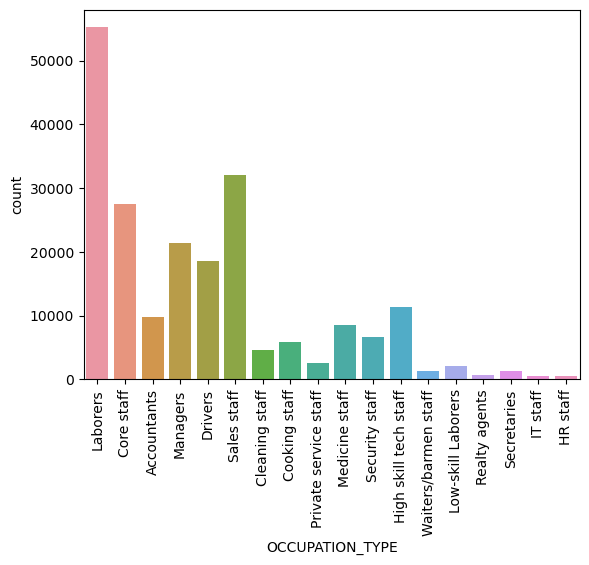

In [27]:
sns.countplot(data=train,x='OCCUPATION_TYPE')
plt.xticks(rotation=90)

As the OCCUPATION_TYPE has 31% of huge missing values we cannot replace it with mode "Laborers",so we leave the column as it is.

In [29]:
train['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

<Axes: ylabel='Frequency'>

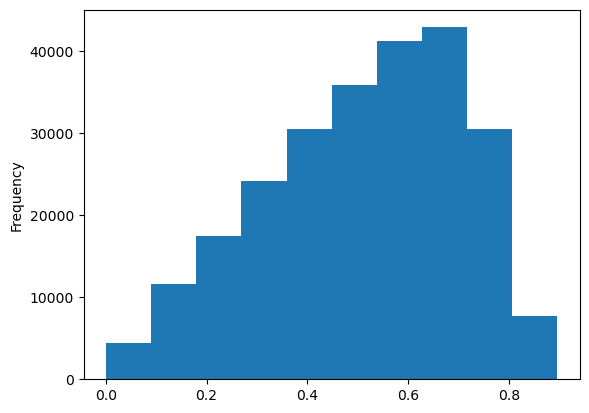

In [31]:
train['EXT_SOURCE_3'].plot.hist()

In [33]:
train['EXT_SOURCE_3'].mean()

0.5108529061799658

In [35]:
train['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [37]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: ylabel='Frequency'>

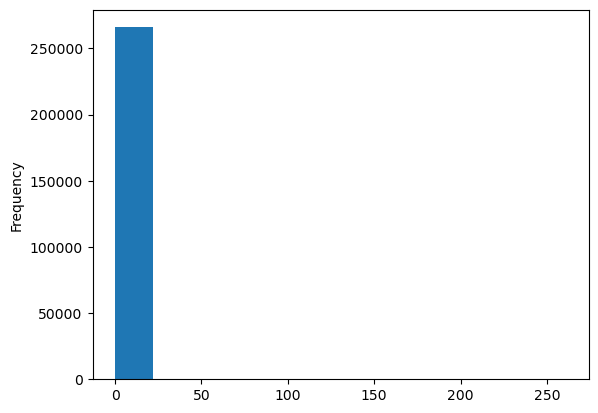

In [40]:
num_unique=len(train.AMT_REQ_CREDIT_BUREAU_QRT.unique())
train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=num_unique)

In [42]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [44]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [47]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: ylabel='Frequency'>

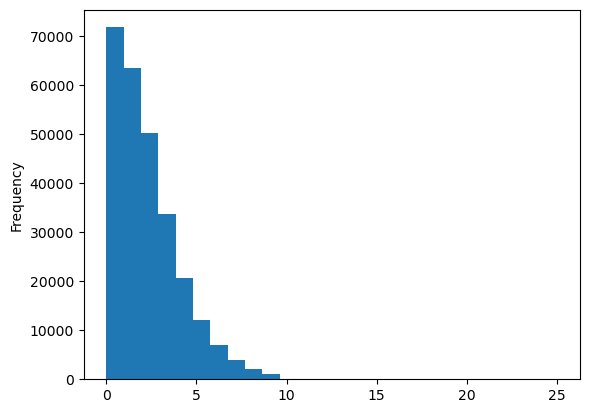

In [49]:
num_uniq=len(train.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=num_uniq)

In [51]:
train.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [53]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [54]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [56]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: ylabel='Frequency'>

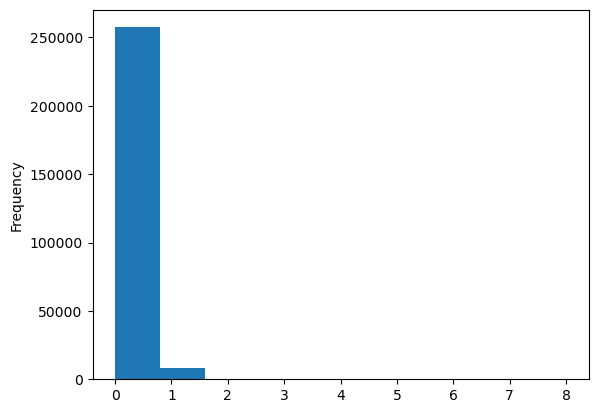

In [58]:
num_uniq=len(train.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
train['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins=num_uniq)

In [61]:
train.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [63]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()

0.0343619356973142

In [65]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [67]:
train['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: ylabel='Frequency'>

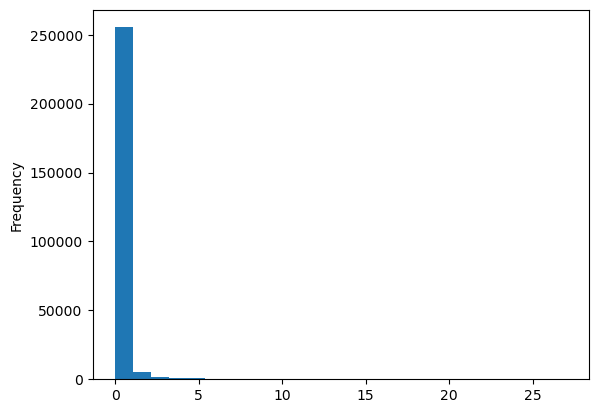

In [69]:
num_uniq=len(train.AMT_REQ_CREDIT_BUREAU_MON.unique())
train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins=num_uniq)

In [71]:
train['AMT_REQ_CREDIT_BUREAU_MON'].mean()

0.26739526000781977

In [73]:
train['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [76]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: ylabel='Frequency'>

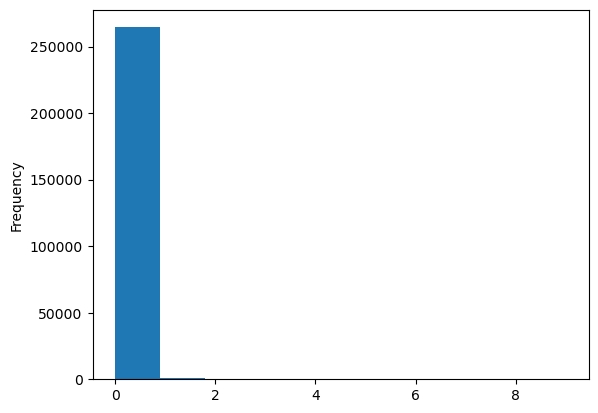

In [78]:
num_uniq=len(train.AMT_REQ_CREDIT_BUREAU_DAY.unique())
train['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins=num_uniq)

In [80]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: ylabel='Frequency'>

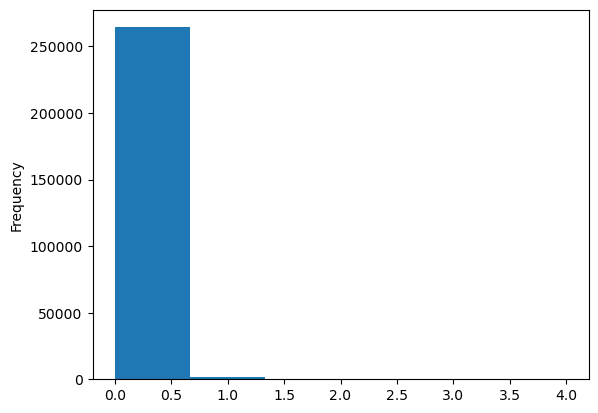

In [82]:
num_uniq=len(train.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
train['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins=num_uniq)

In [86]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

### Column: DAYS_BIRTH
This column has represents the clients birth in number of days relative to the application. So, we are converting into year for conciseness and better understanding. As the days are given as negative values, we have used -round() to convert it into positive values. We will do the same transformation for other dates. 

In [88]:
train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [90]:
train['DAYS_BIRTH']=-round(train['DAYS_BIRTH']/365,0)
train['DAYS_BIRTH'].head()

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3910601299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DAYS_BIRTH']=-round(train['DAYS_BIRTH']/365,0)


0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
Name: DAYS_BIRTH, dtype: float64

In [92]:
train['DAYS_REGISTRATION']=-round(train['DAYS_REGISTRATION']/365,0)
train['DAYS_REGISTRATION'].head()

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\1494008477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DAYS_REGISTRATION']=-round(train['DAYS_REGISTRATION']/365,0)


0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
Name: DAYS_REGISTRATION, dtype: float64

In [94]:
train['DAYS_ID_PUBLISH']=-round(train['DAYS_ID_PUBLISH']/365,0)
train['DAYS_ID_PUBLISH'].head()

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\878668769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DAYS_ID_PUBLISH']=-round(train['DAYS_ID_PUBLISH']/365,0)


0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [96]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [100]:
train['TARGET'].count()

307511

In [101]:
train['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [104]:
(train['TARGET']==1).sum()

24825

In [106]:
(train['TARGET']==0).sum()

282686

### Ratio
Too much data imbalance

In [108]:
(train['TARGET']==0).sum()/(train['TARGET']==1).sum()

11.387150050352467

## Now, we will analyse numerical and categorical data. Let's start with categorical data. 
### Analysing categorical data
Since due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists. 

In [135]:
train0=train.loc[train['TARGET']==0]
train1=train.loc[train['TARGET']==1]

Here, we have used 3 different plots for analysis
- Pie plot: For plotting the all the values present in a column in terms of percentage. So, the sum of those data types will be 100. 
- Countplot 1: Here, plotted the count of the different categories. So, Target=0 will have higher count than Target=1. 
- Countplot 2: To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for Target=0 and Target=1 are mostly equal. Please go through the code of this plot to understand for further doubts. 

In [142]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [137]:
train_categorical = train.select_dtypes(include=['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE', 'amt_annuity_categorical'],
      dtype='object')

# Univariate Analysis of the Categorical data
### Plotting the data.
Ex: For column "NAME_CONTRACT_TYPE", in the first plot, 90% 'cash_loans' are there and 10% 'Revolving_loans' are there. In the second plot, the numnber of 'cash_loans' is ~250,000 and ~2500 for 'cash_loans' for Target=0. Similarly for Target=1. In the last plot, since we have plotted the dataset in terms of percentage, so, sum of 'blue' colour for 'cash_loans' and 'Revolving_loans' for Target=0 is 1. Similarly, sum of orange' colour for 'cash_loans' and 'Revolving_loans' for Target=1 is 1.

plotting NAME_CONTRACT_TYPE


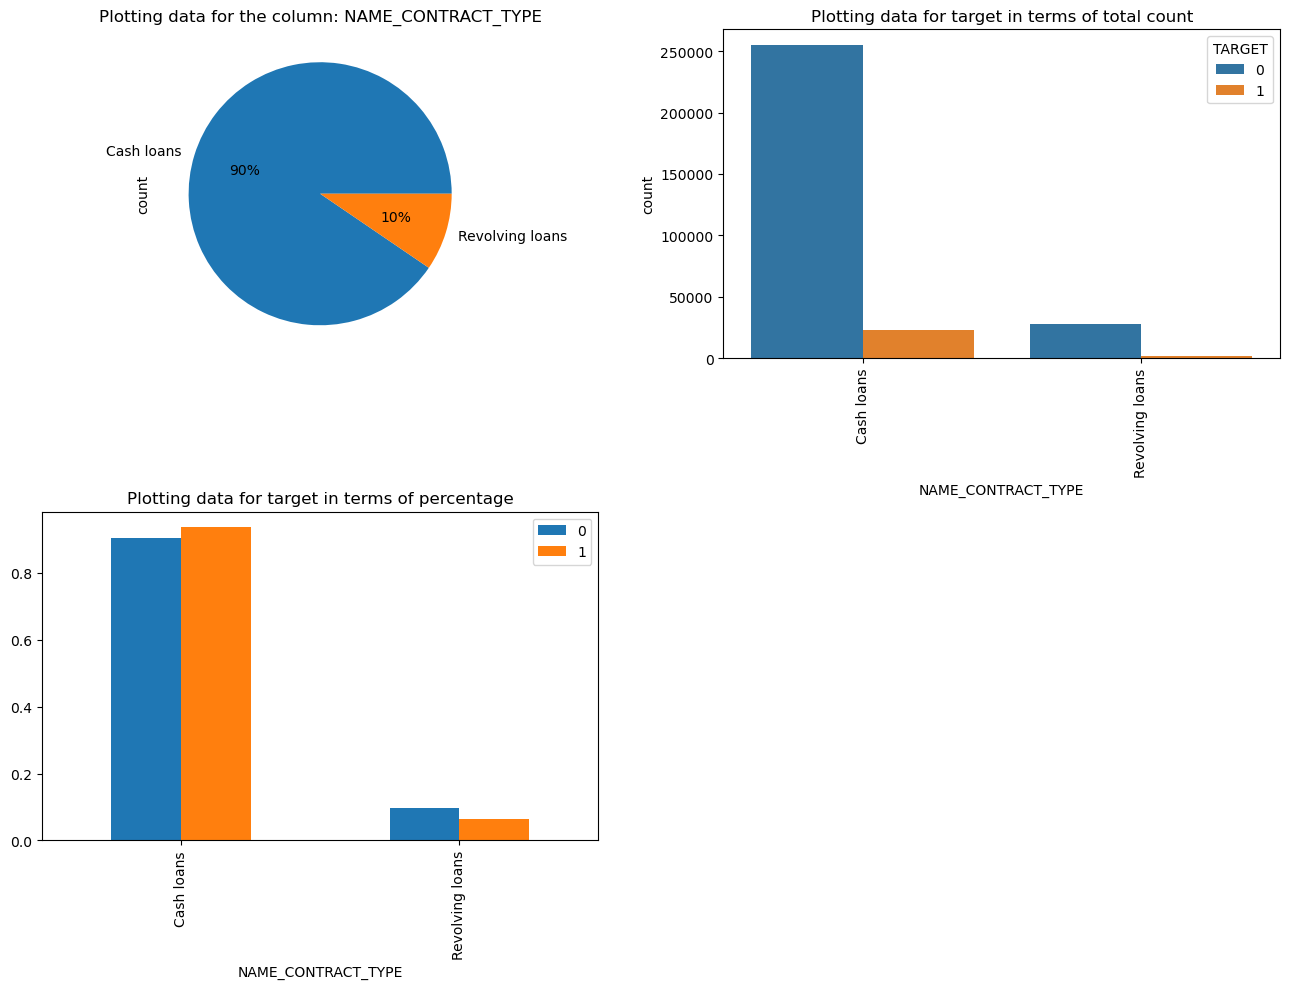

plotting CODE_GENDER


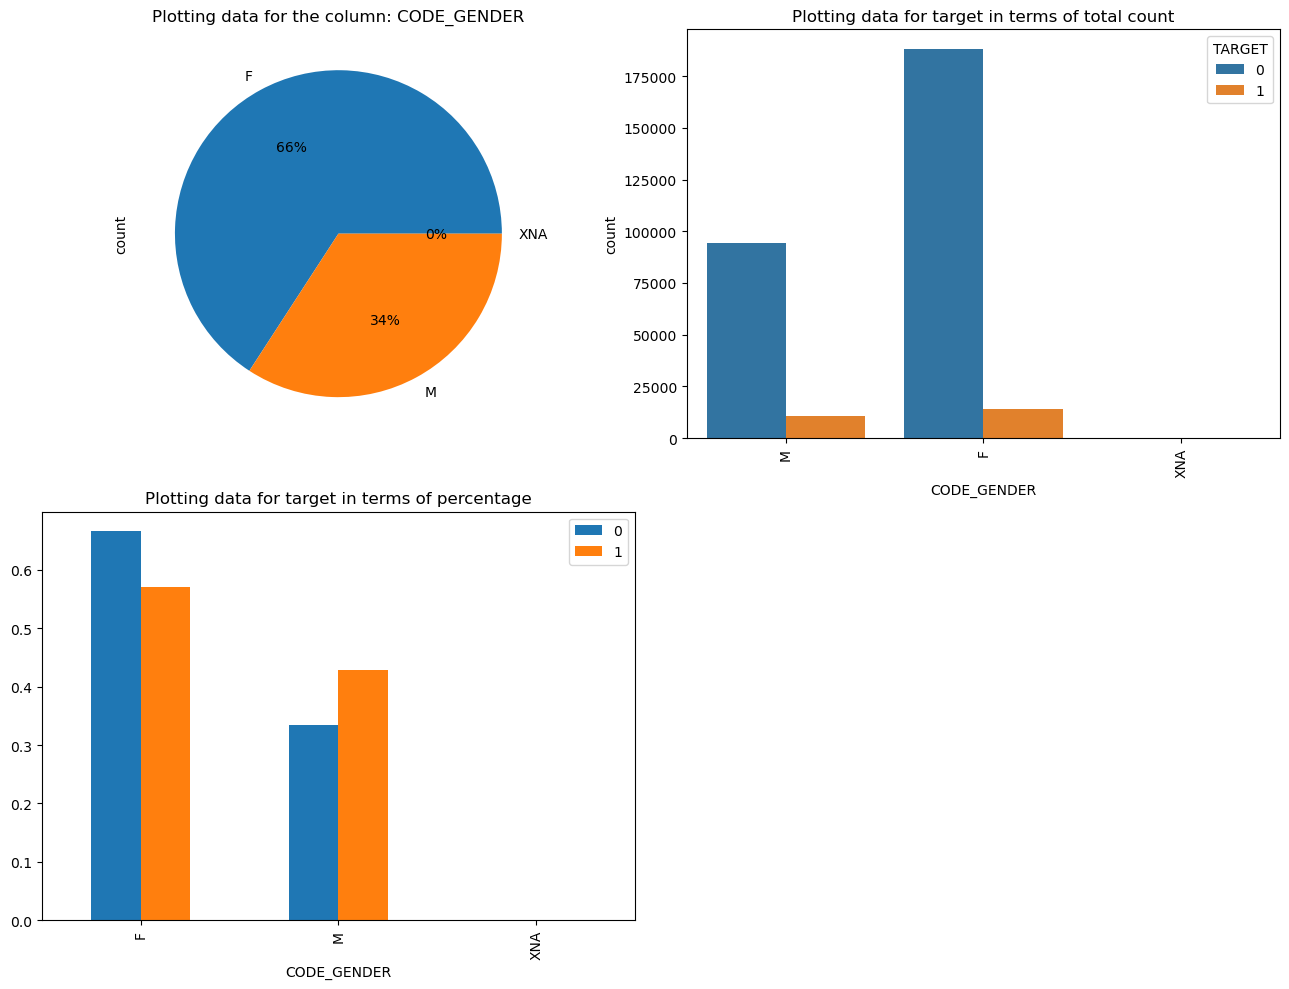

plotting FLAG_OWN_CAR


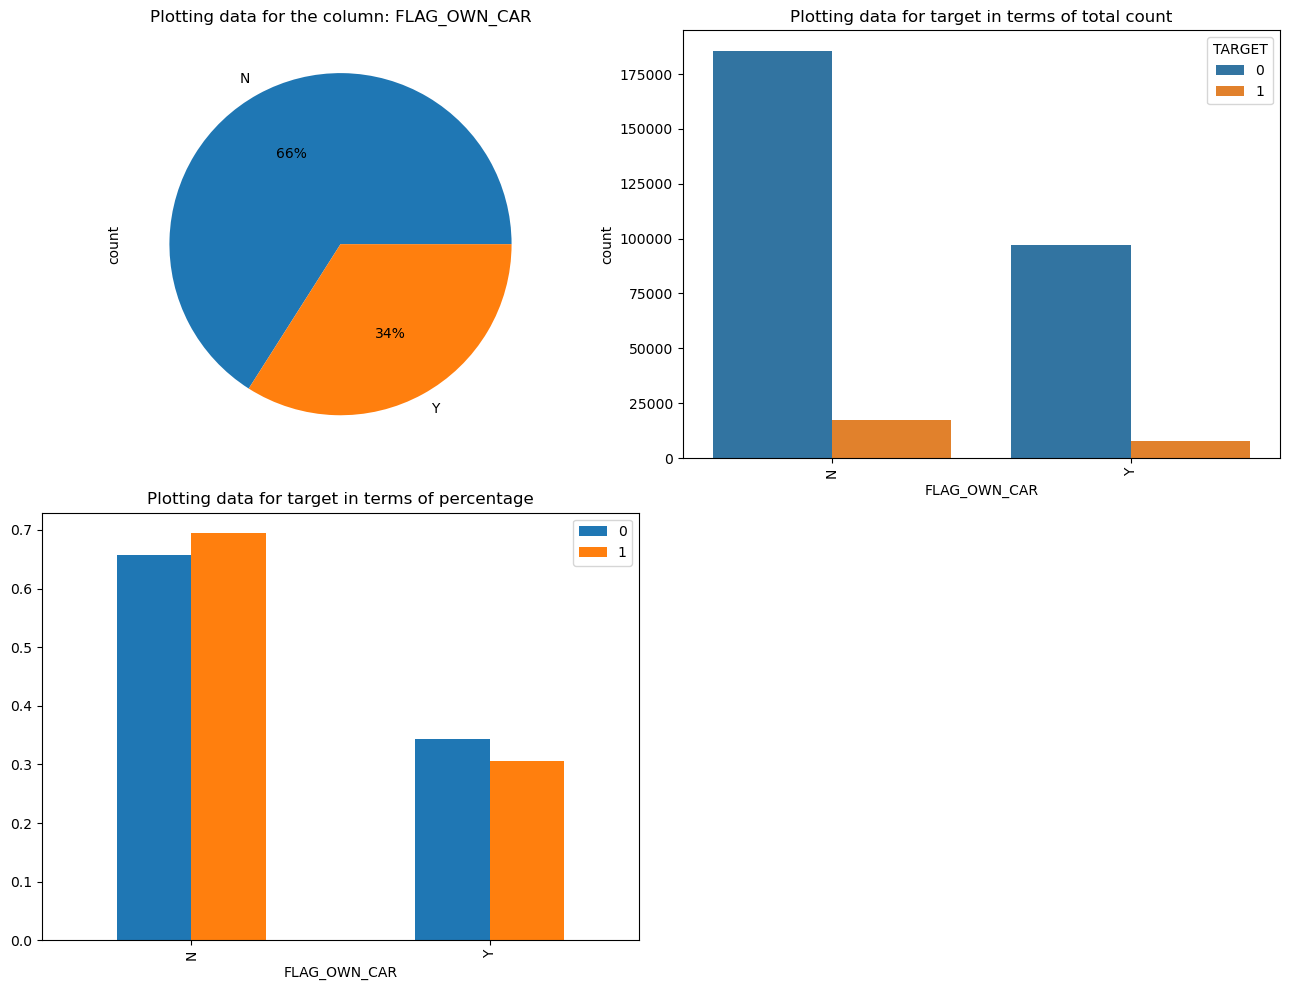

plotting FLAG_OWN_REALTY


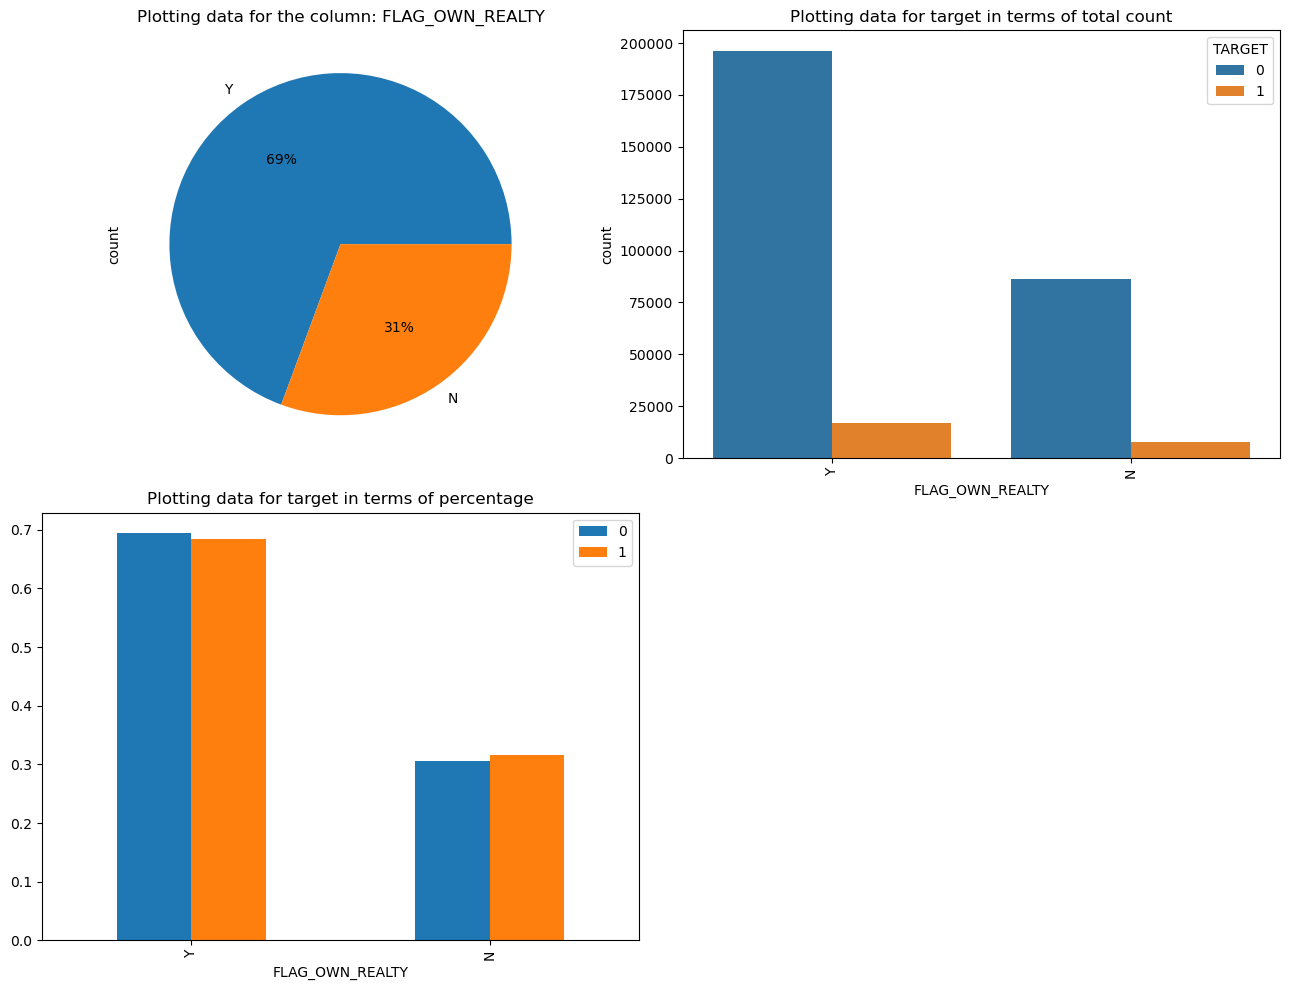

plotting NAME_TYPE_SUITE


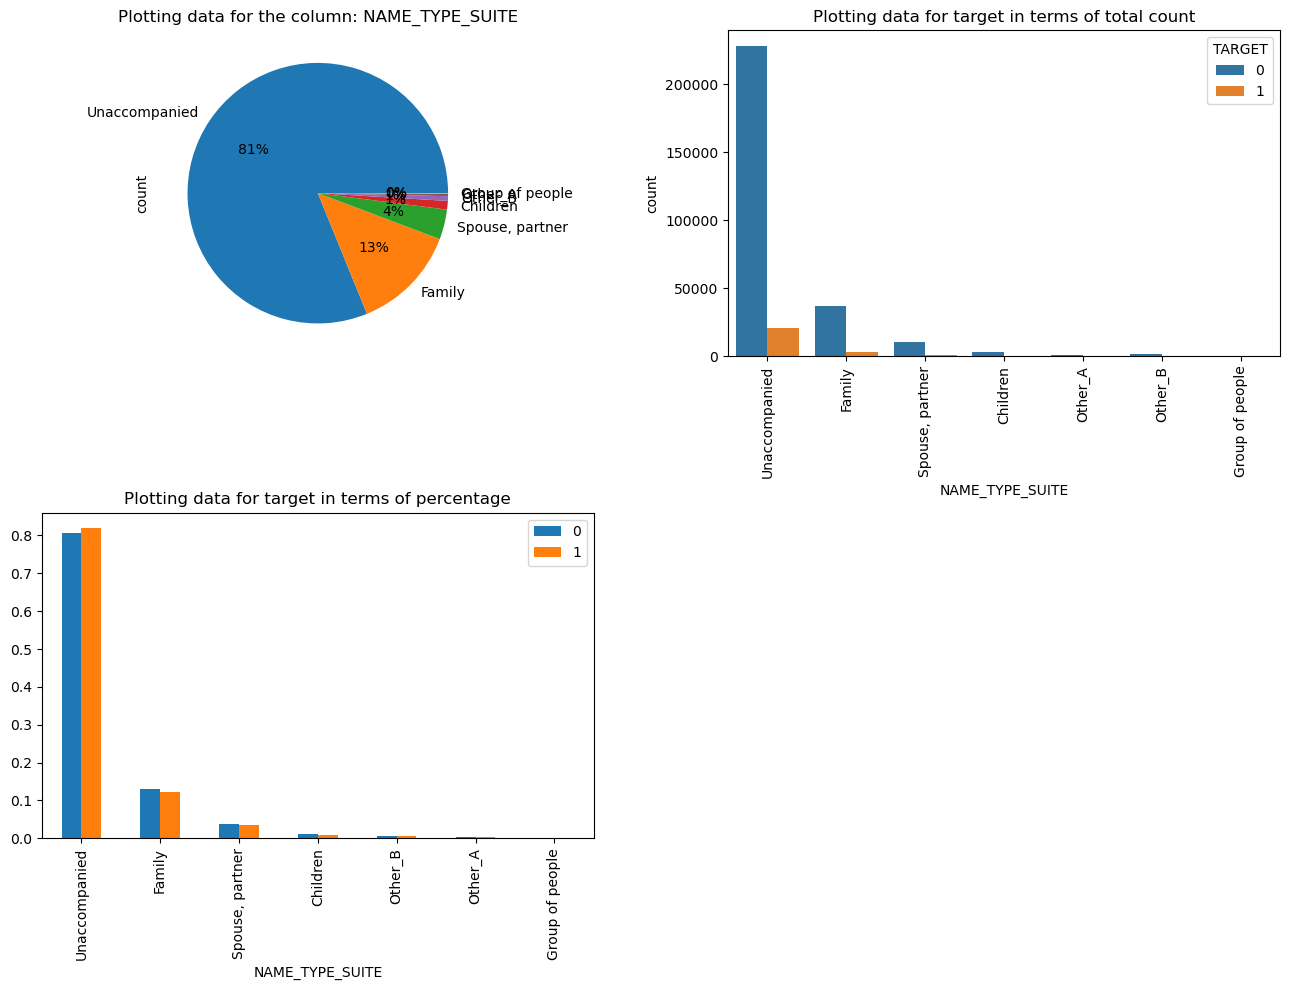

plotting NAME_INCOME_TYPE


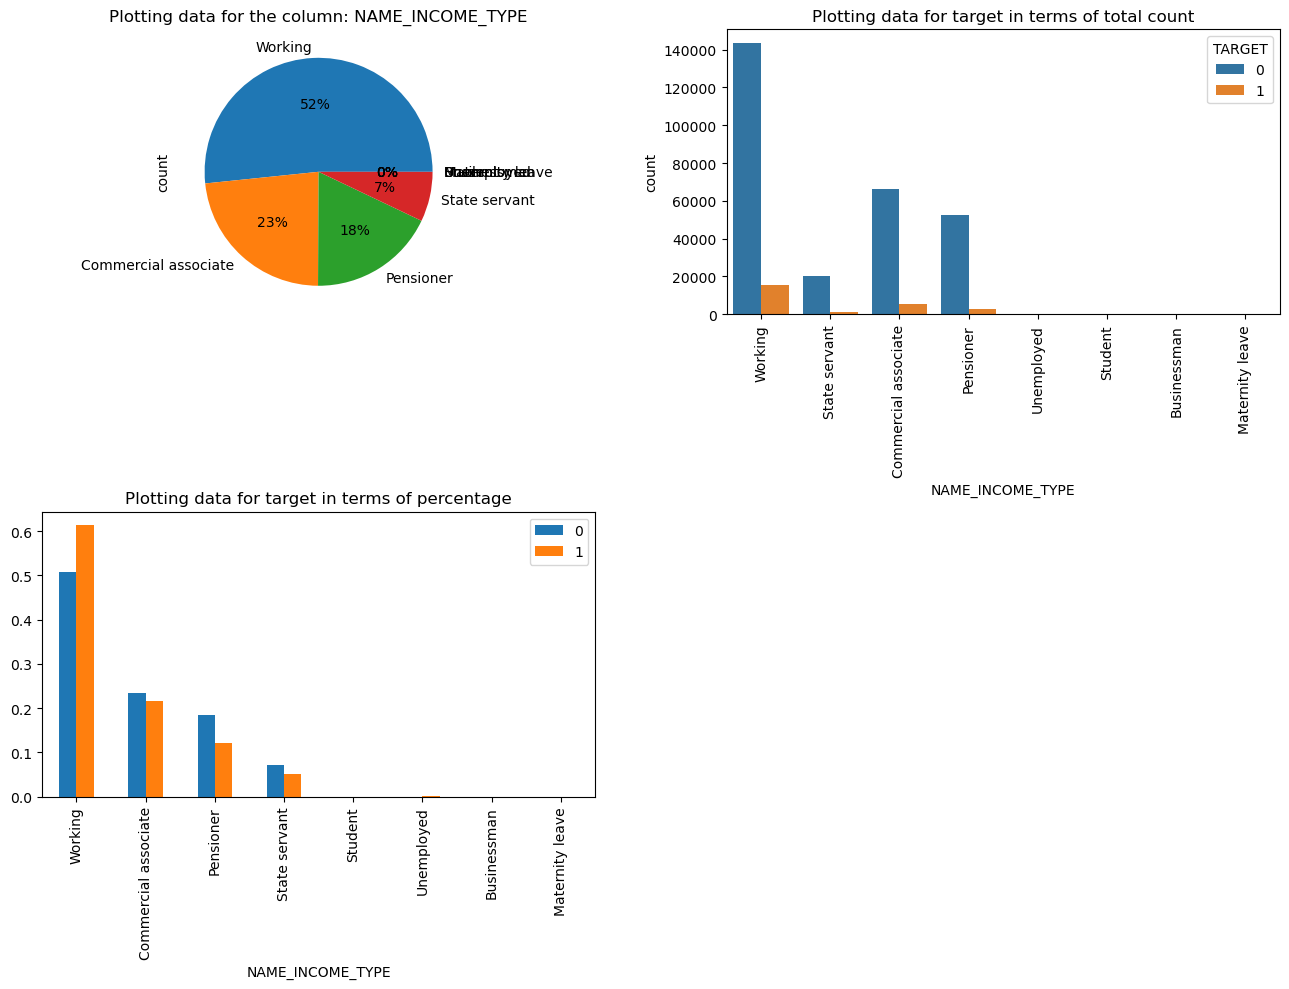

plotting NAME_EDUCATION_TYPE


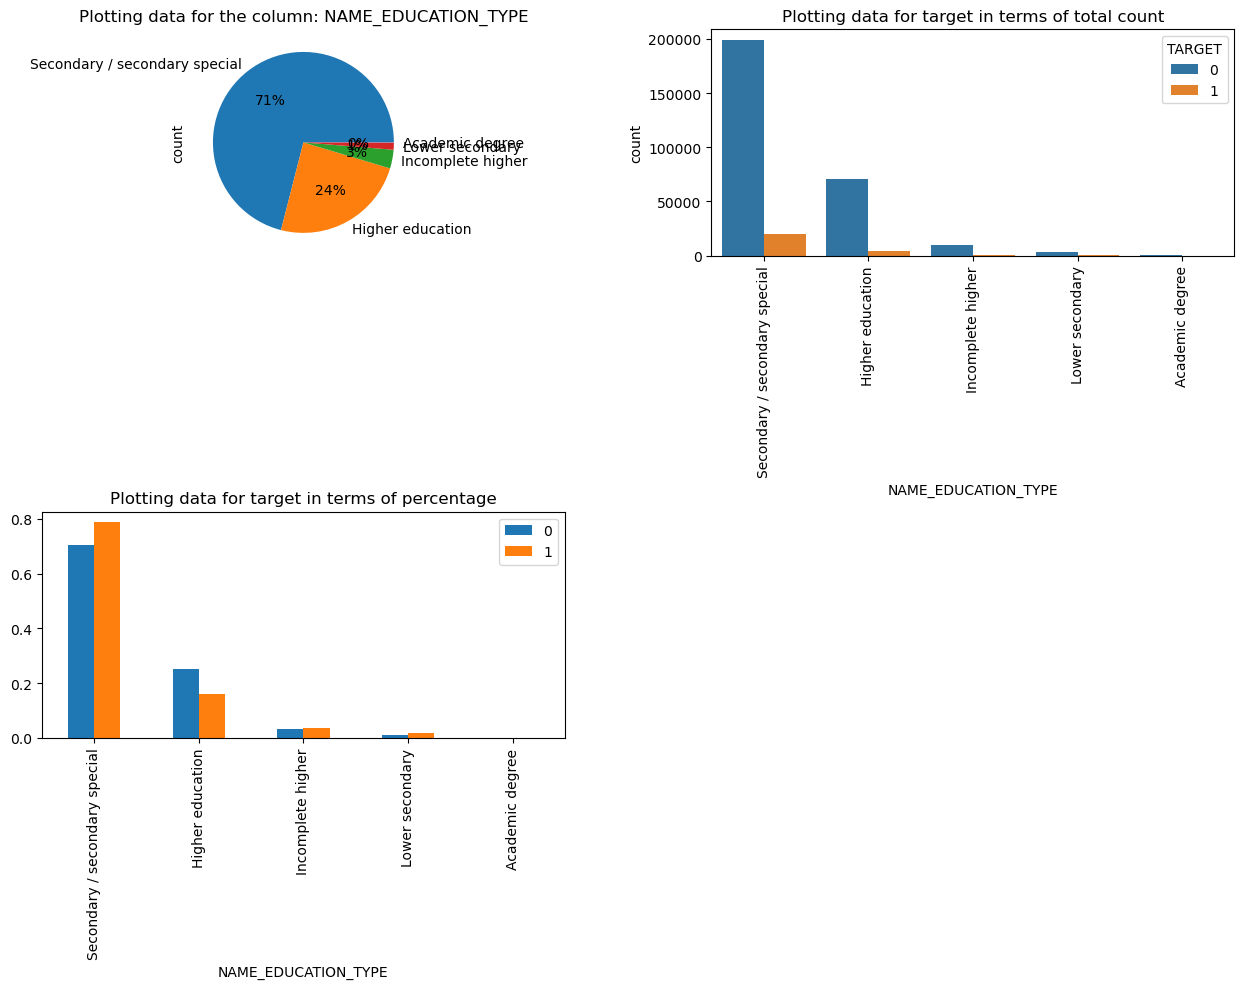

plotting NAME_FAMILY_STATUS


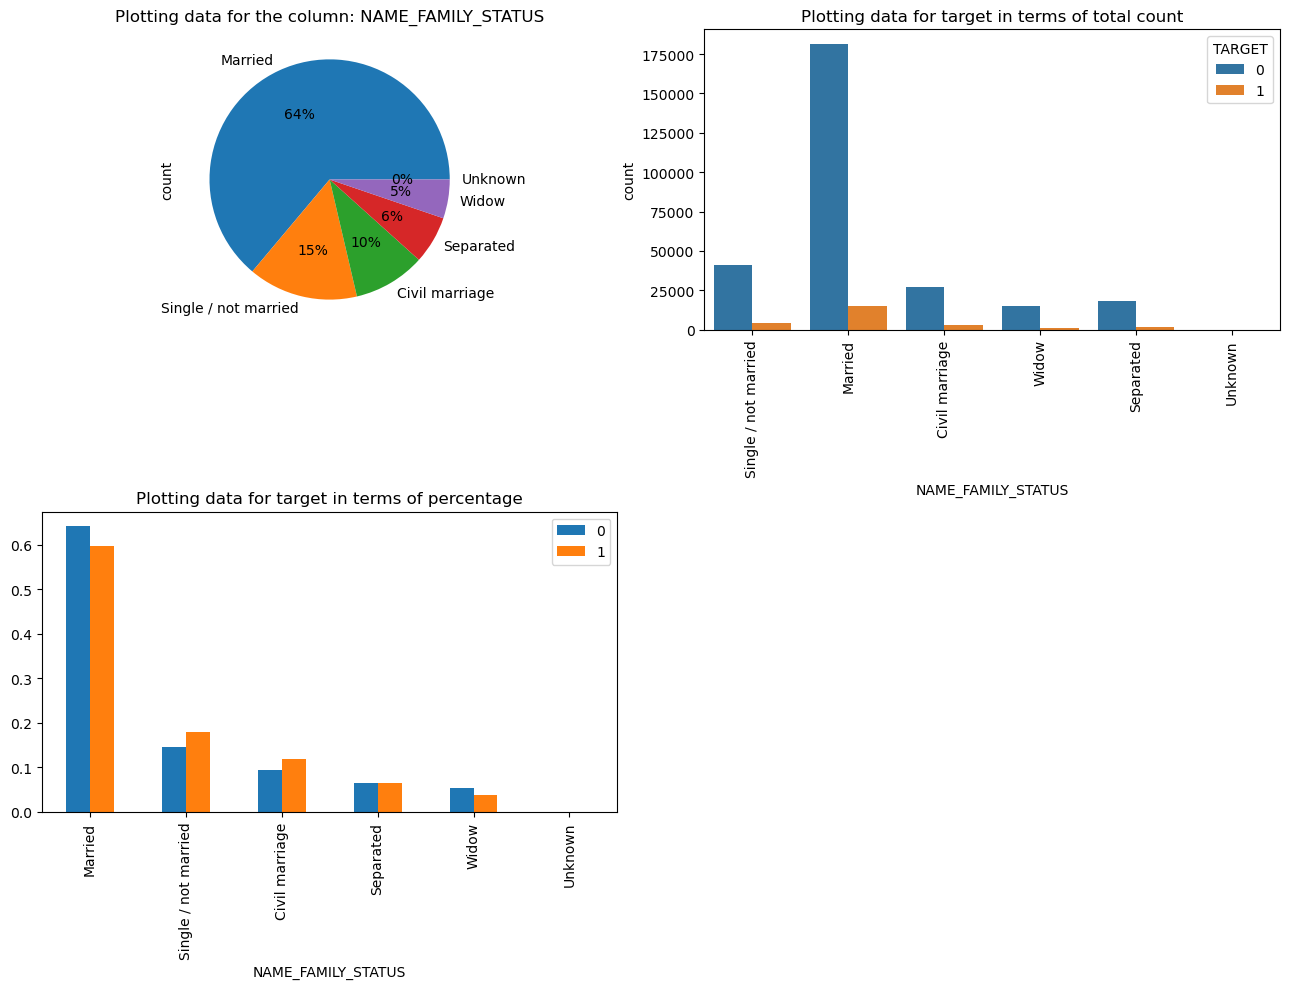

plotting NAME_HOUSING_TYPE


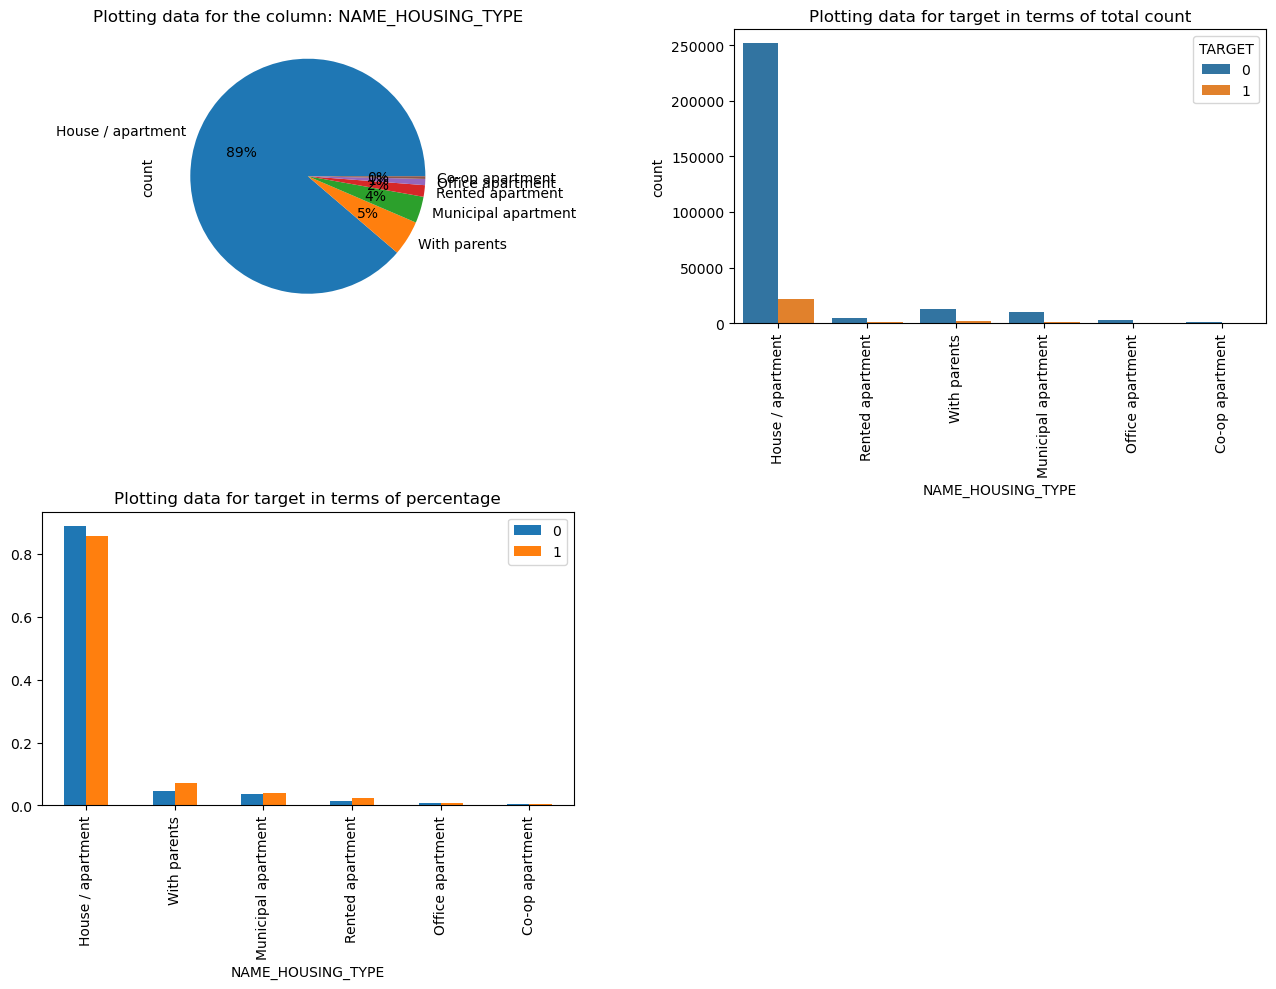

plotting OCCUPATION_TYPE


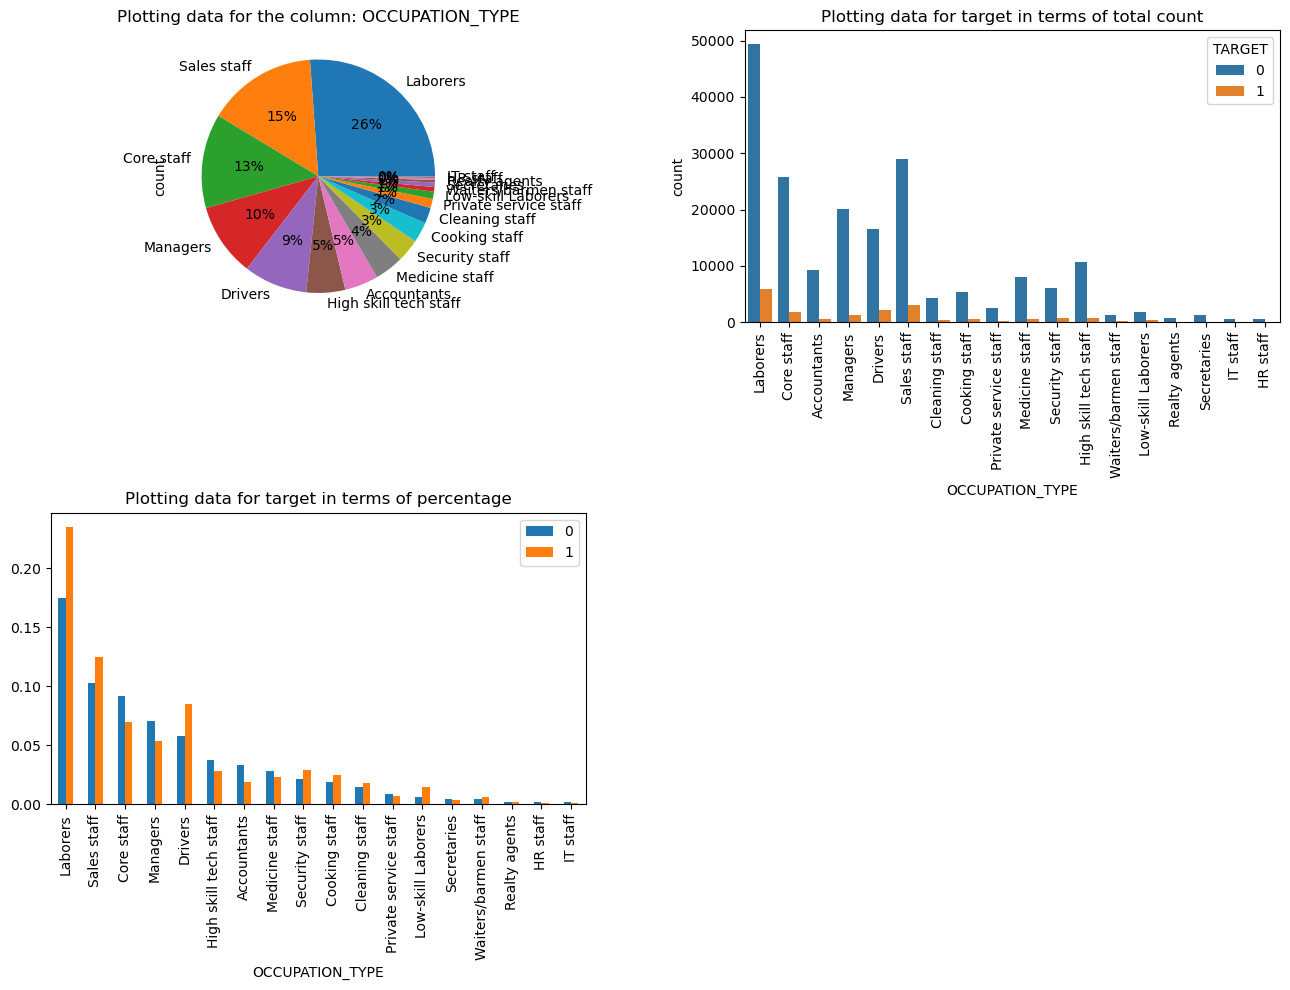

plotting WEEKDAY_APPR_PROCESS_START


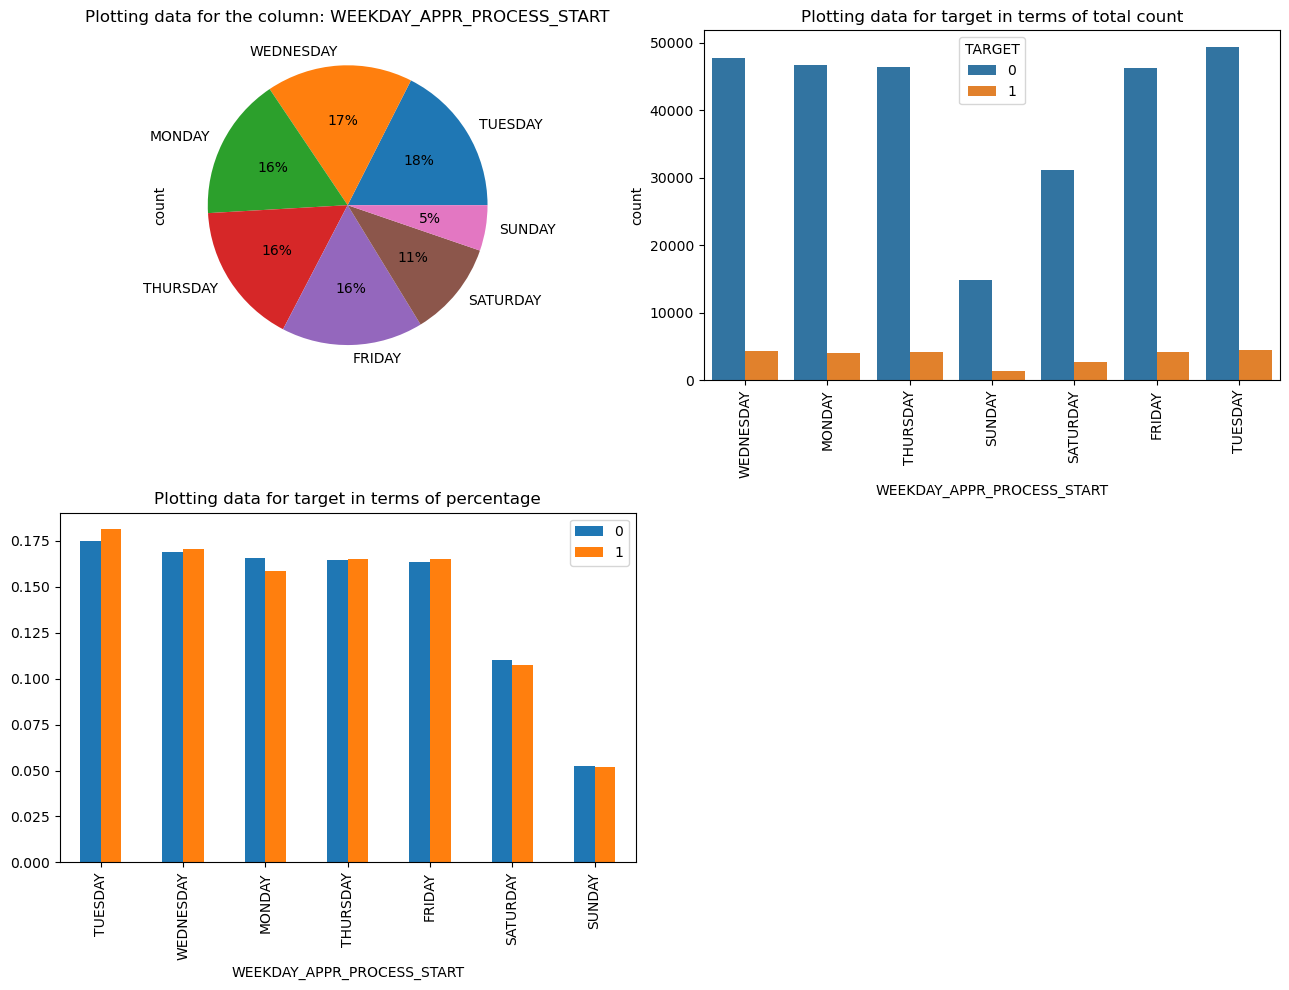

plotting ORGANIZATION_TYPE


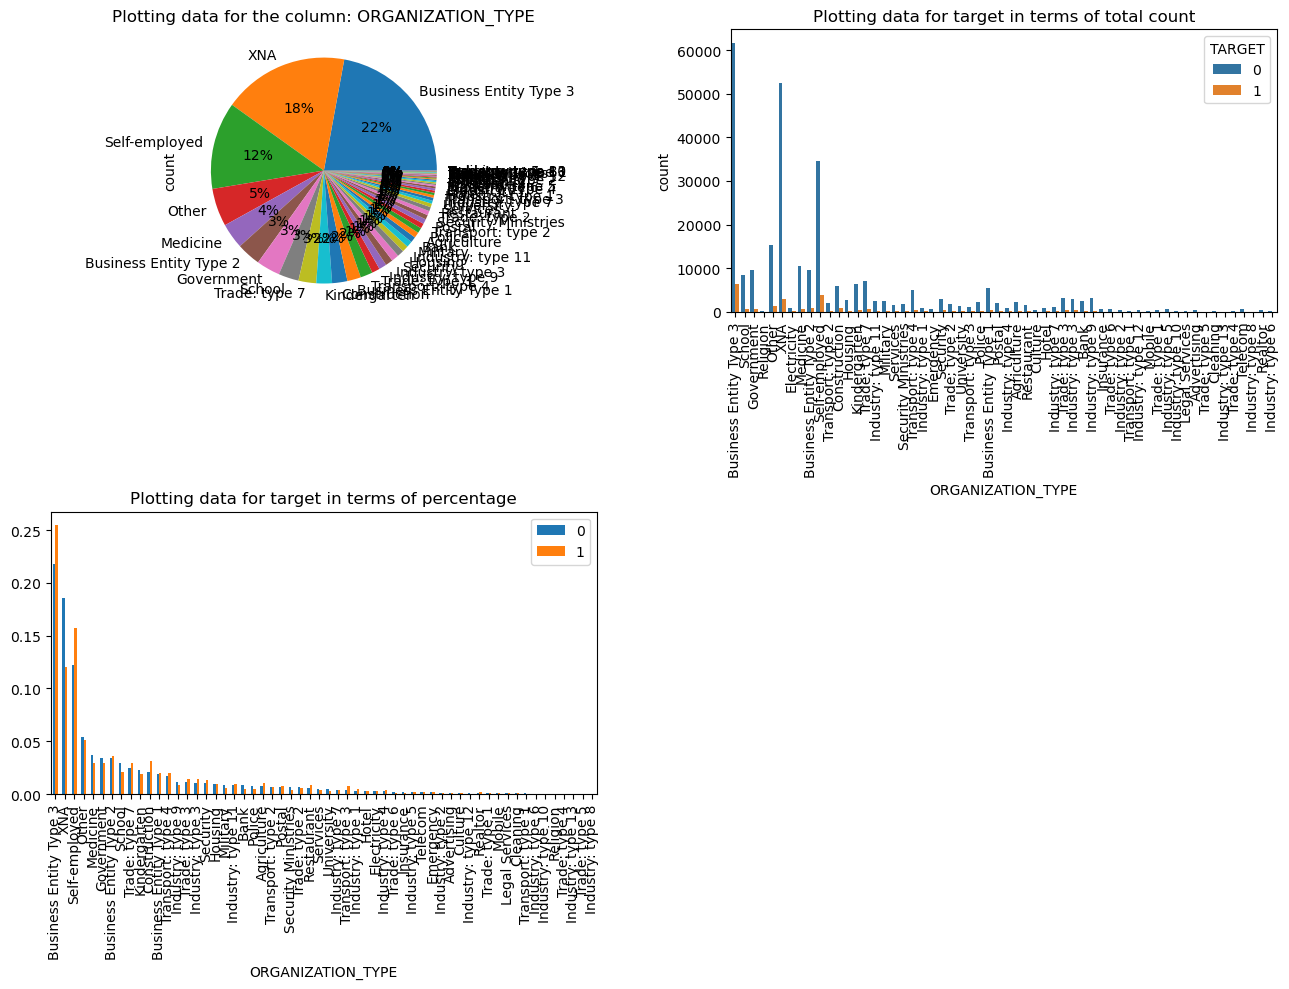

plotting EMERGENCYSTATE_MODE


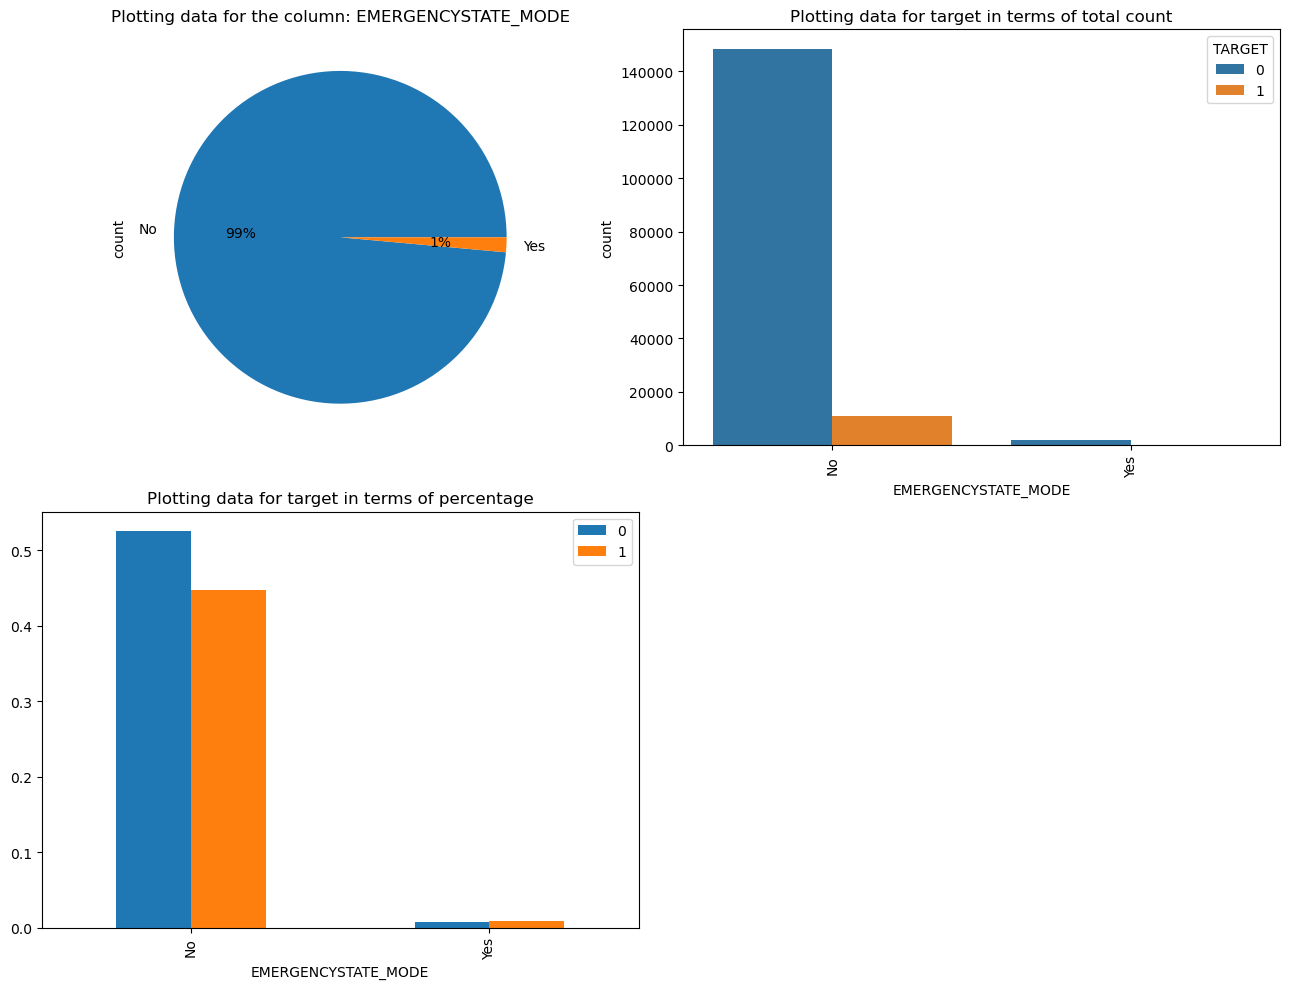

plotting amt_annuity_categorical


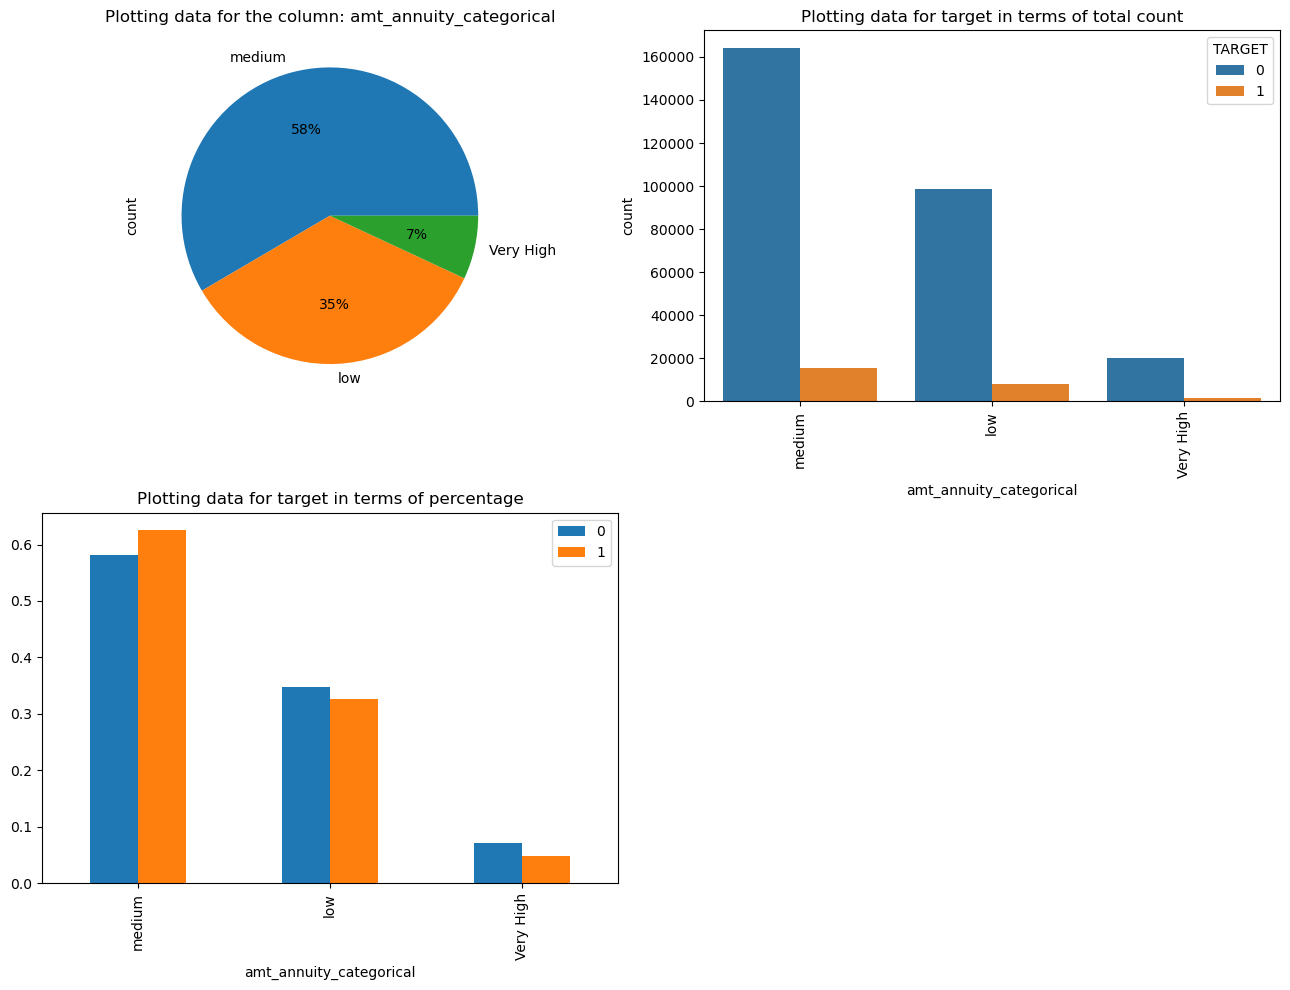

In [138]:
for column in train_categorical:
    print("plotting",column)
    plotting(train,train0,train1,column)
    

The variable which seems to be important are:
- CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
- NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.
- NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low. 
- NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.
- OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible. 
    

### Analysing through box plot

In [139]:
train_categorical=train.select_dtypes(include=['int64','float64']).columns
train_categorical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

## Analysis for the outliers
Potting the numerial data based on the index and analysing if there are outliers in any of the column. 

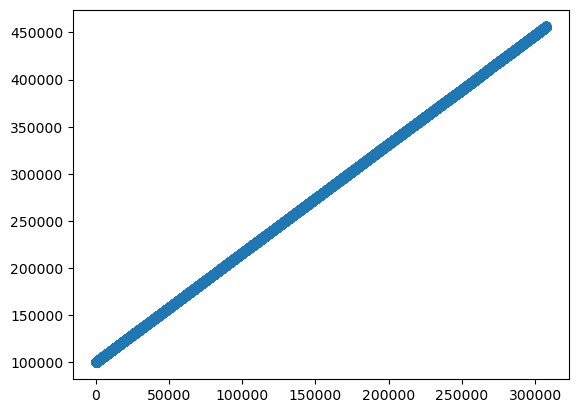

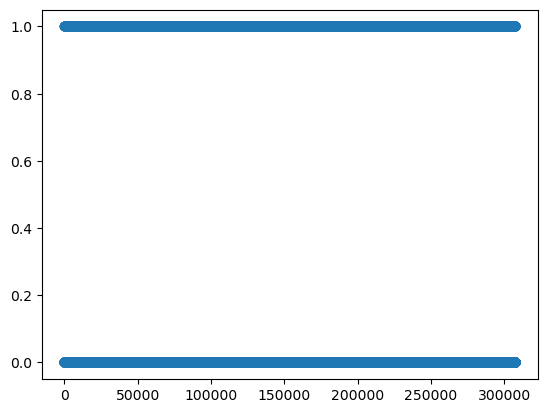

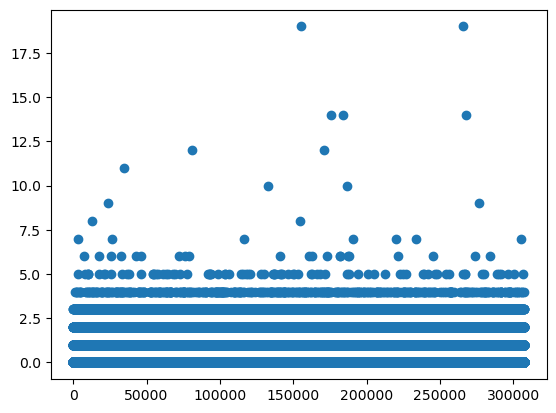

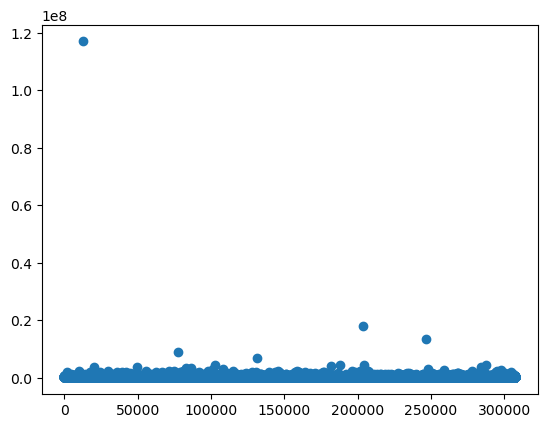

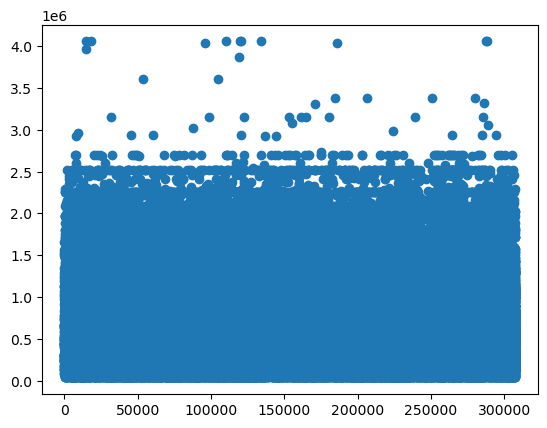

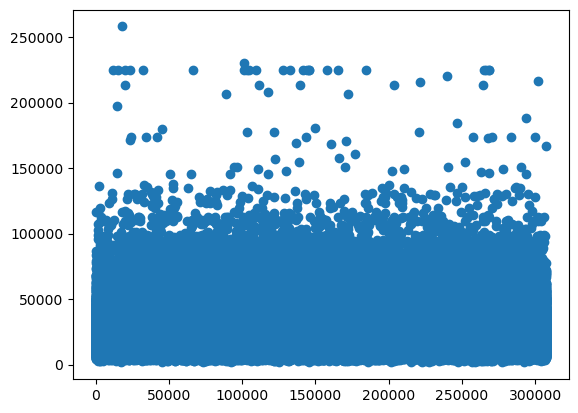

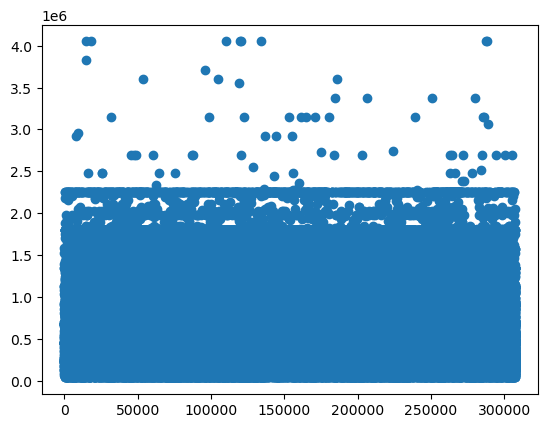

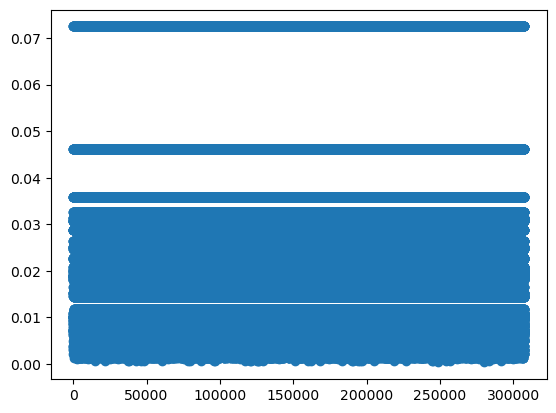

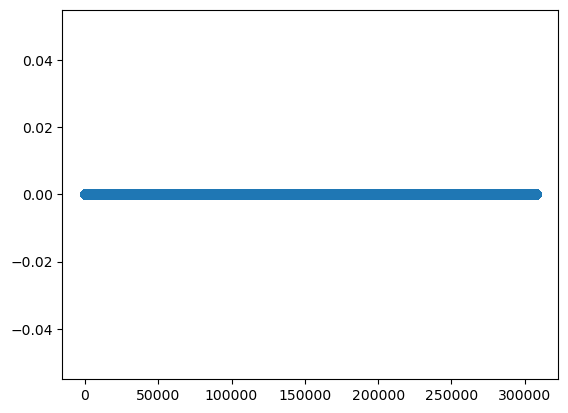

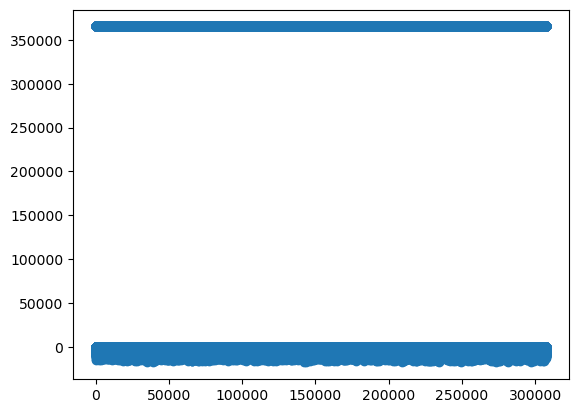

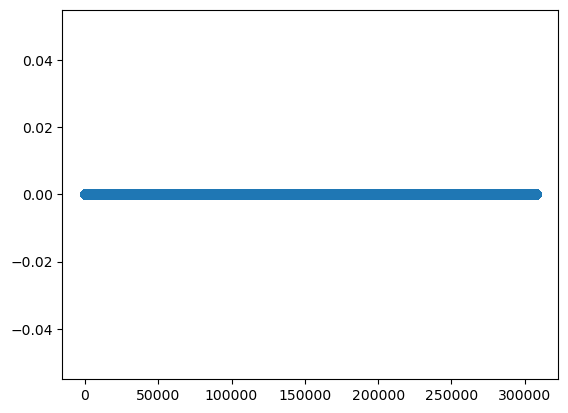

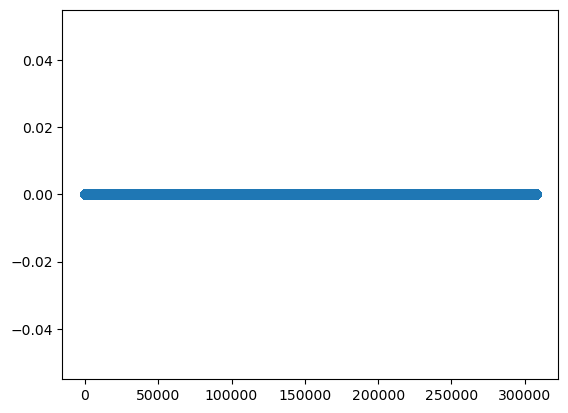

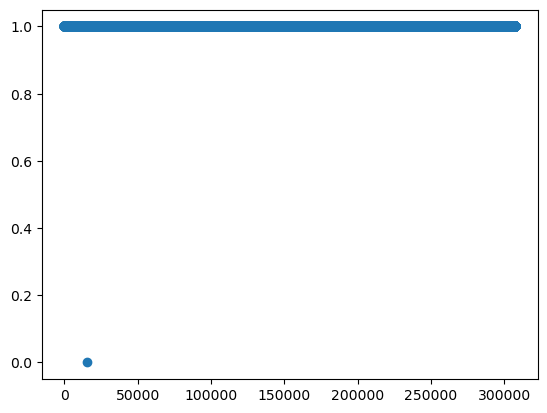

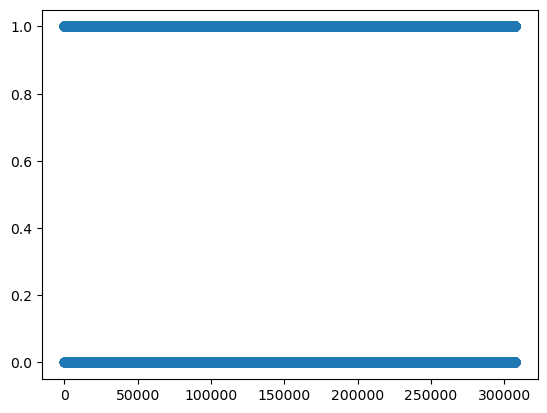

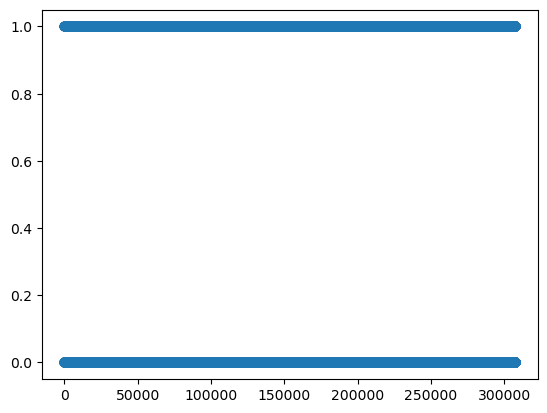

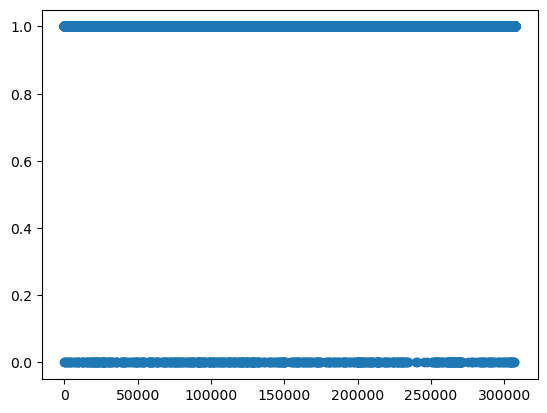

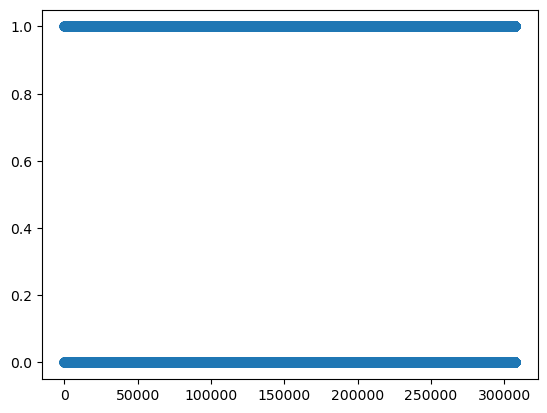

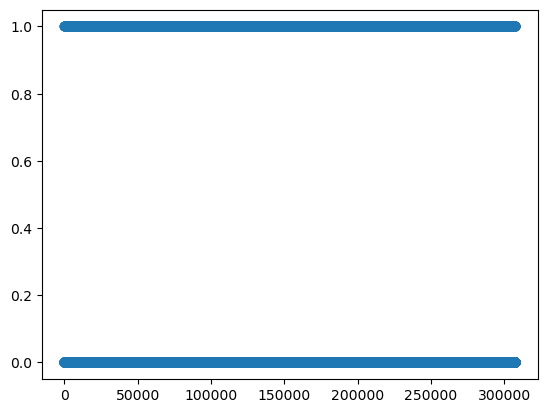

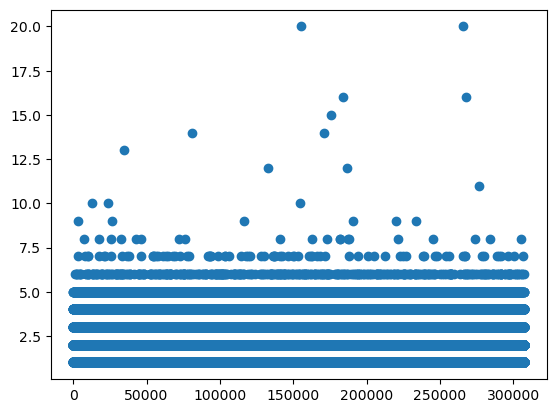

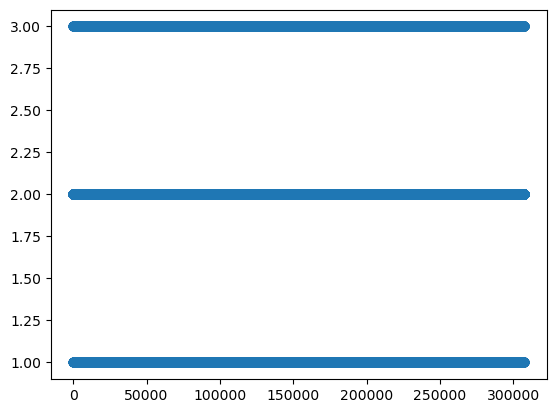

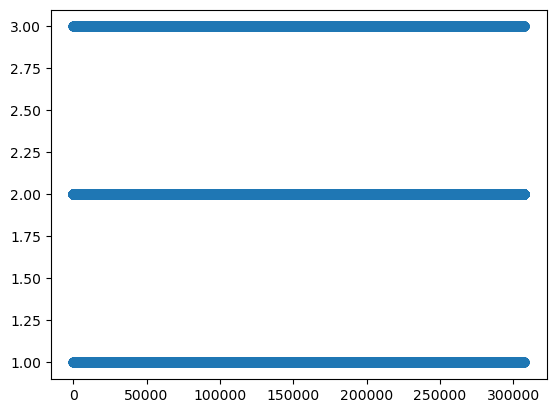

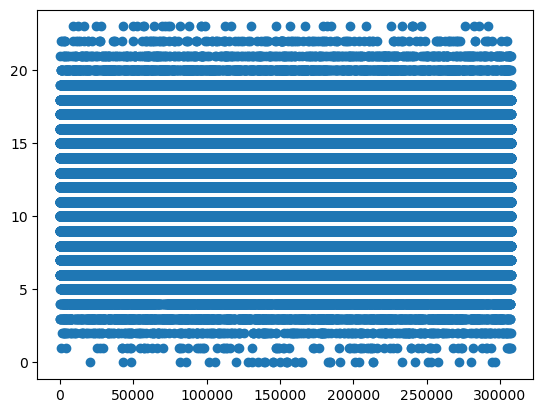

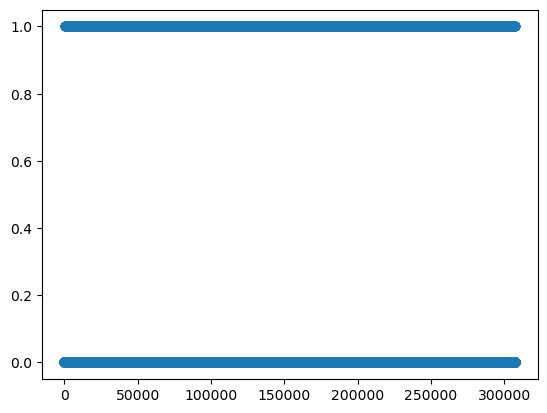

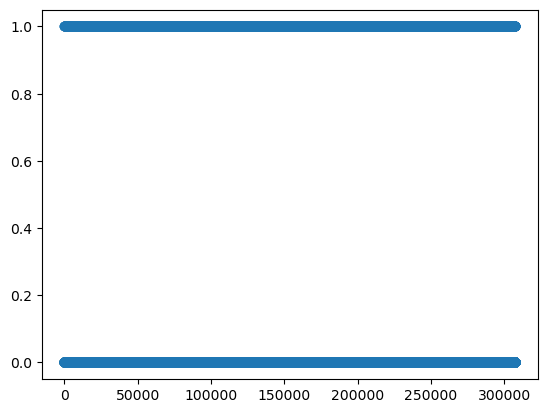

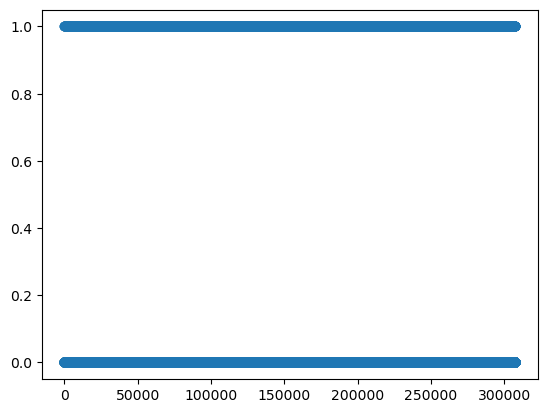

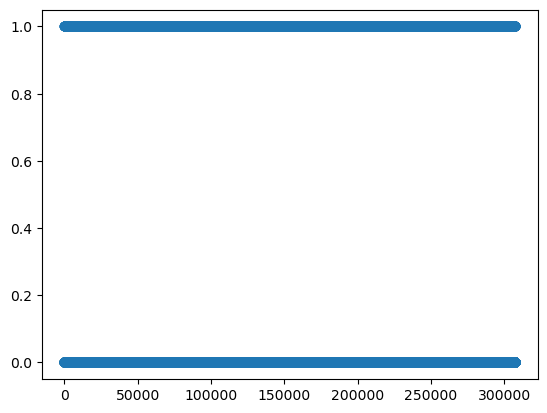

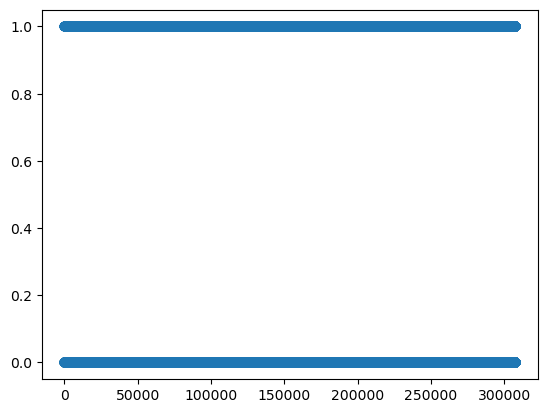

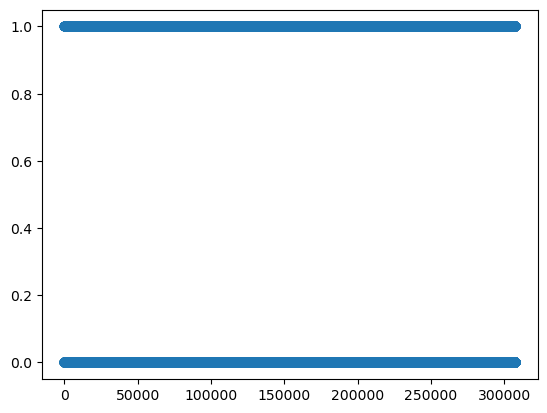

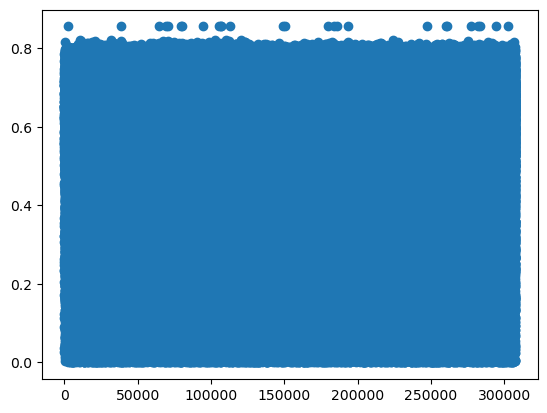

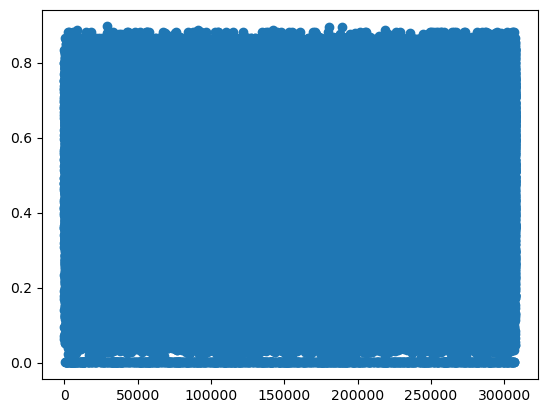

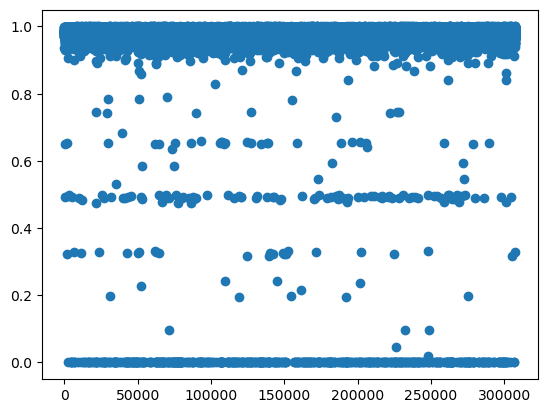

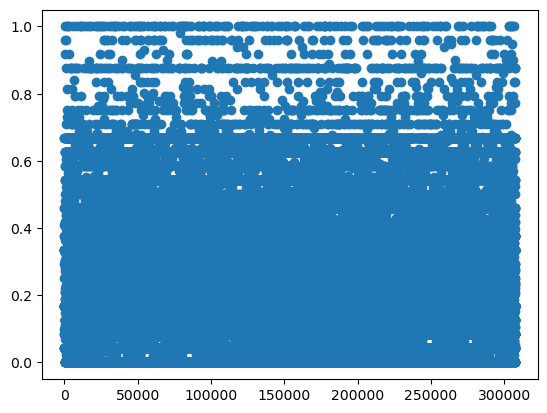

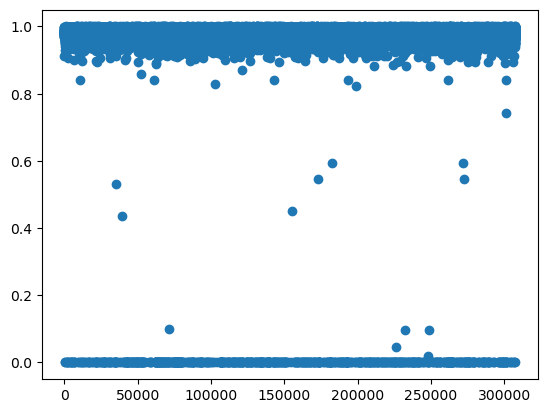

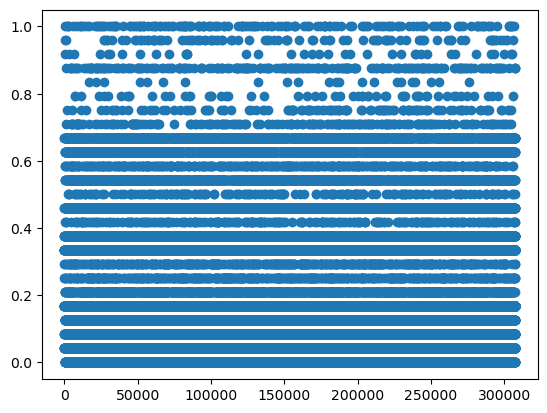

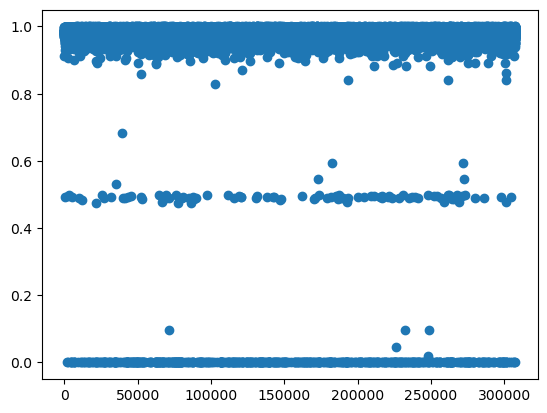

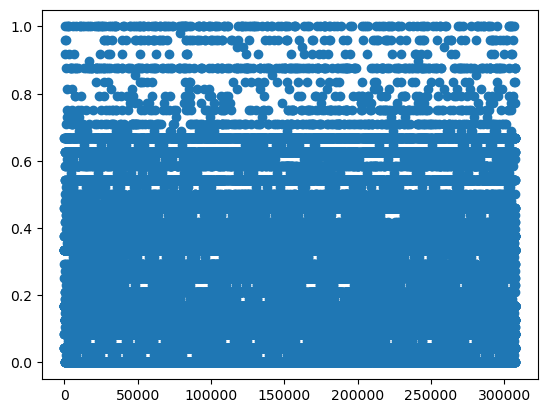

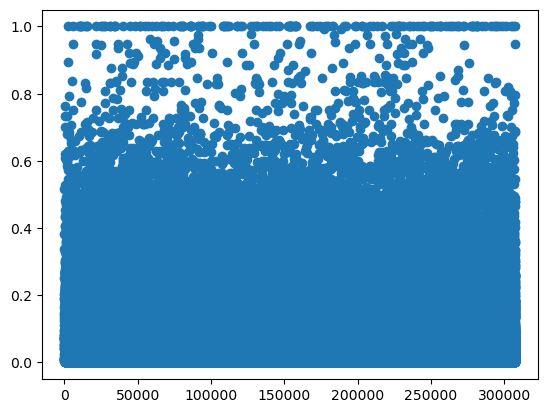

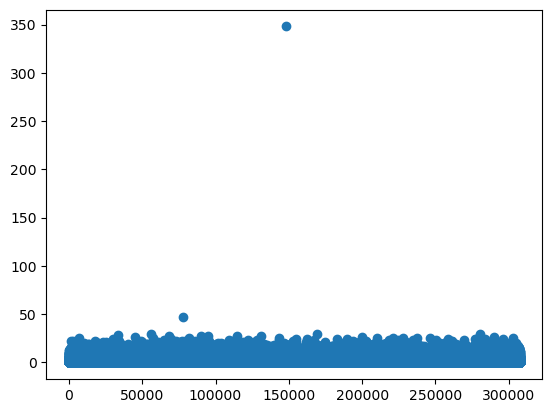

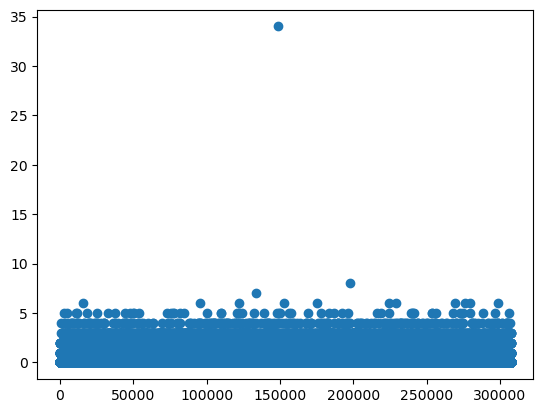

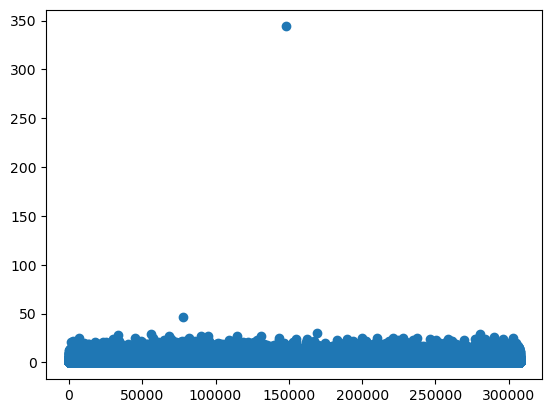

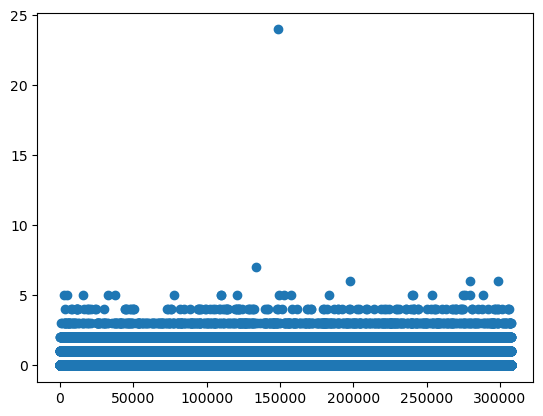

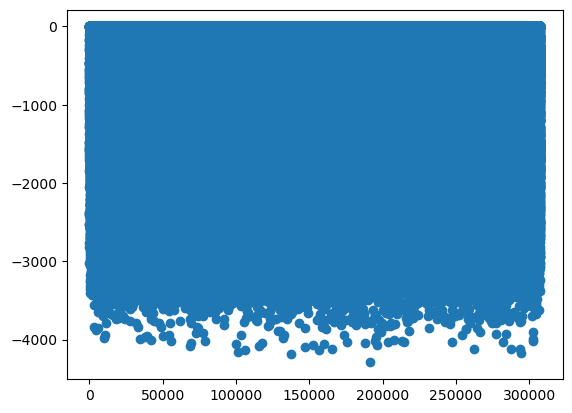

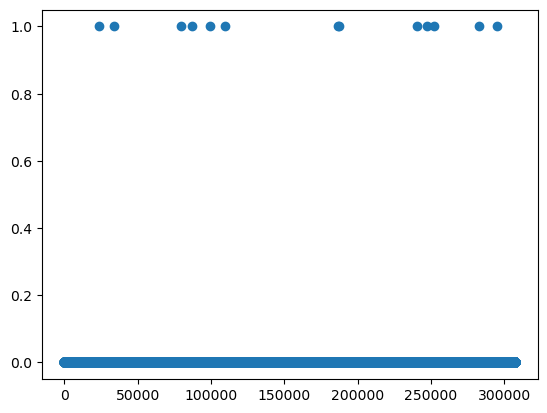

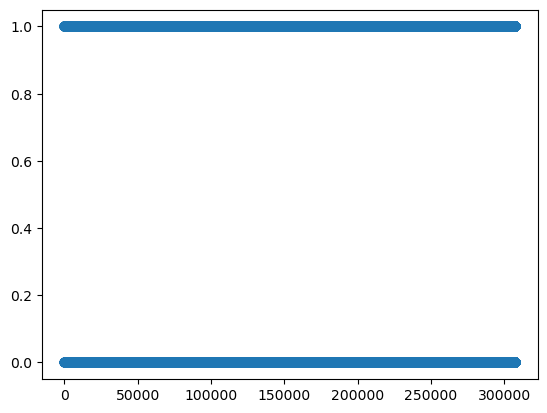

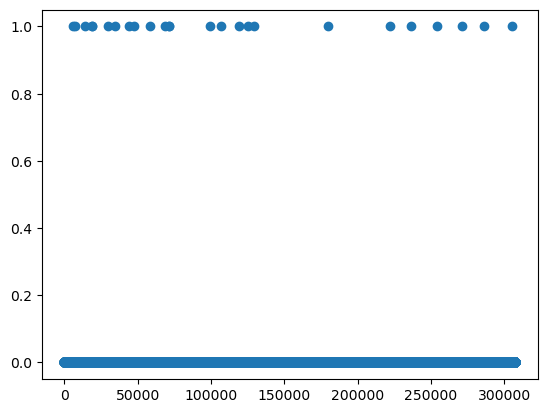

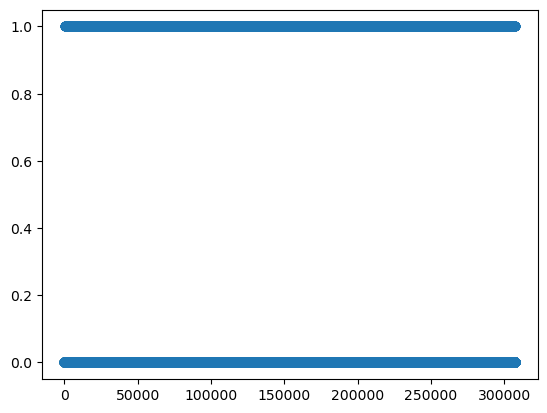

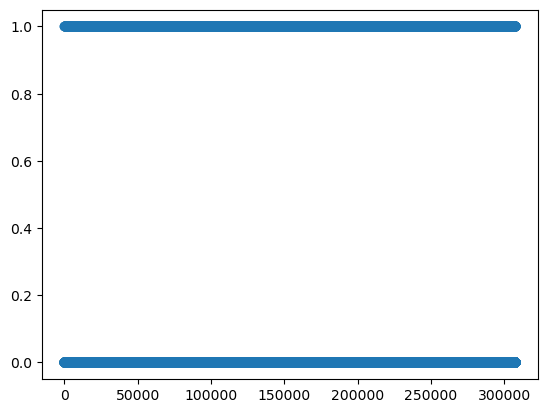

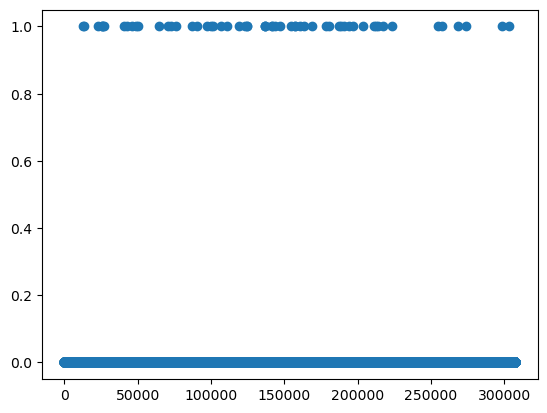

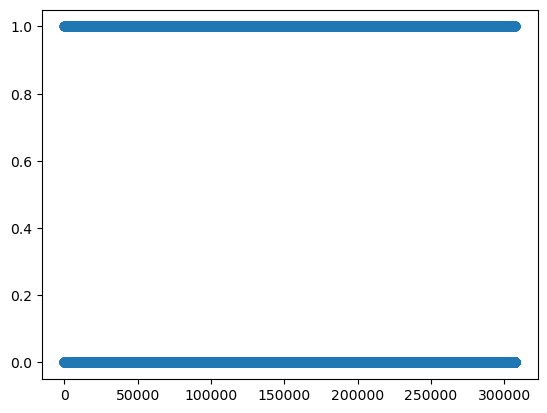

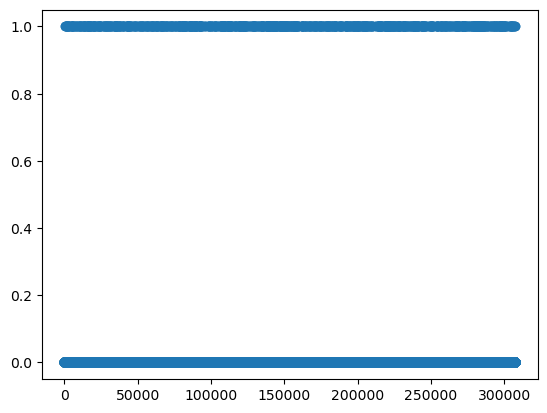

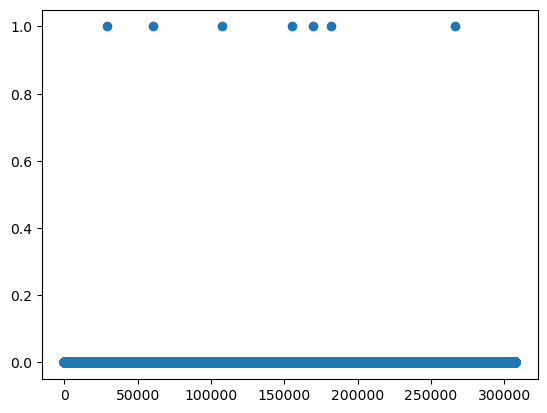

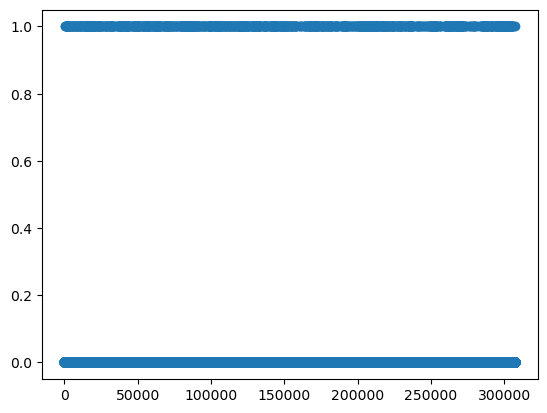

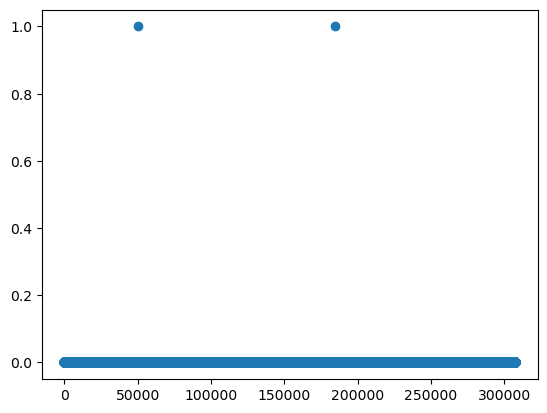

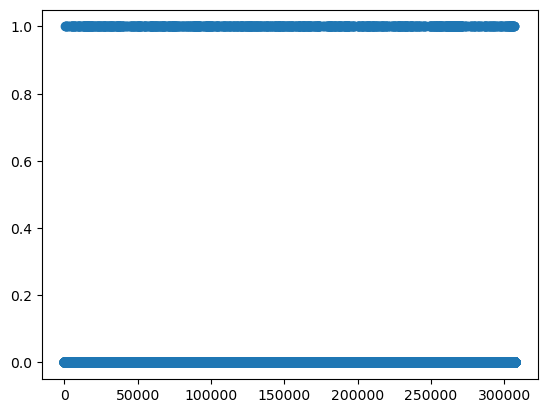

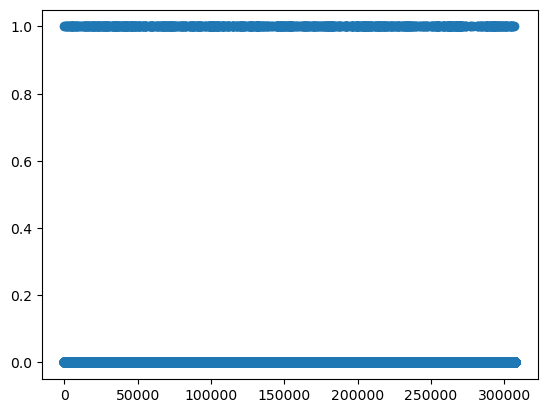

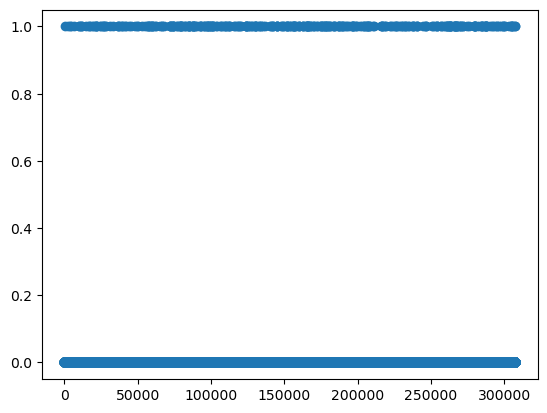

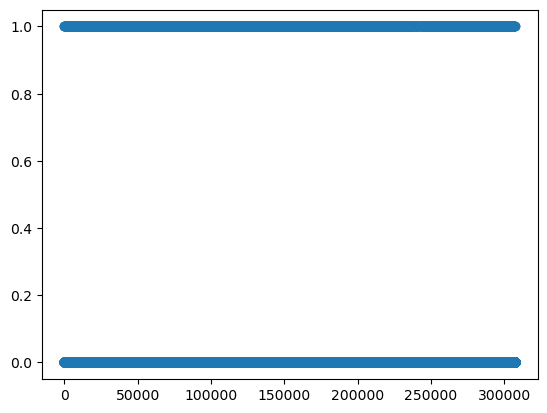

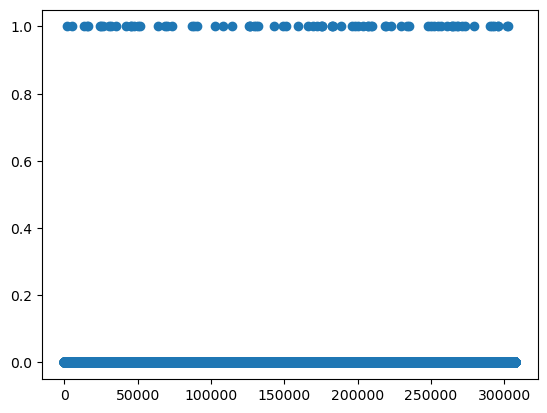

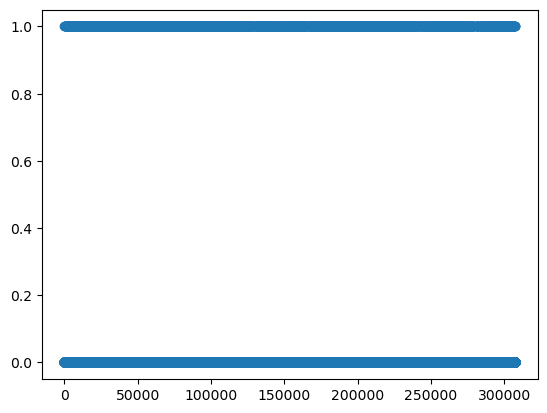

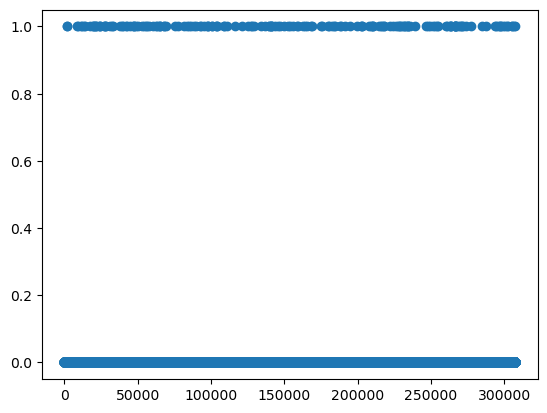

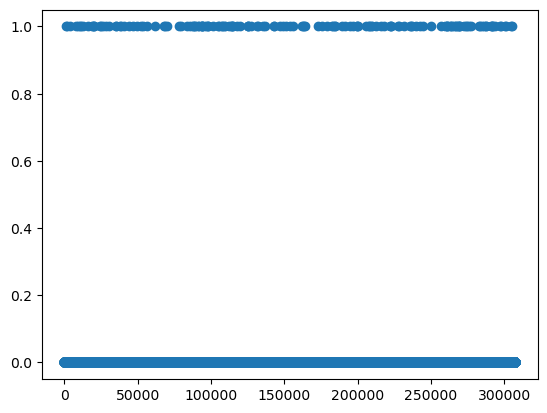

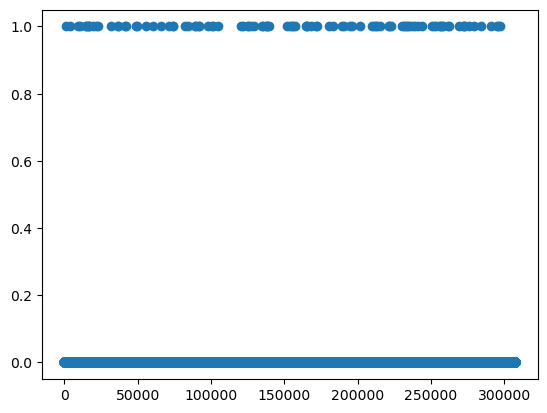

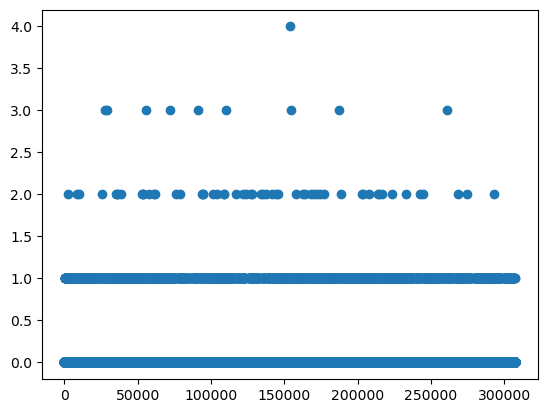

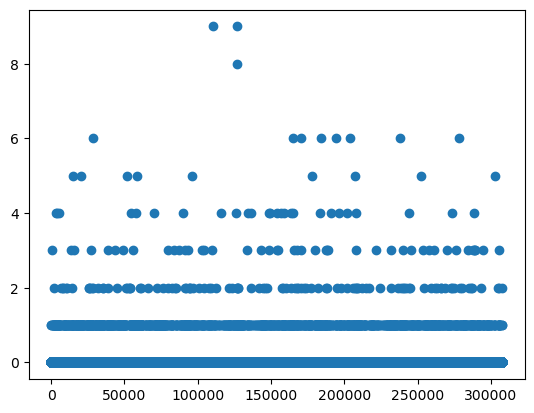

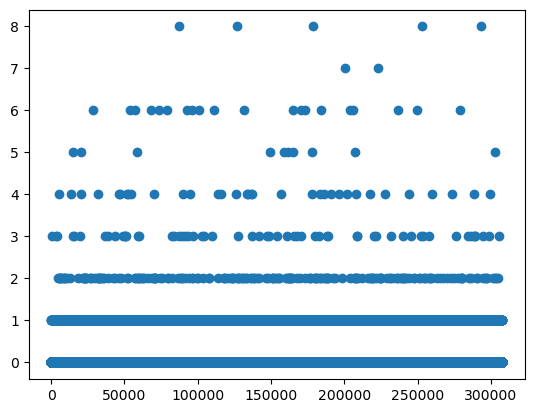

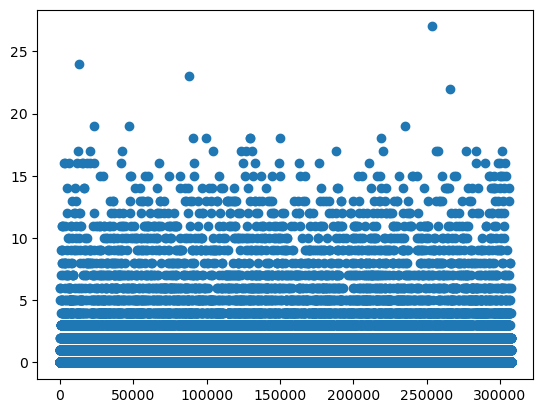

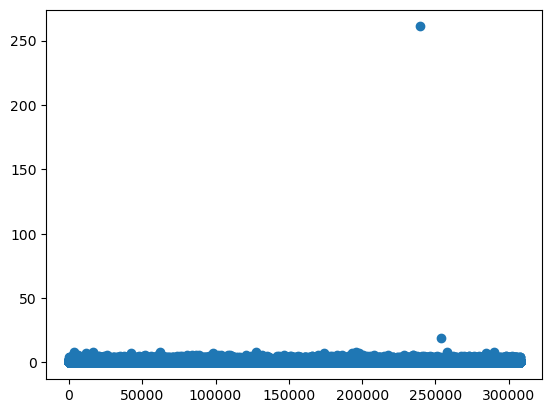

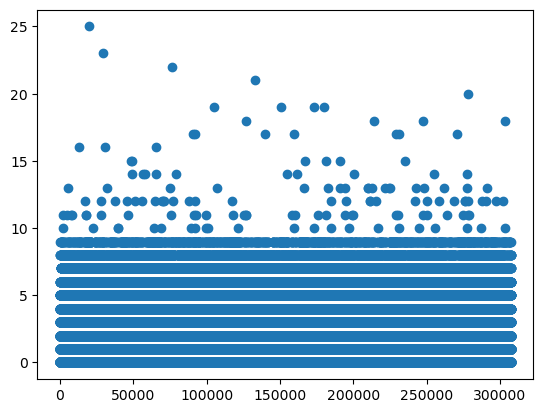

In [140]:
for column in train_categorical:
    title="plot"+column
    plt.scatter(train.index,train[column])
    plt.show()

The analysis of the outliers is mainly based on the bussiness problem. And if the data does not have any error, removing the extreme value will be based on the bussiness need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values. 
Some of the columns that need to be analyses are:
- CNT_CHILDREN - Count of children - Some client have >10 childen, which looks like an extreme value. 
- AMT_INCOME_TOTAL - Income of the client - One value with value ~1.2 1e8 seems to be outlier as the value is significantly far away form others and can be removed. 
- FLAG_MOBILE - There may be a case where a client does not have mobile. Not sure whether it qualifies to be an outlier. 

Similary, you can see some other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE etc. 


## Converting a numerial data to categorical for analysis

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


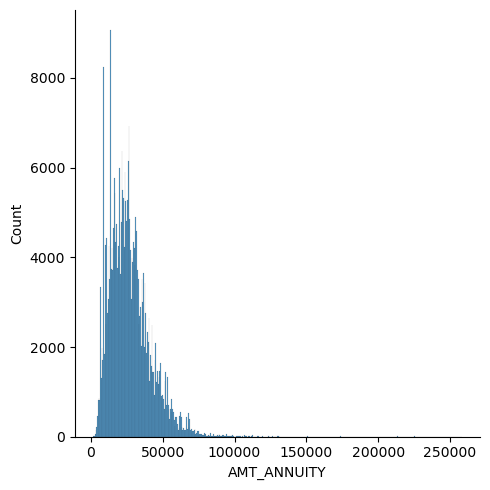

In [128]:
sns.displot(train['AMT_ANNUITY'].dropna())

In [130]:
def amt_annuity(x):
    if x<20000:
        return "low"
    elif x>20000 and x<=50000:
        return "medium"
    elif x>50000 and x<-100000:
        return "High"
    else:
        return "Very High"
train['amt_annuity_categorical']=train['AMT_ANNUITY'].apply(lambda x:amt_annuity(x))
    

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\4156379956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['amt_annuity_categorical']=train['AMT_ANNUITY'].apply(lambda x:amt_annuity(x))


<Axes: xlabel='amt_annuity_categorical', ylabel='count'>

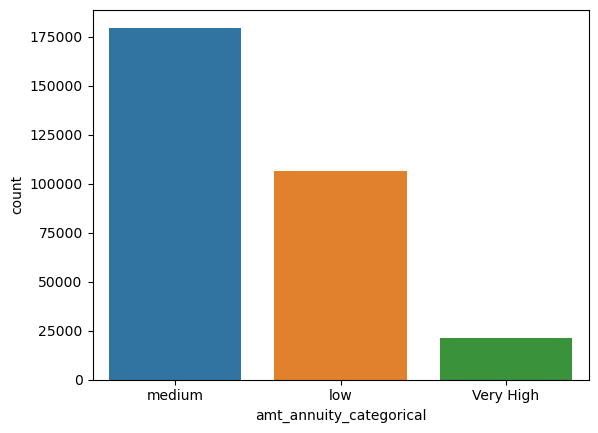

In [131]:
sns.countplot(x='amt_annuity_categorical',data=train)

# Univariate Analysis for numerical data
For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot. 

Plot of SK_ID_CURR


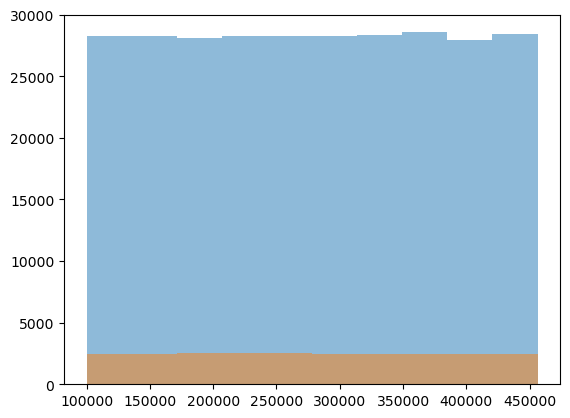

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

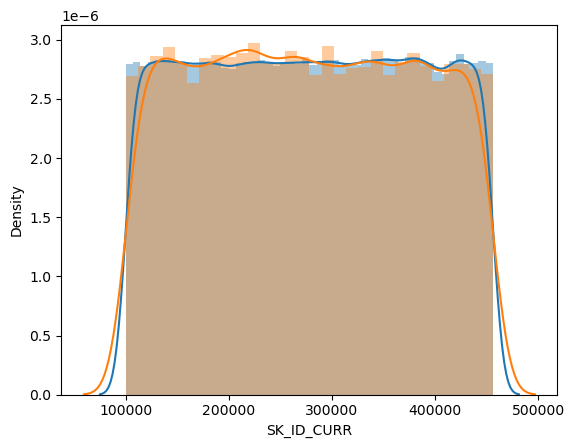

------------------------------------------------------------------------
Plot of TARGET


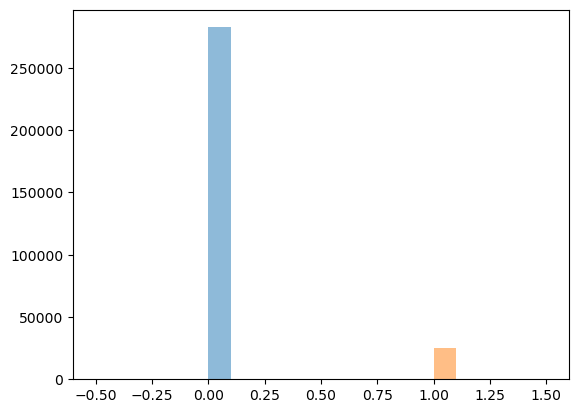

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
D:\anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

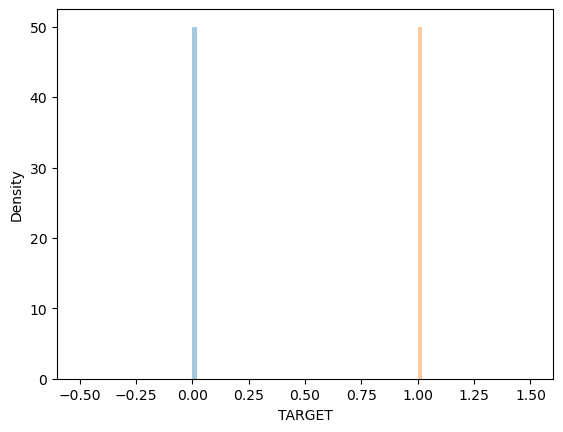

------------------------------------------------------------------------
Plot of CNT_CHILDREN


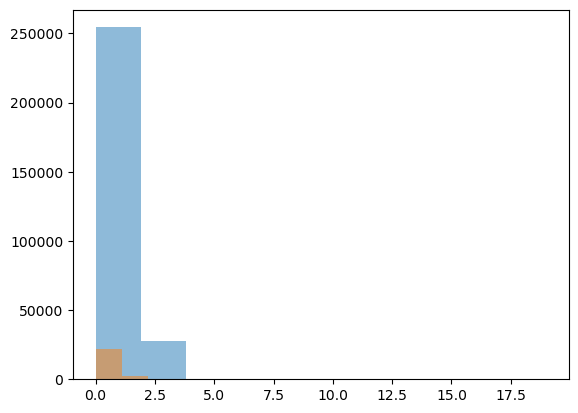

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

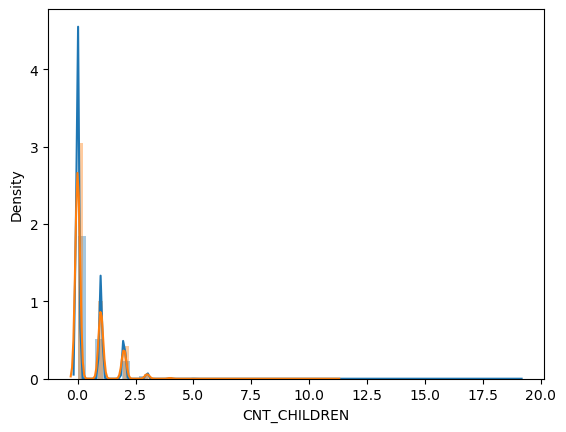

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


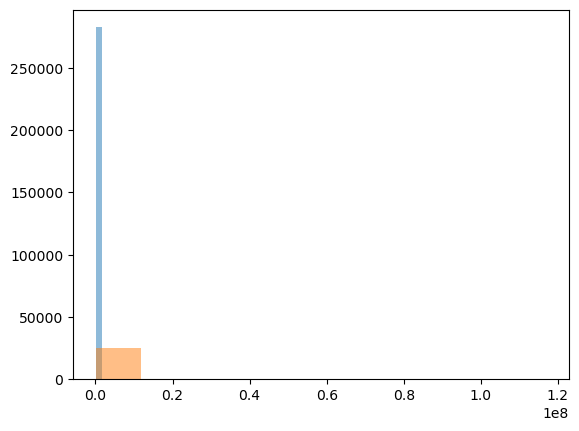

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

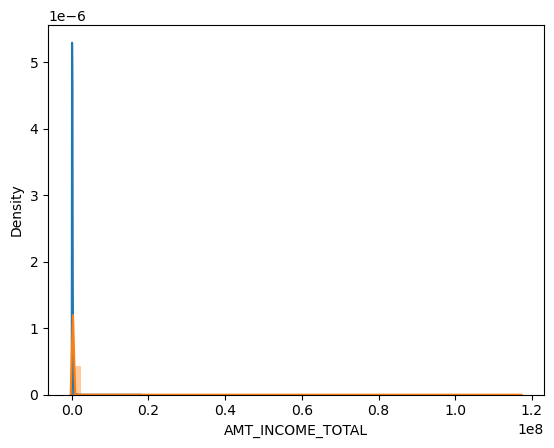

------------------------------------------------------------------------
Plot of AMT_CREDIT


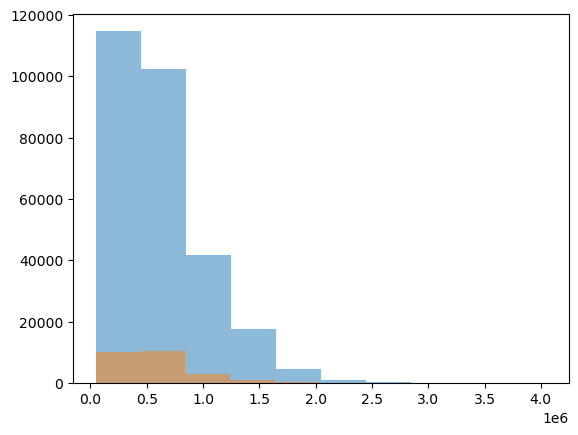

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

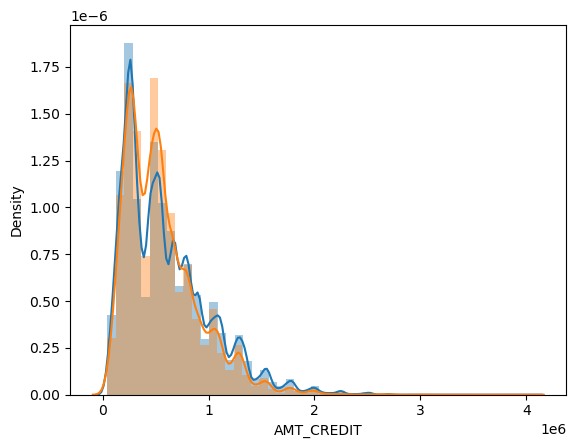

------------------------------------------------------------------------
Plot of AMT_ANNUITY


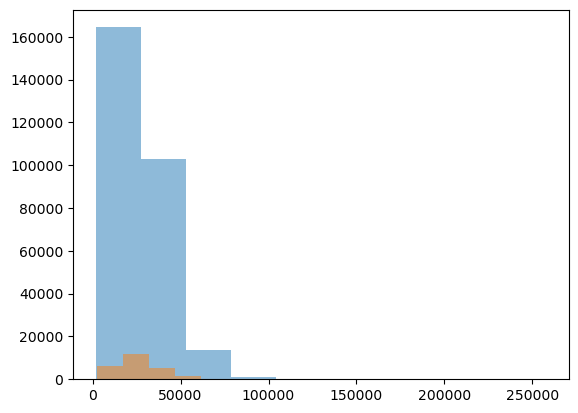

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

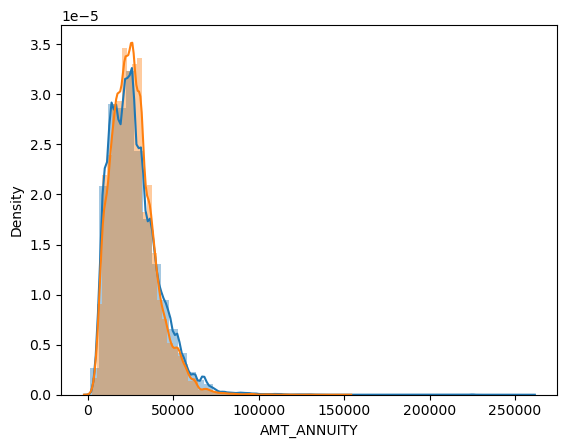

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


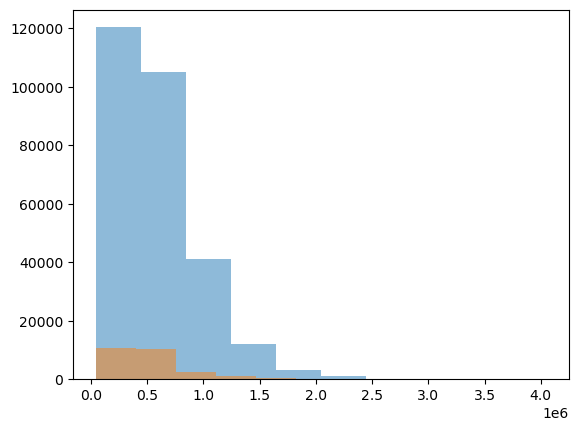

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

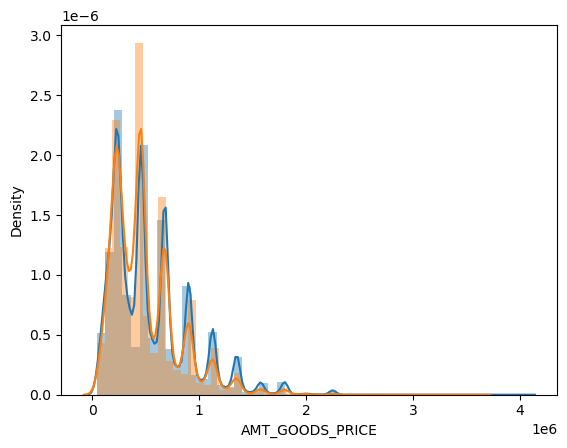

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


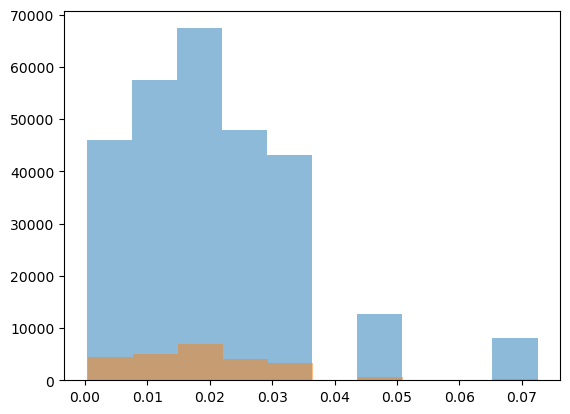

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

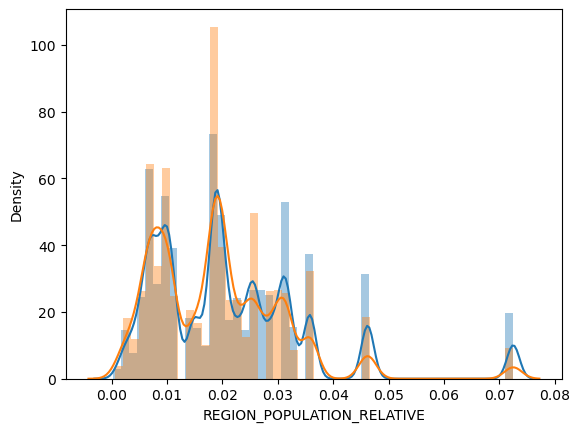

------------------------------------------------------------------------
Plot of DAYS_BIRTH


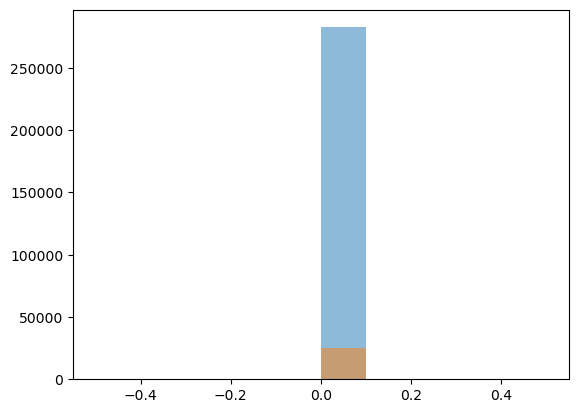

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
D:\anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

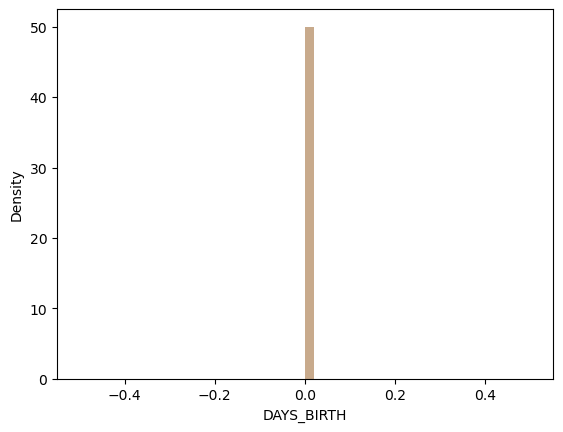

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


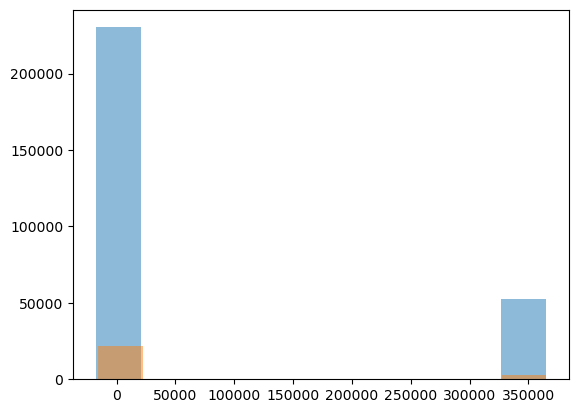

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

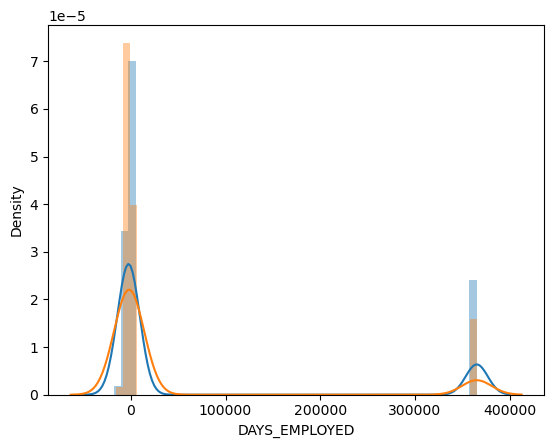

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


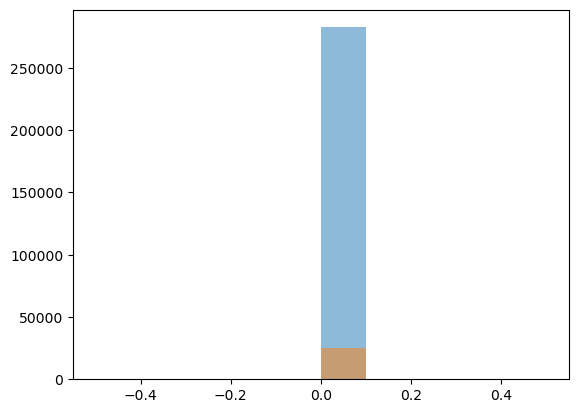

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
D:\anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

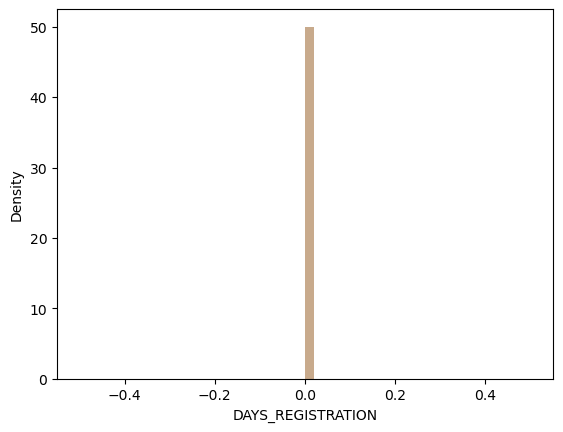

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


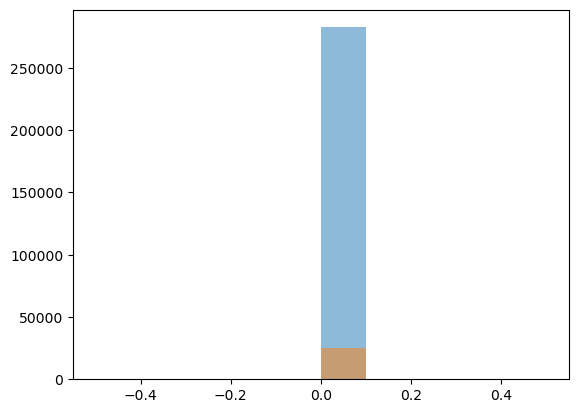

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
D:\anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

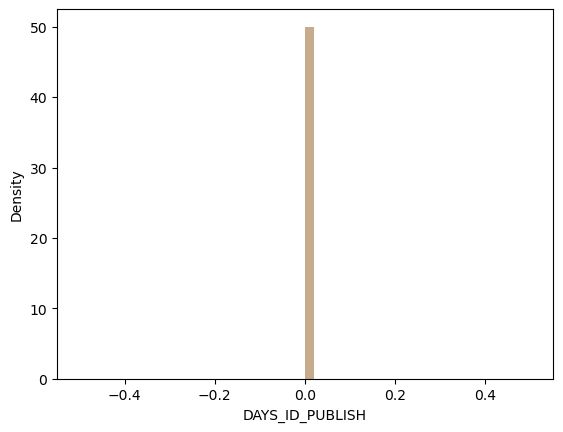

------------------------------------------------------------------------
Plot of FLAG_MOBIL


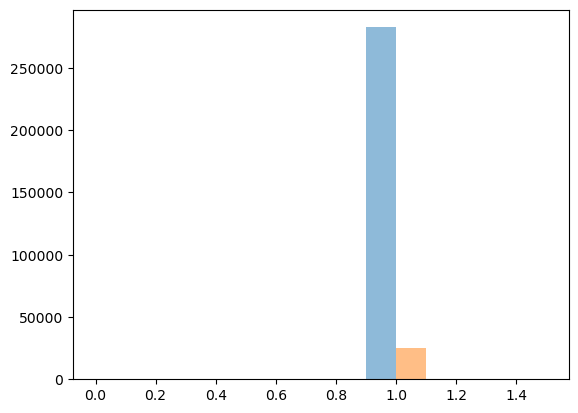

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

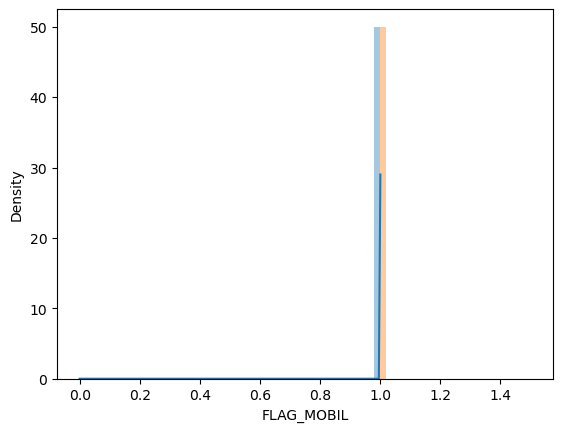

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


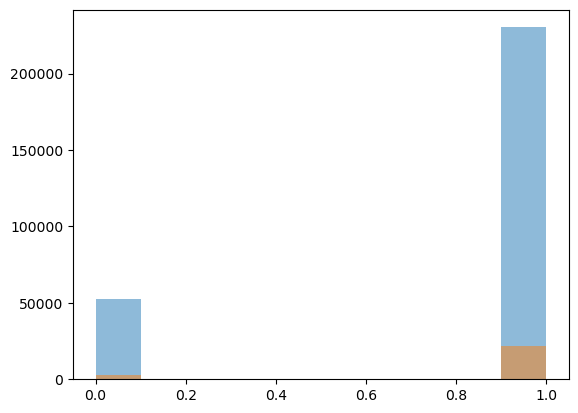

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

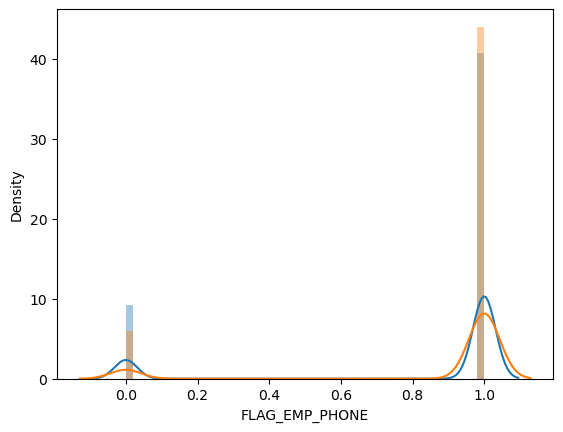

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


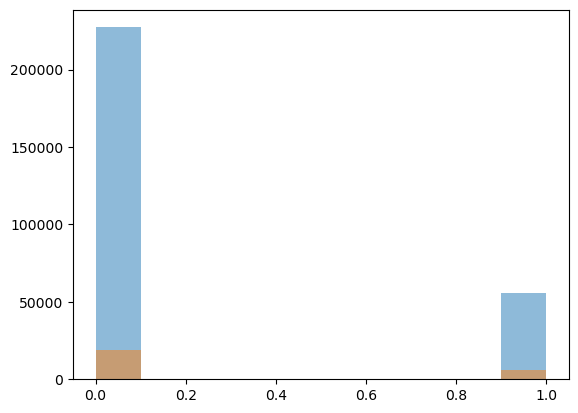

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

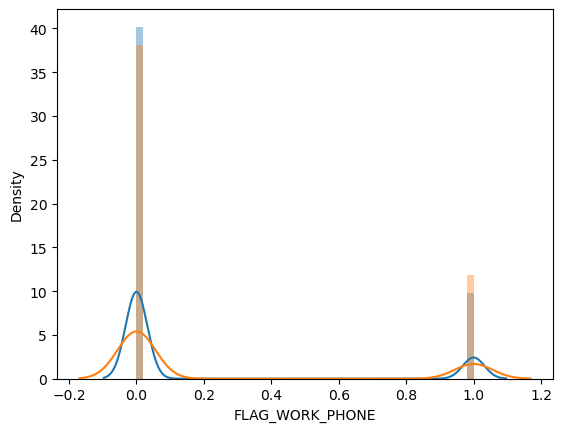

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


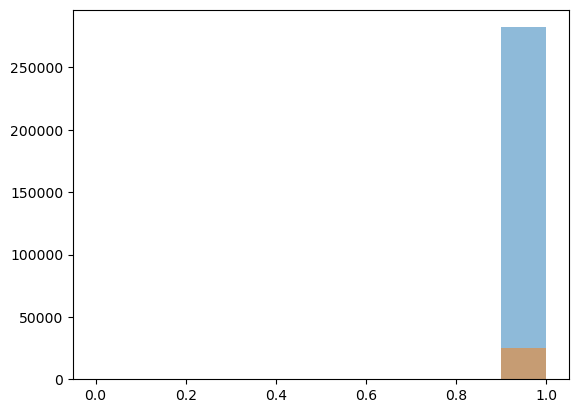

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

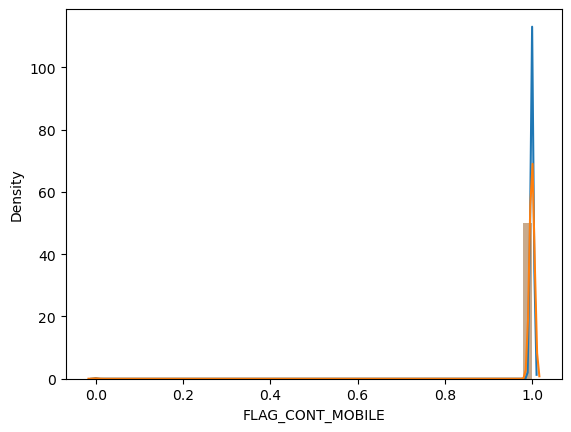

------------------------------------------------------------------------
Plot of FLAG_PHONE


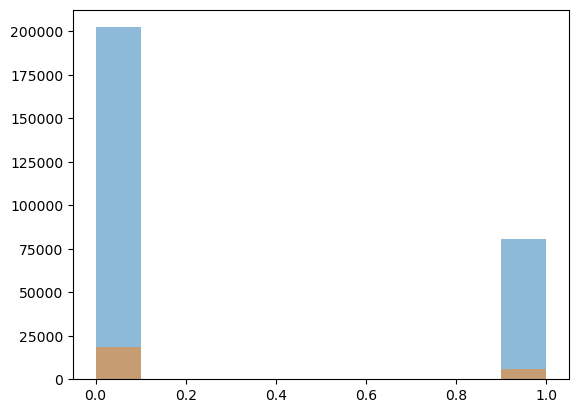

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

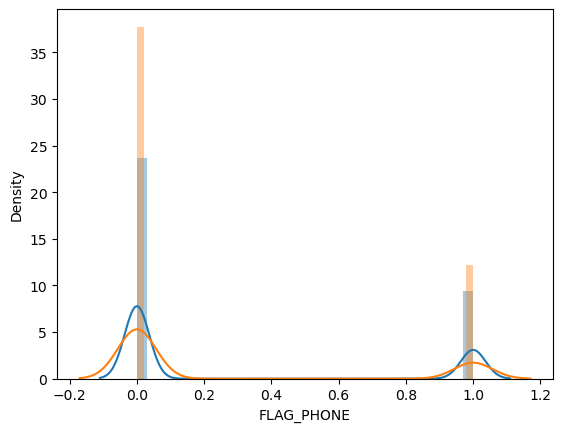

------------------------------------------------------------------------
Plot of FLAG_EMAIL


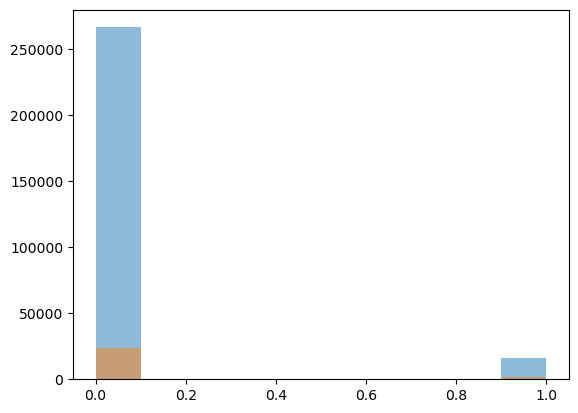

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

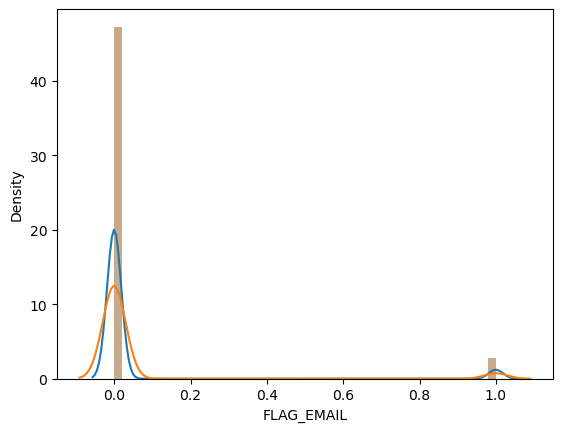

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


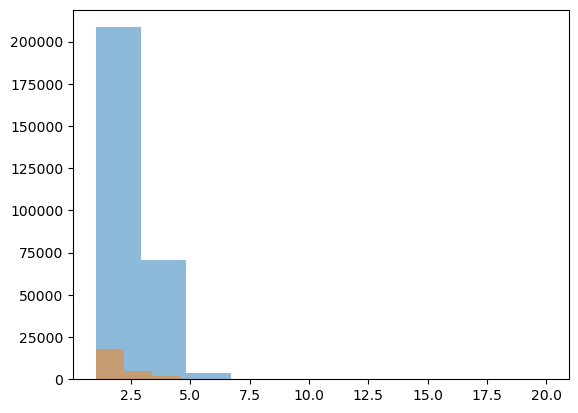

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

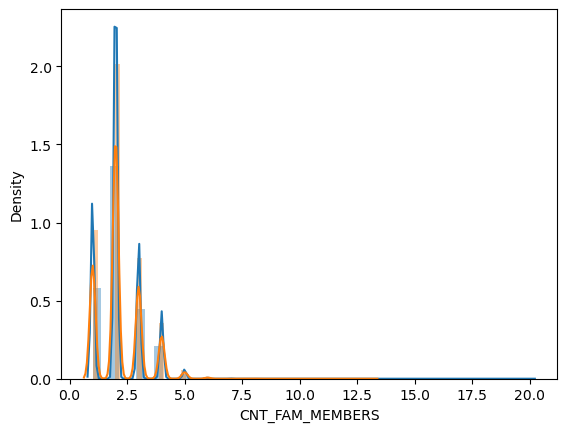

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


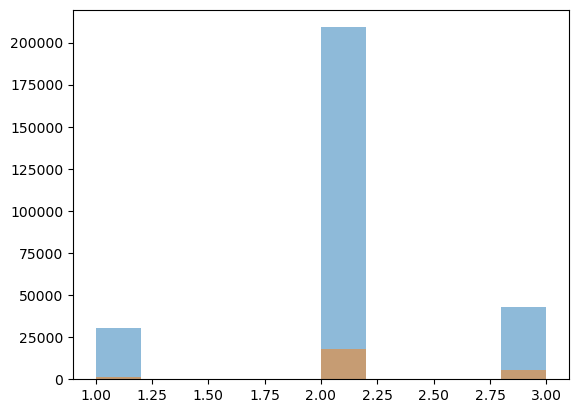

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

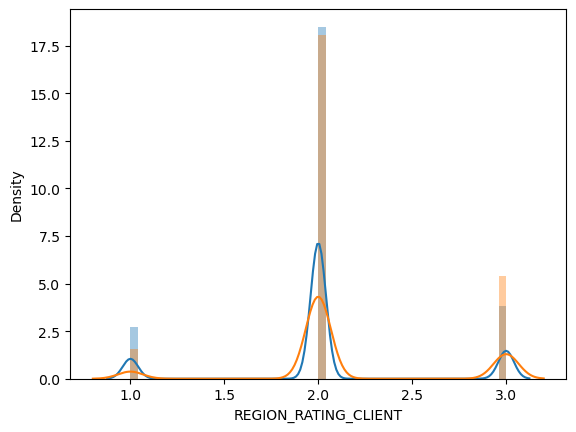

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


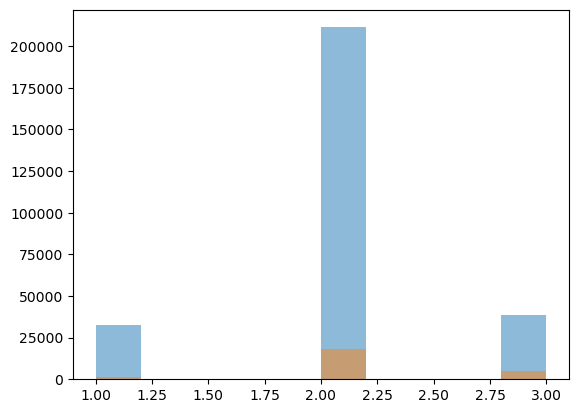

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

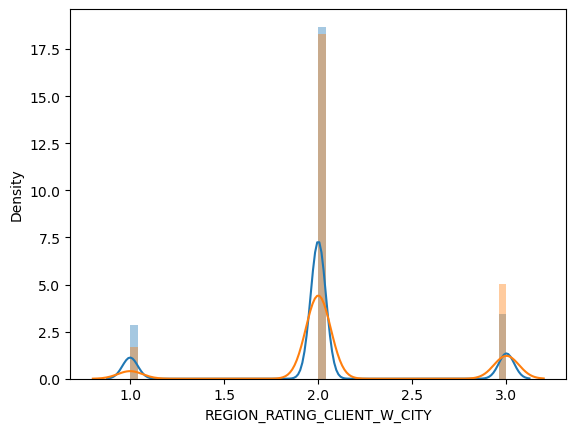

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


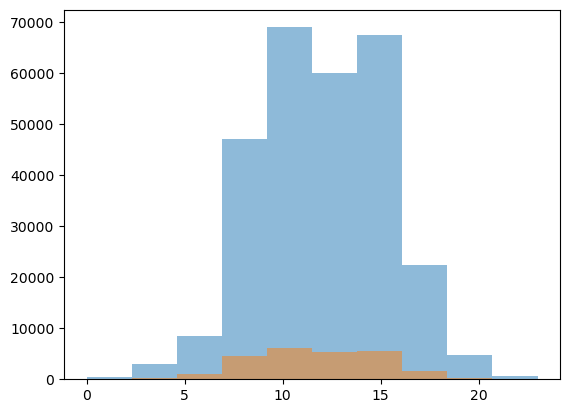

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

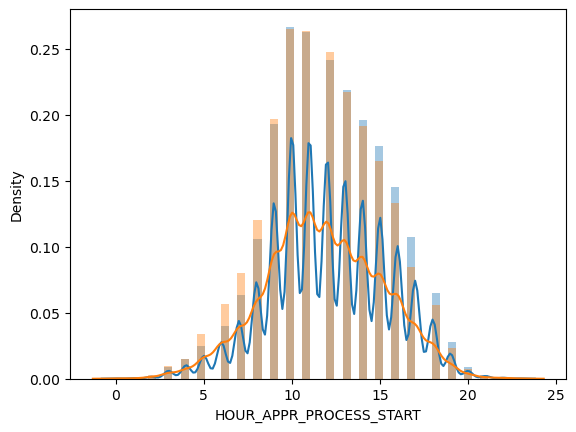

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


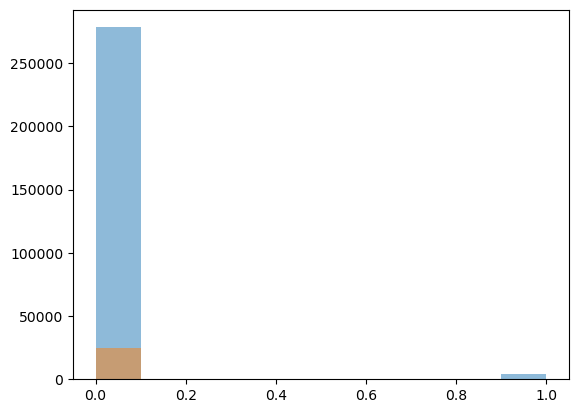

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

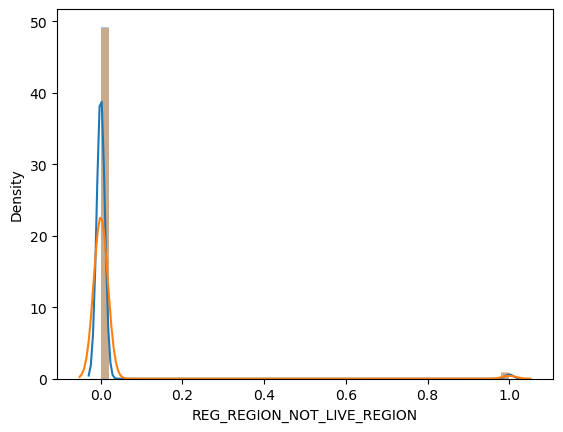

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


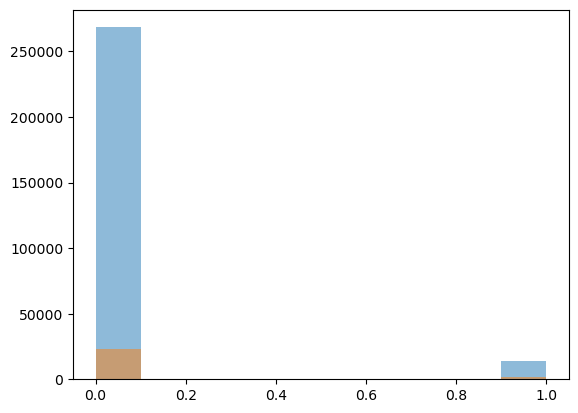

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

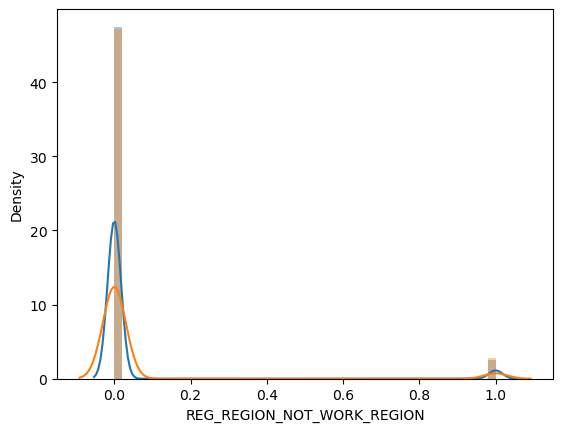

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


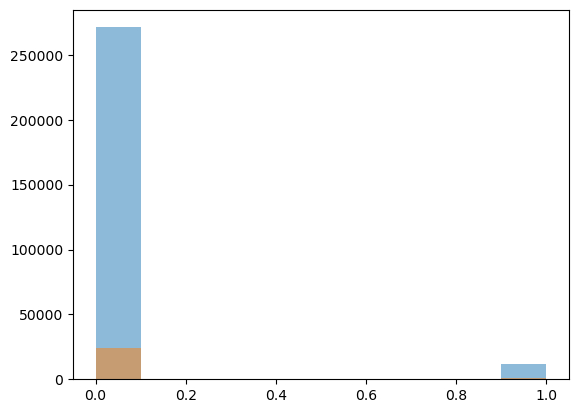

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

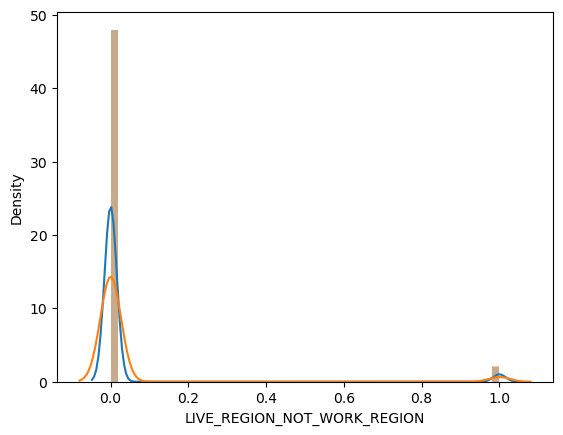

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


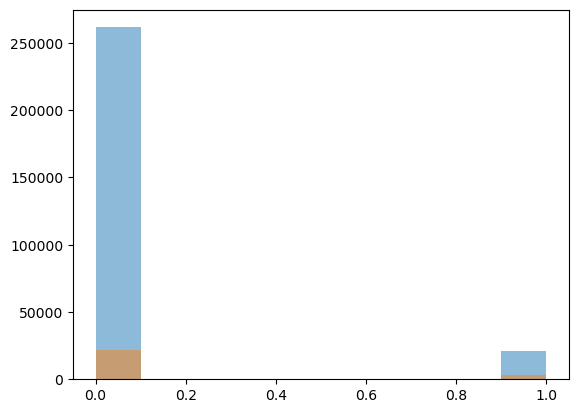

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

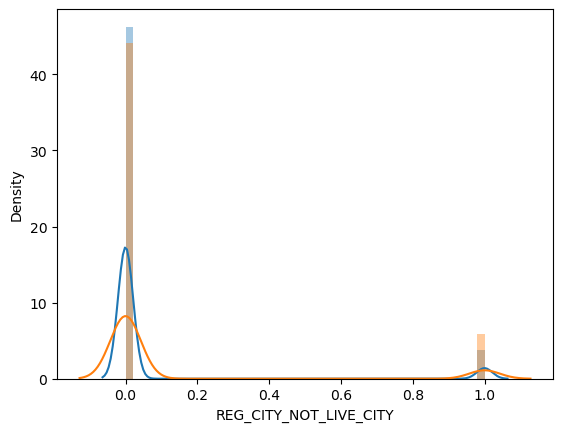

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


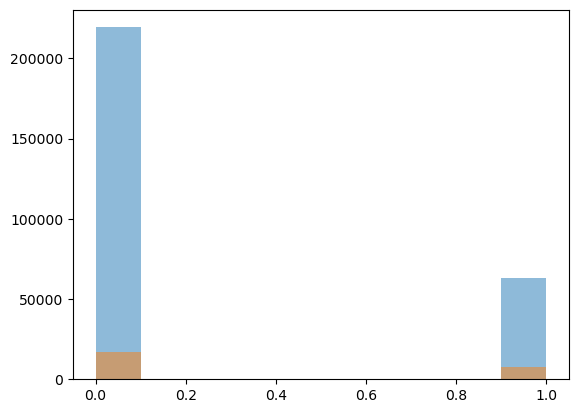

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

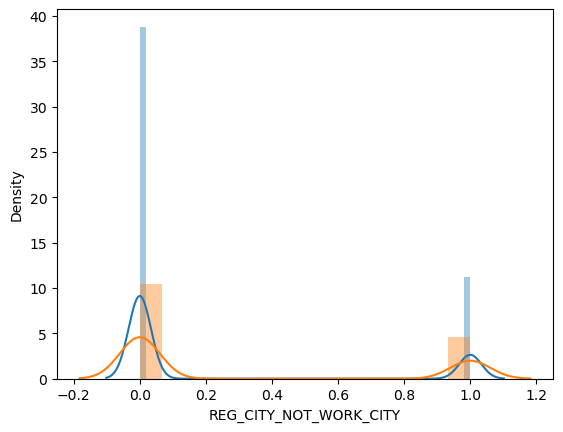

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


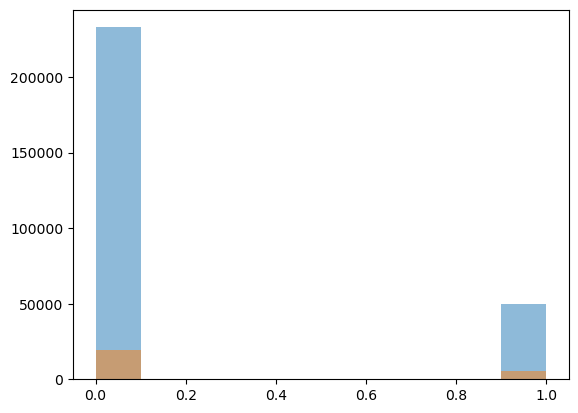

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

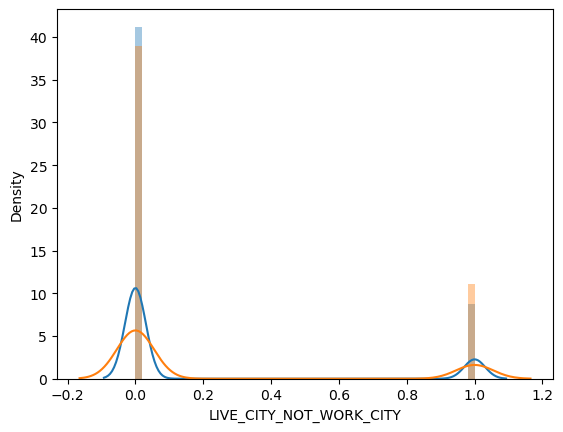

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


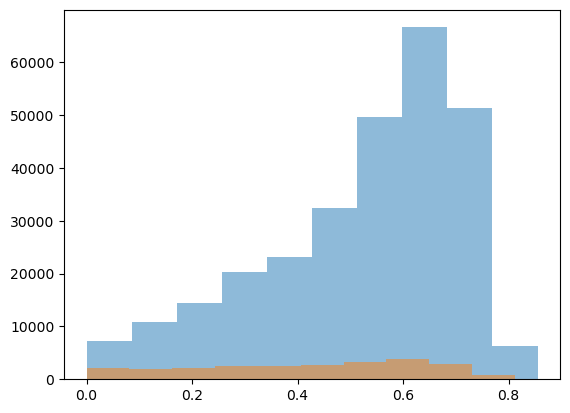

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

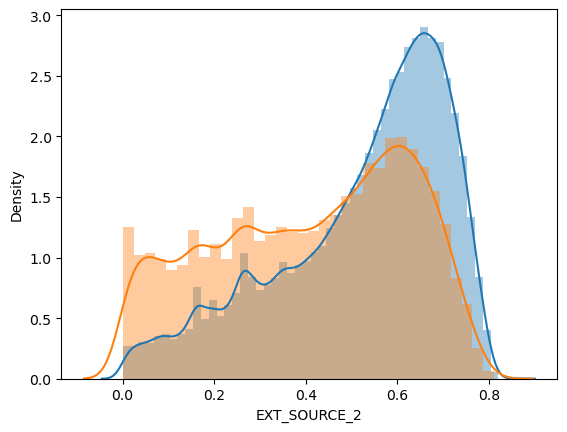

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


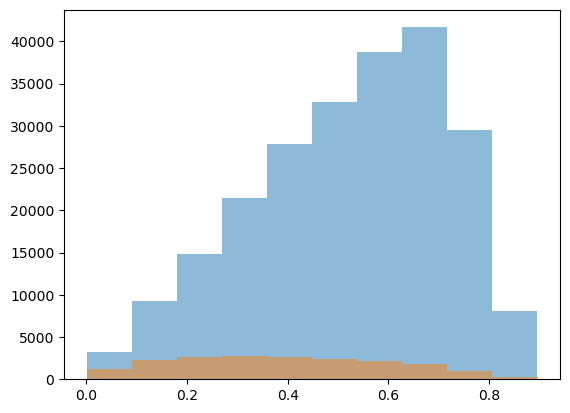

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

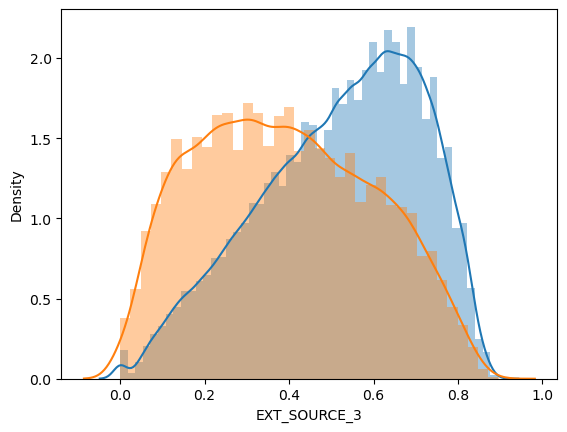

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


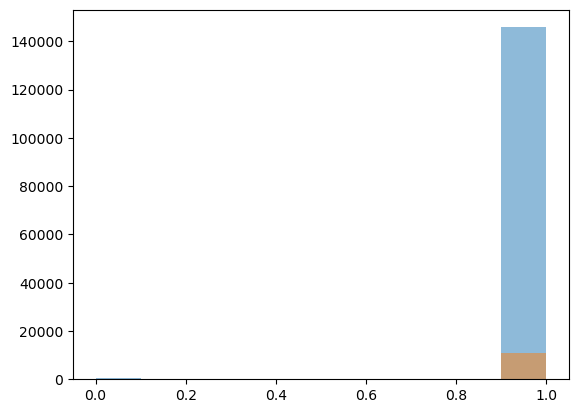

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

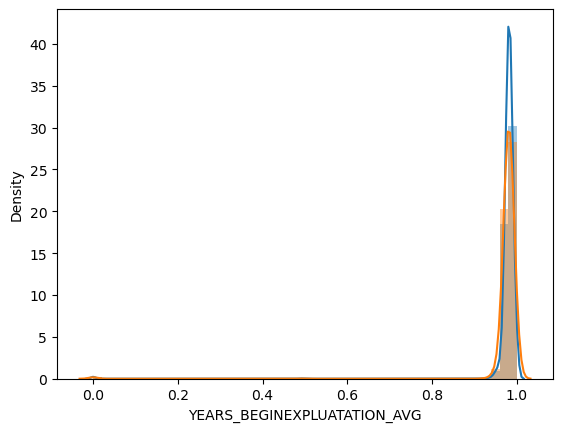

------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


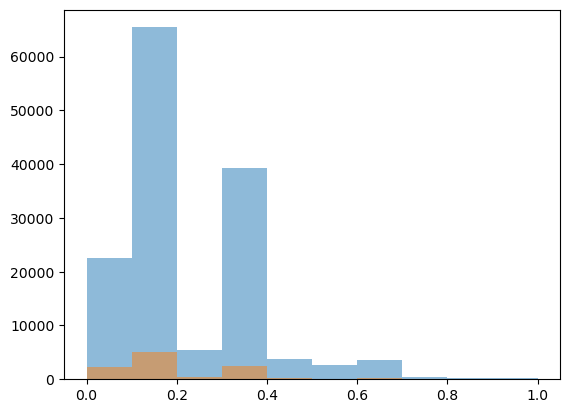

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

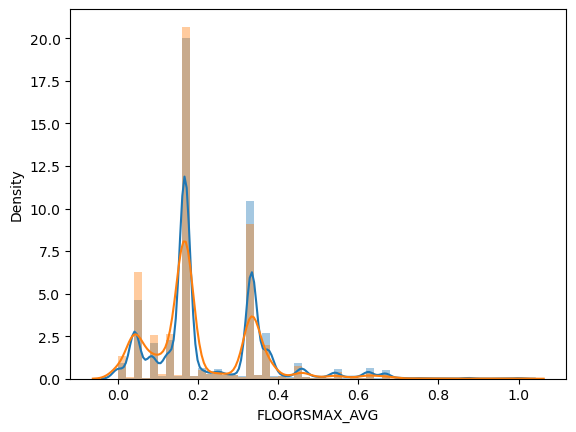

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


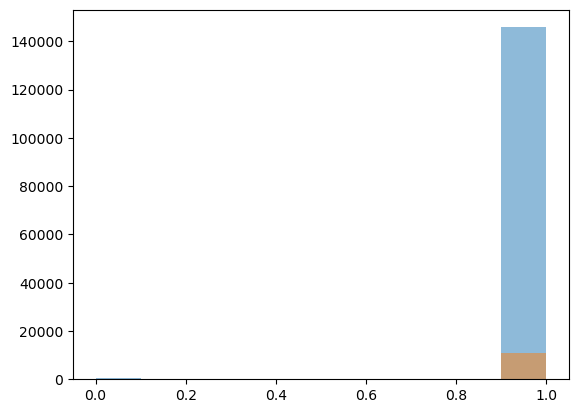

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

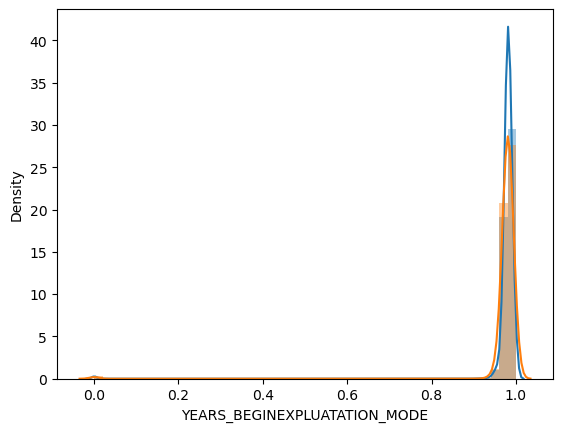

------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


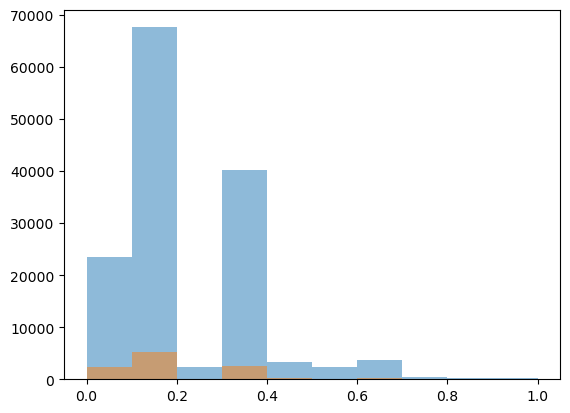

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

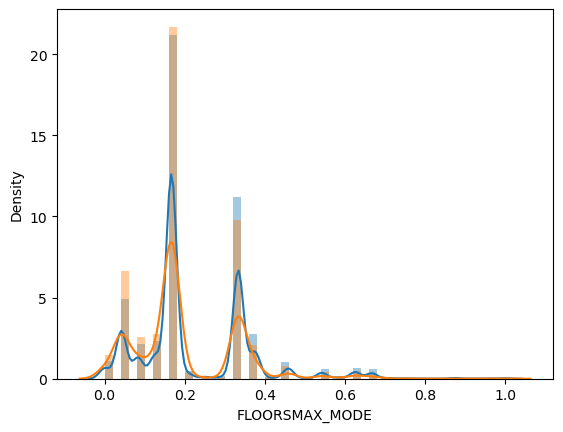

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


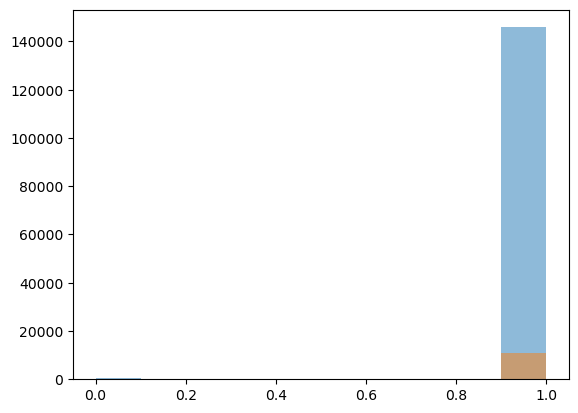

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

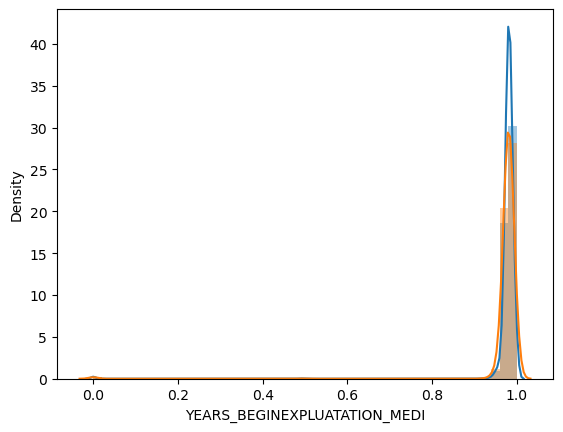

------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


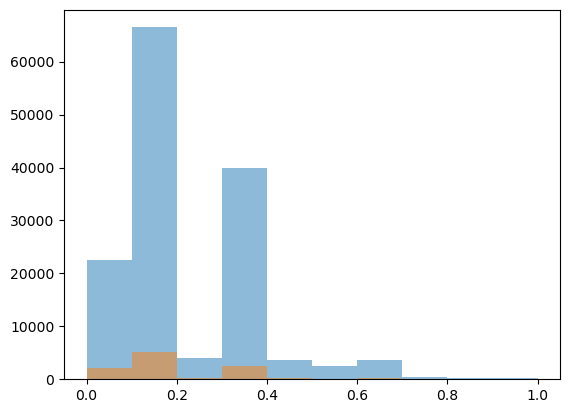

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

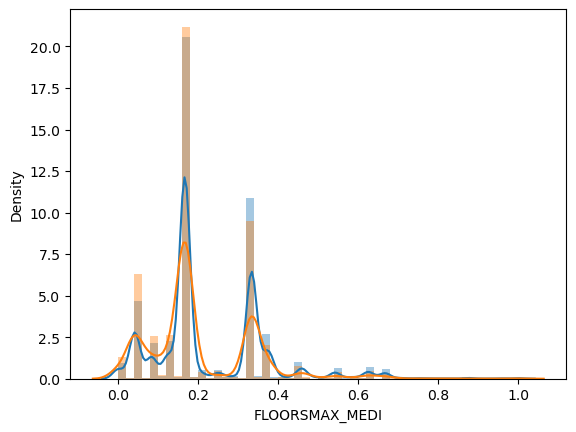

------------------------------------------------------------------------
Plot of TOTALAREA_MODE


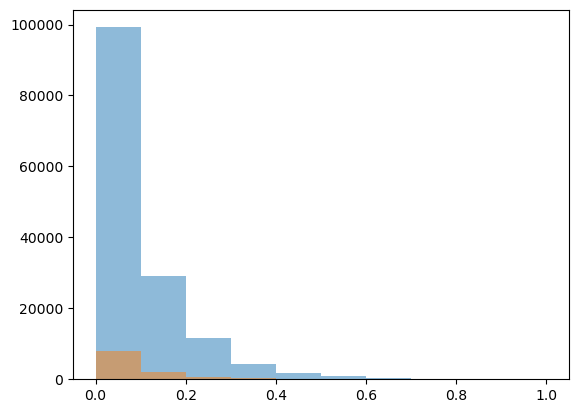

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

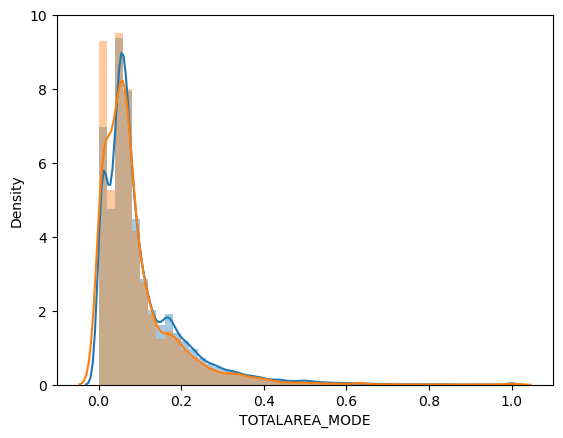

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


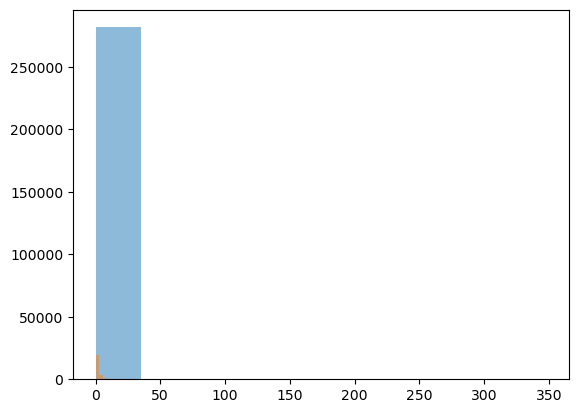

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

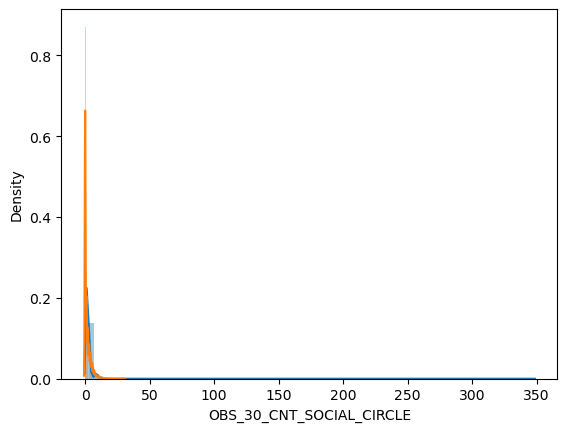

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


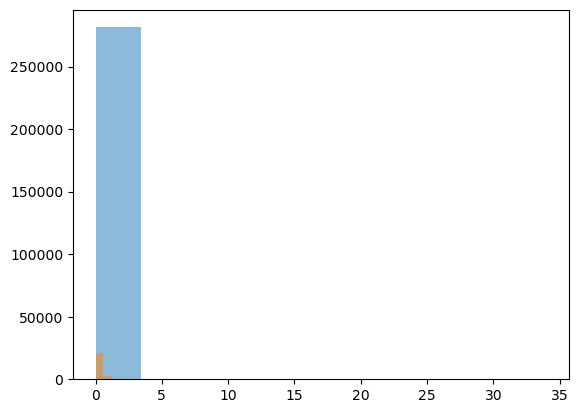

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

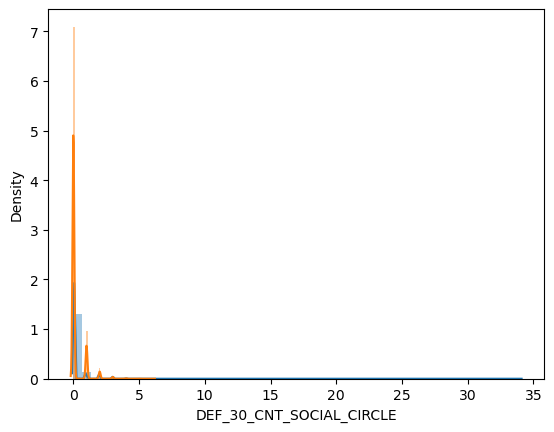

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


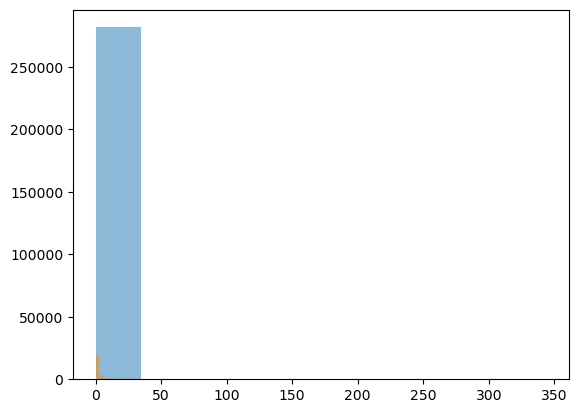

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

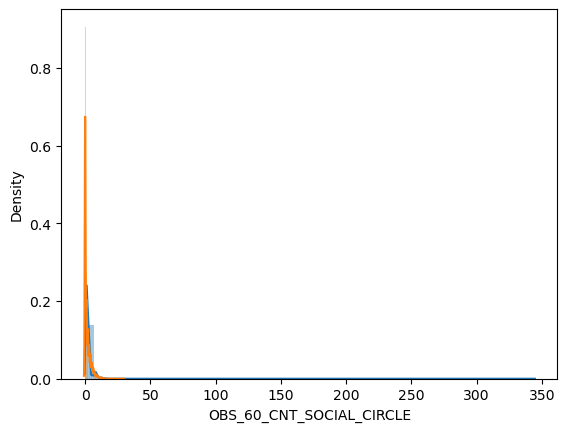

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


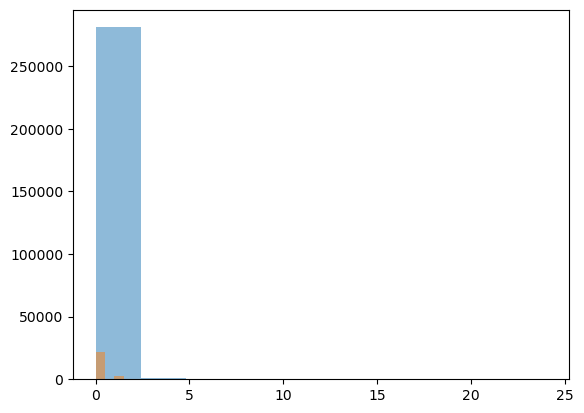

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

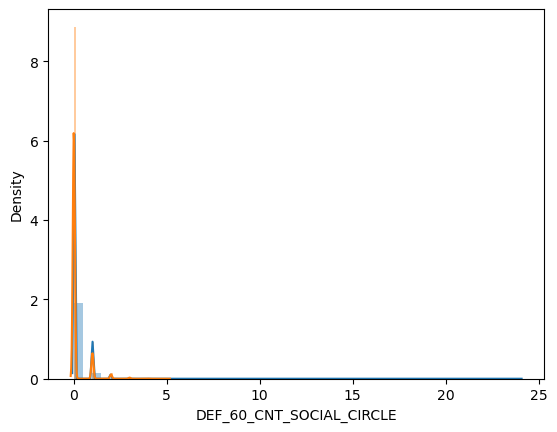

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


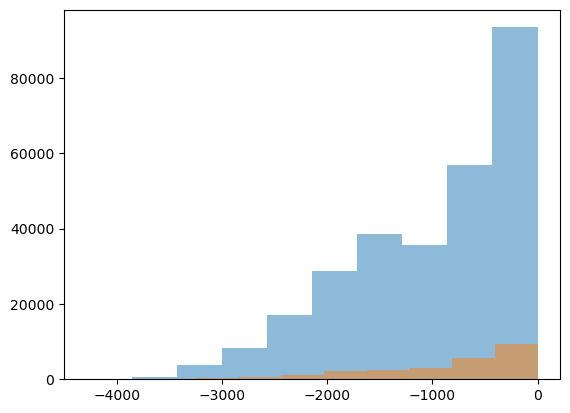

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

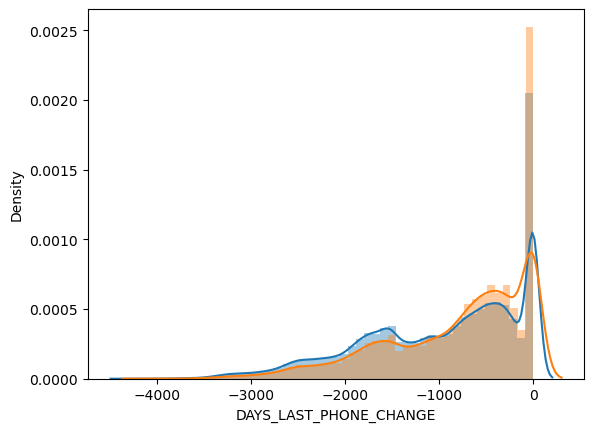

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


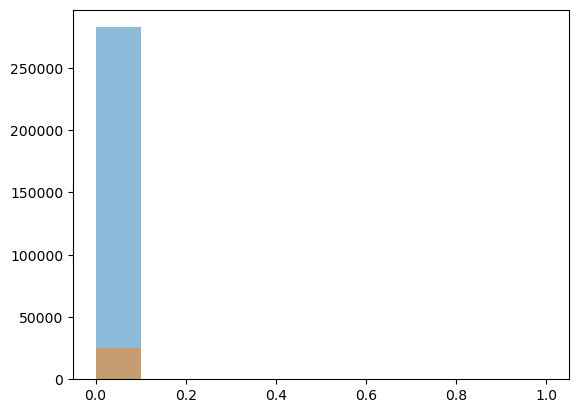

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

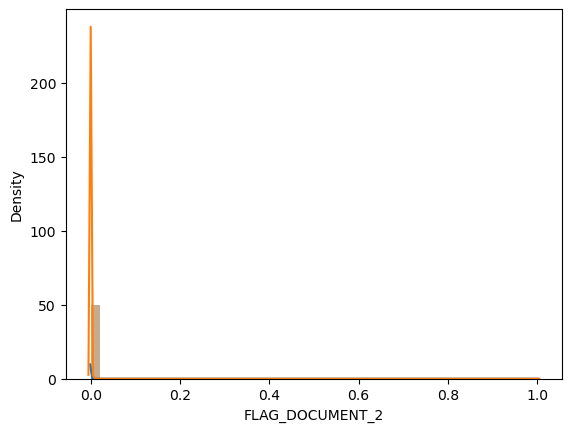

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


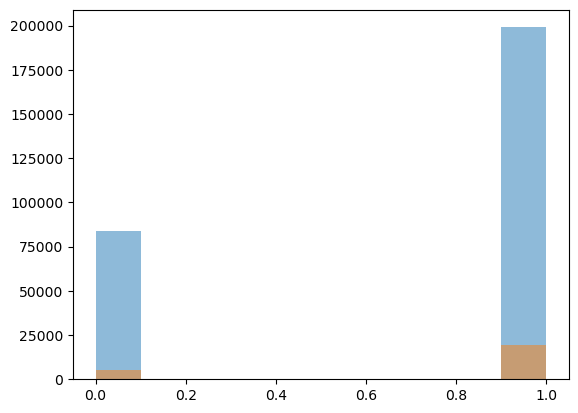

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

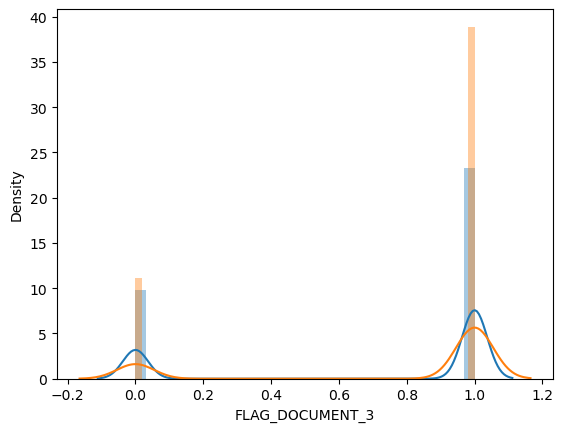

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


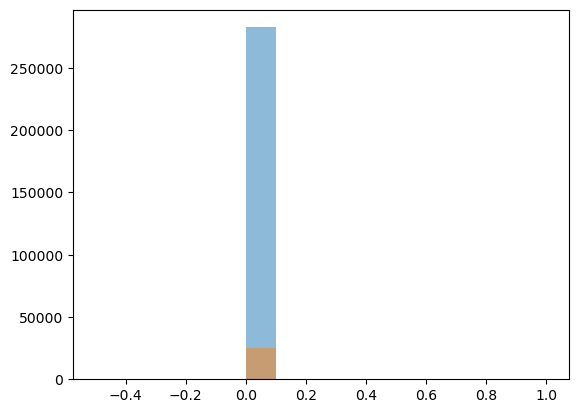

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

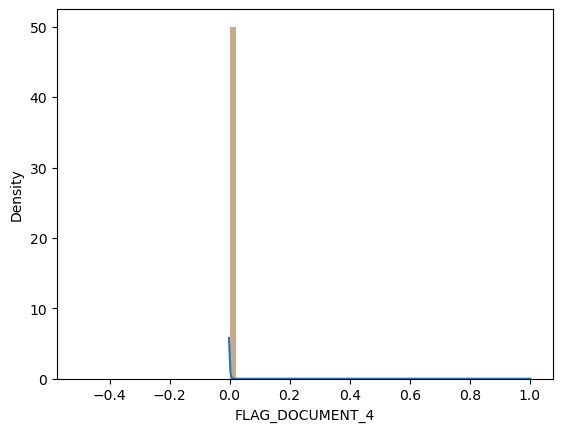

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


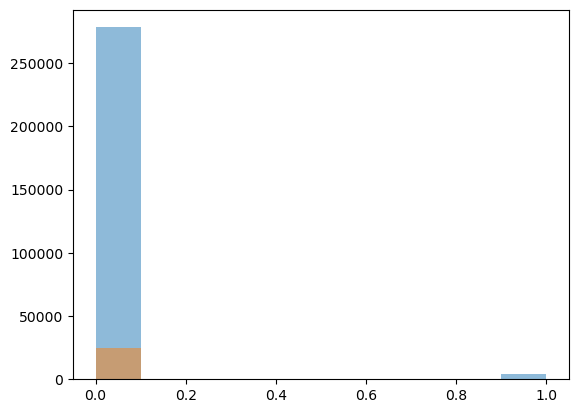

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

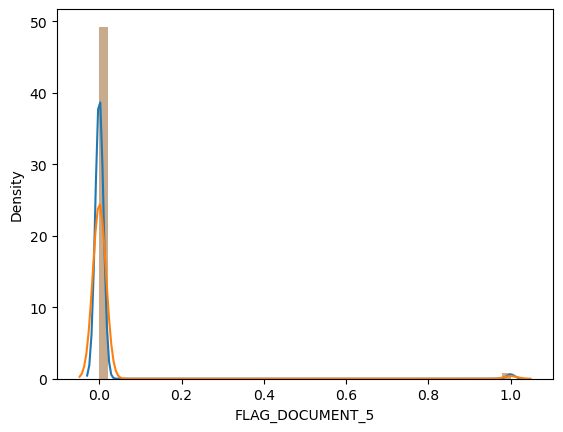

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


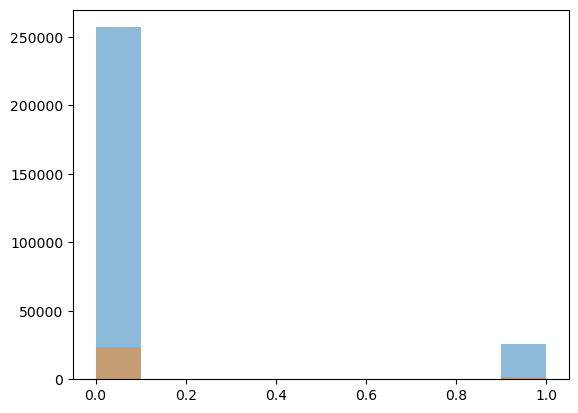

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

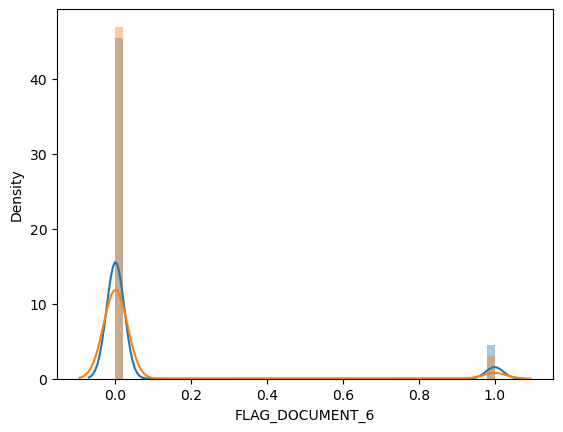

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


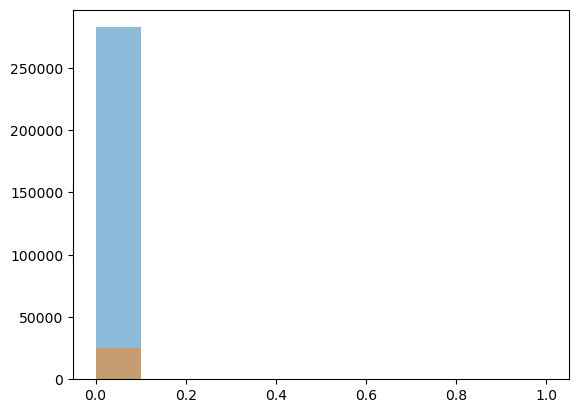

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

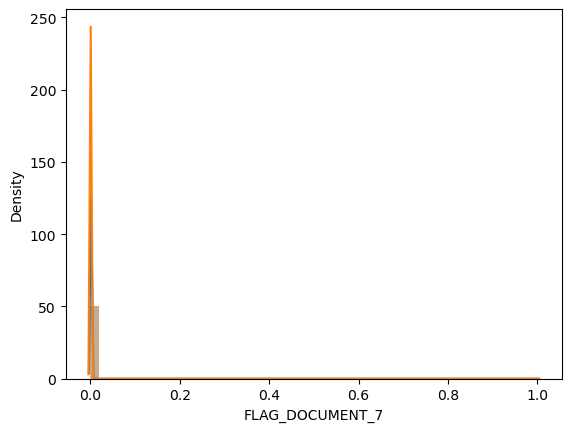

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


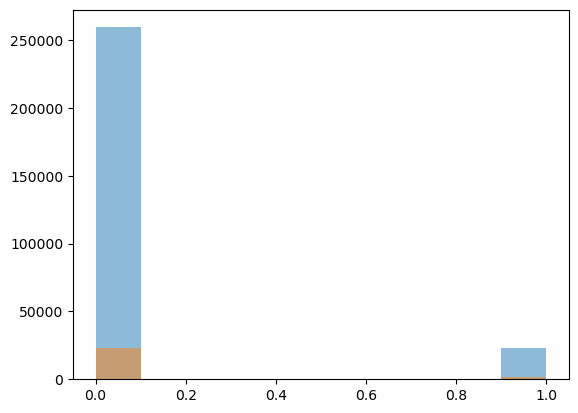

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

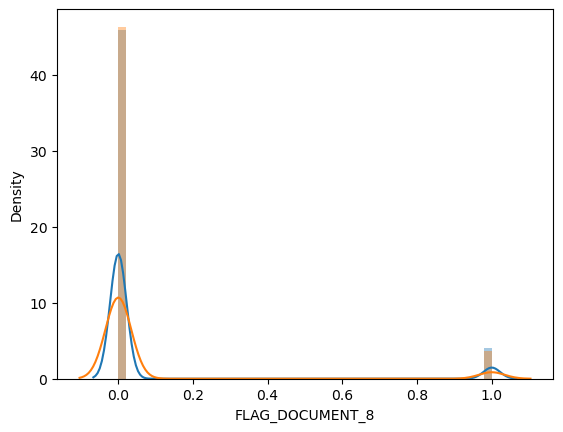

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


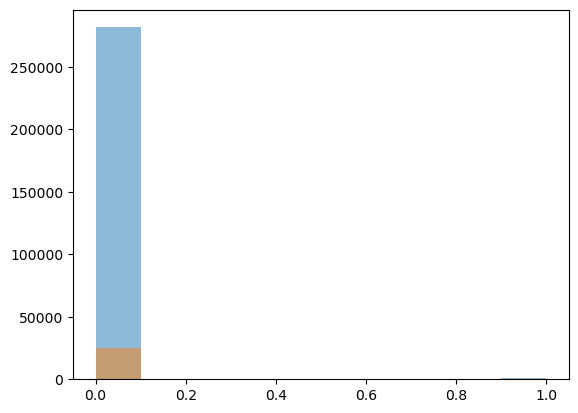

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

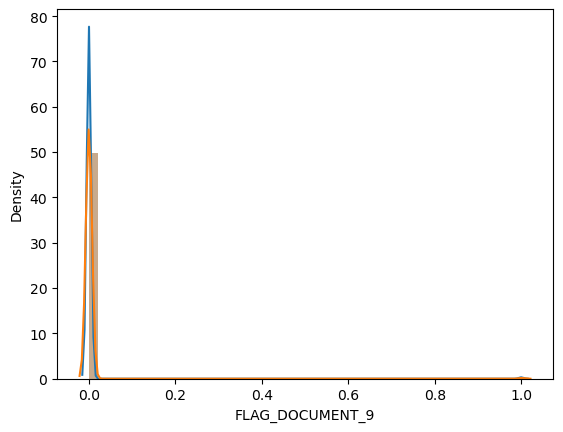

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


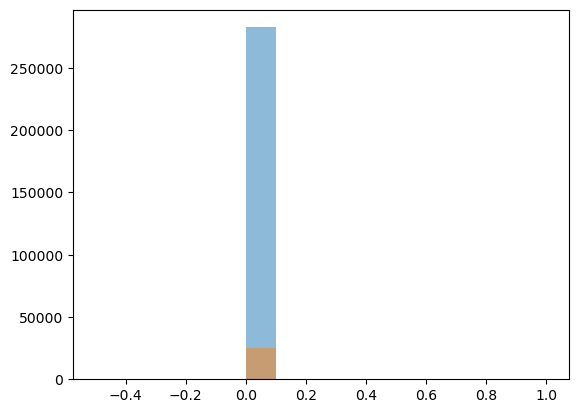

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

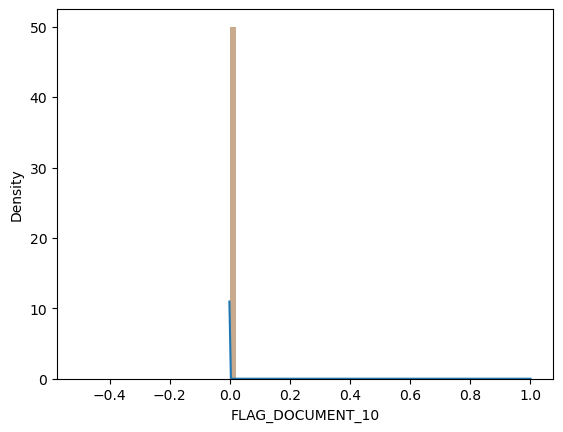

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


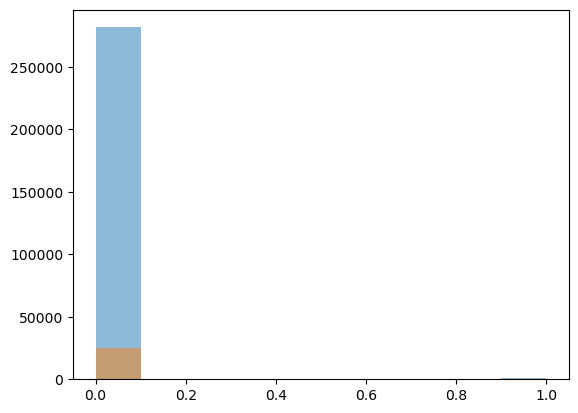

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

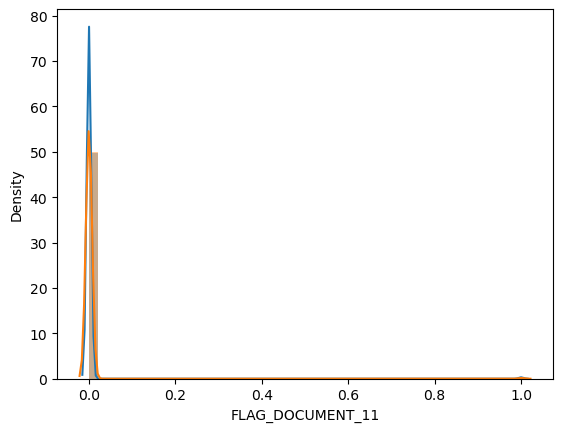

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


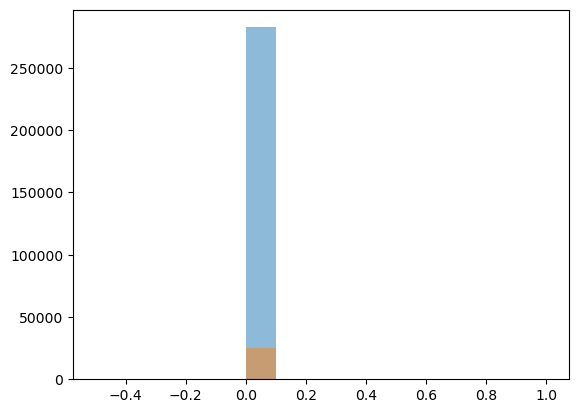

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

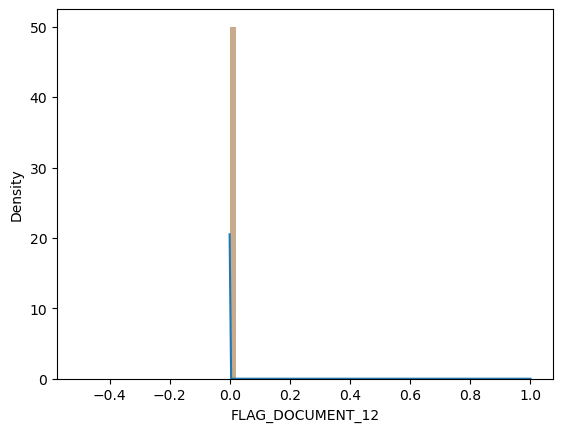

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


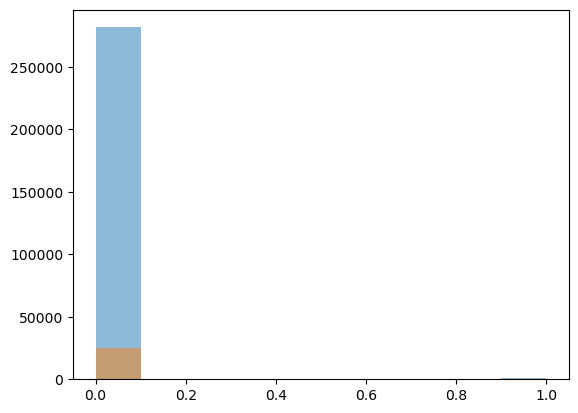

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

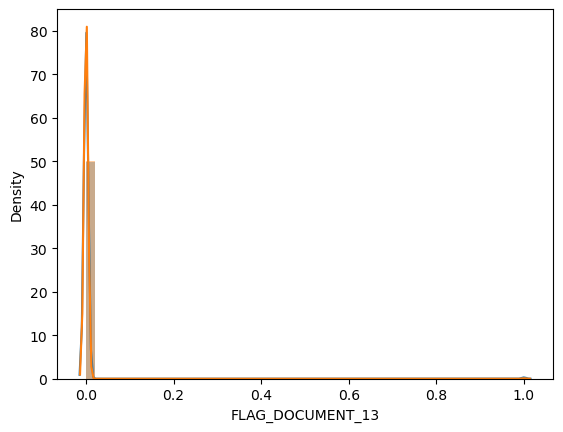

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


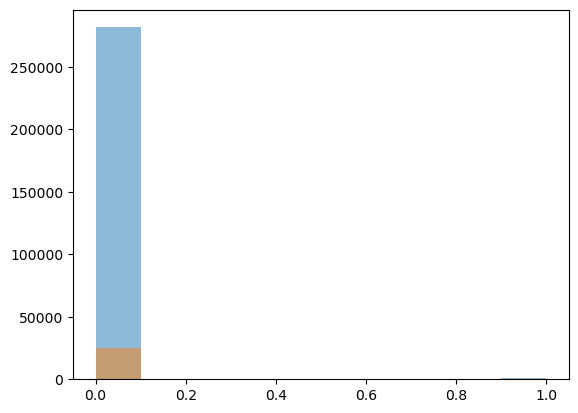

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

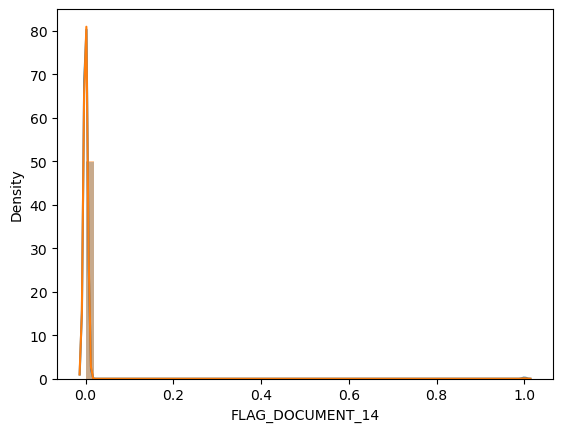

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


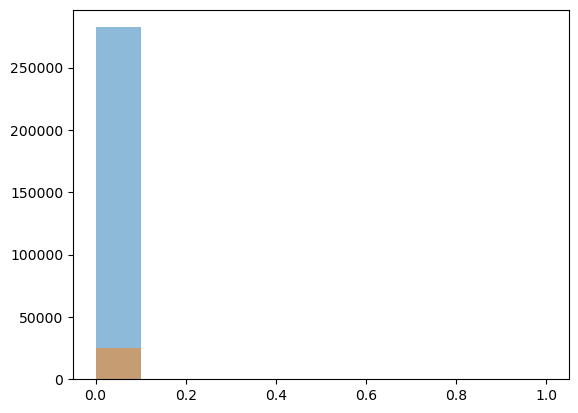

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

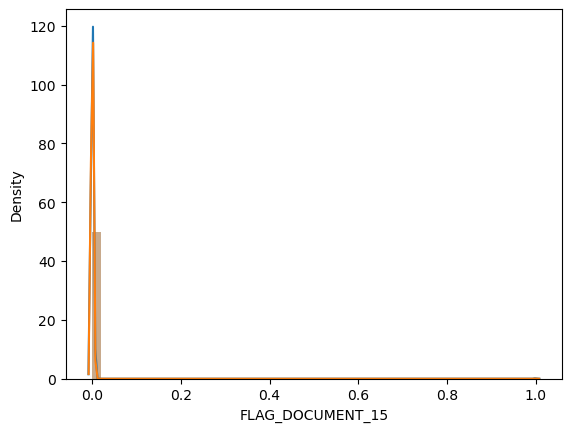

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


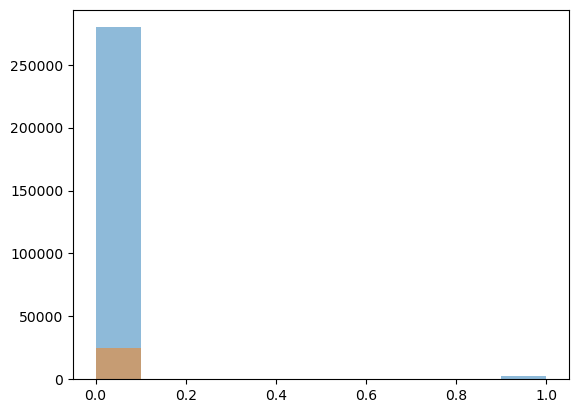

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

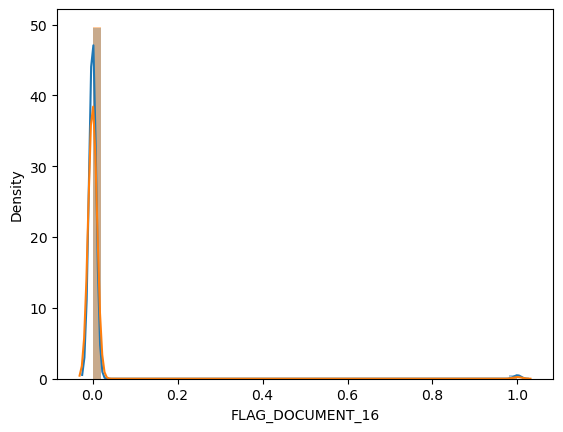

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


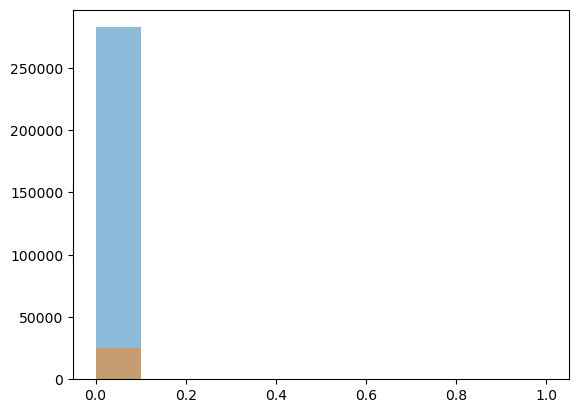

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

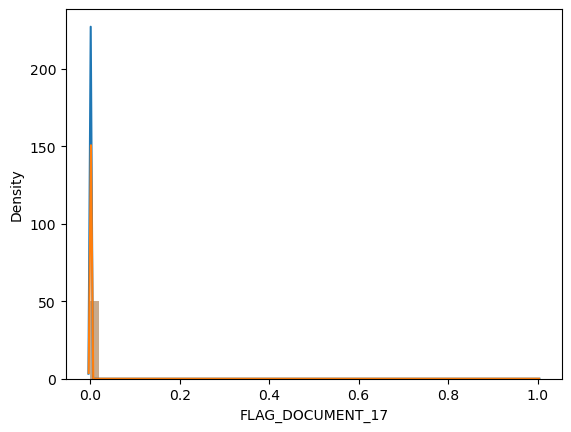

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


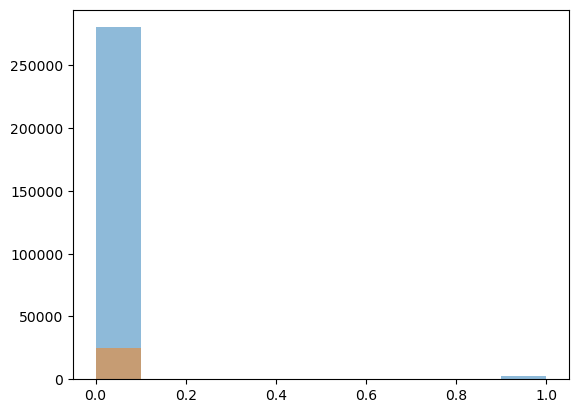

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

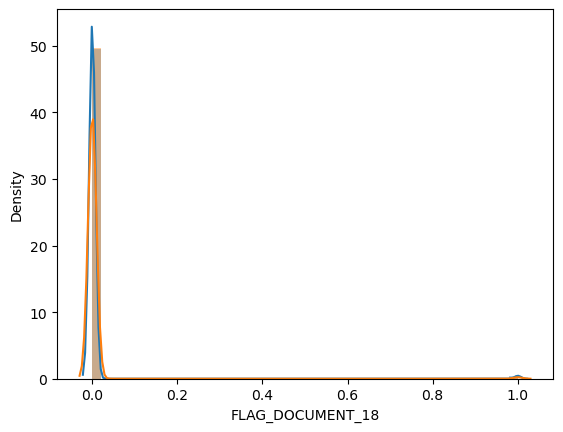

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


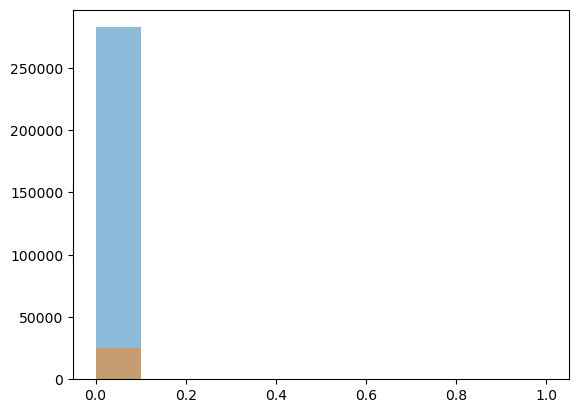

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

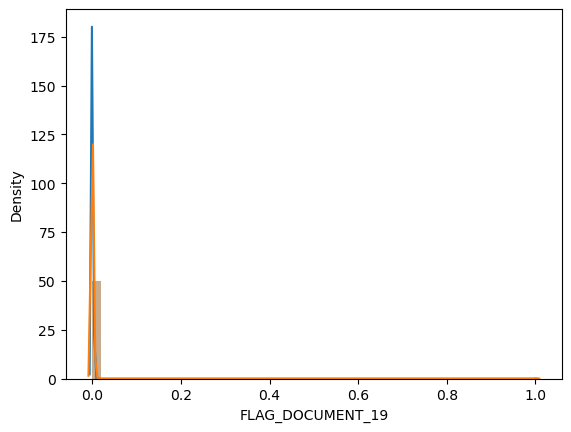

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


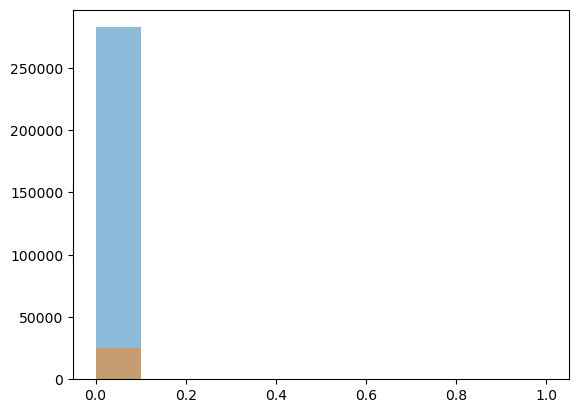

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

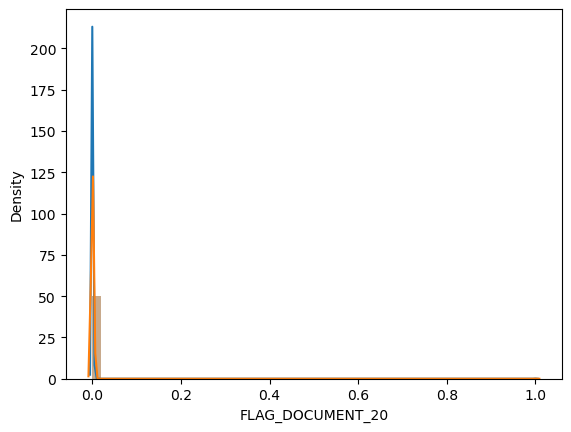

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


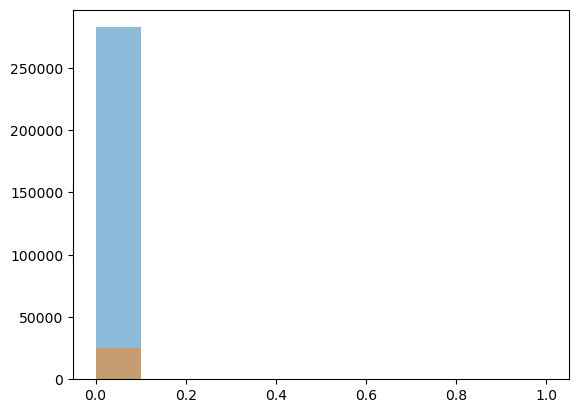

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

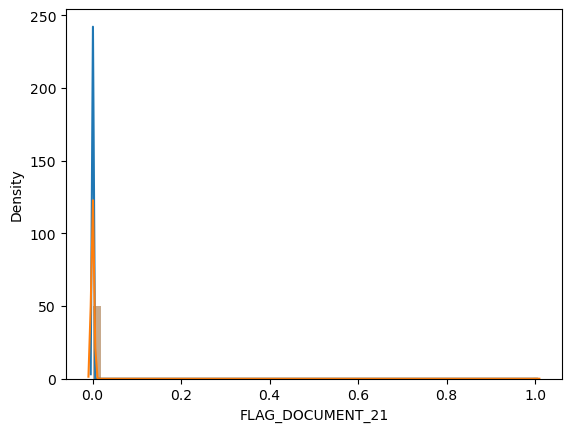

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


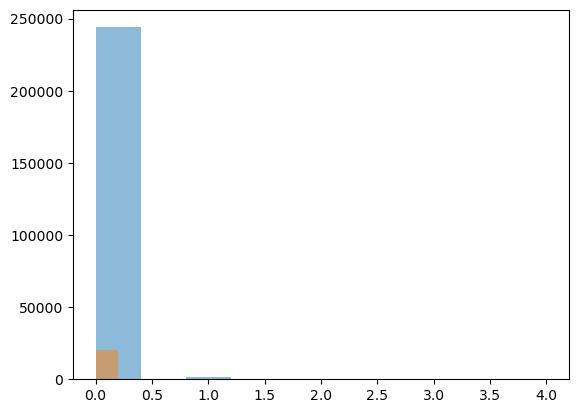

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

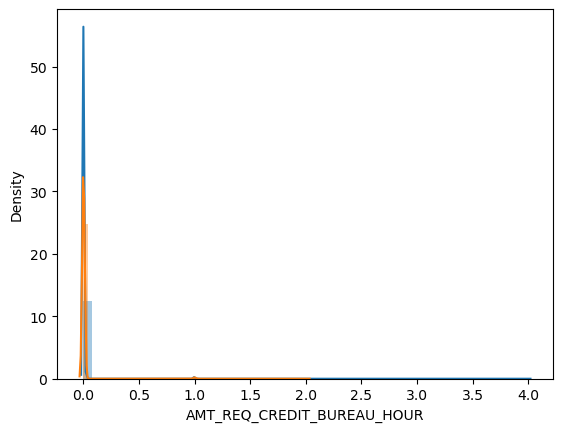

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


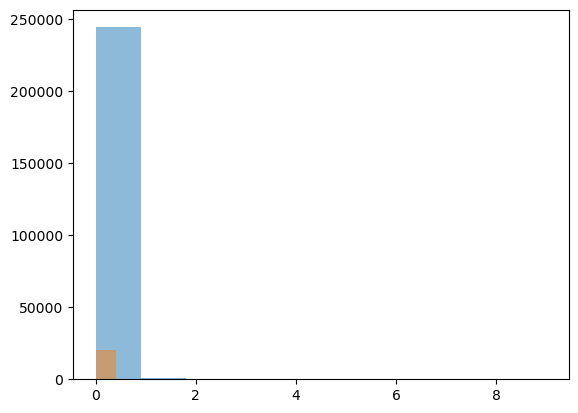

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

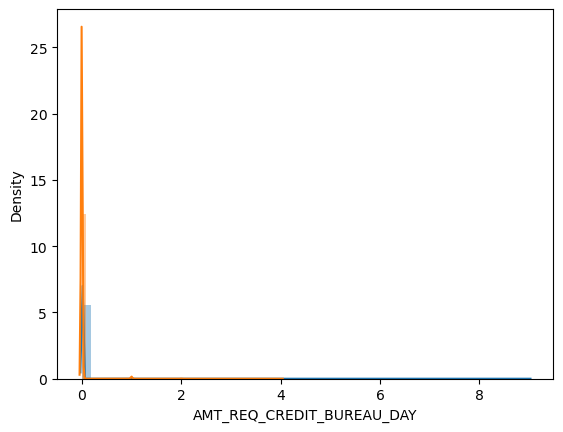

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


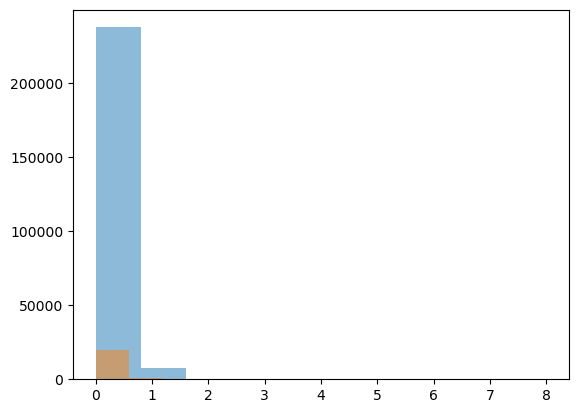

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

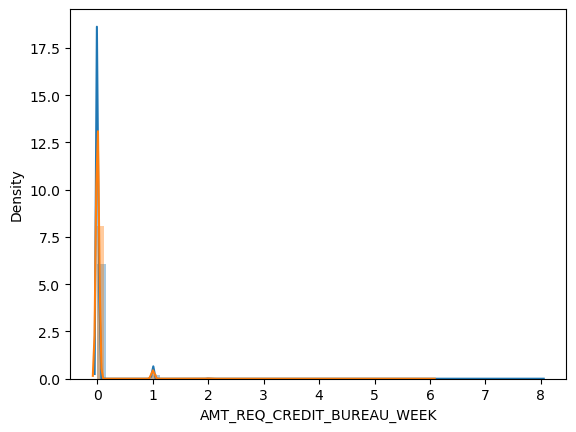

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


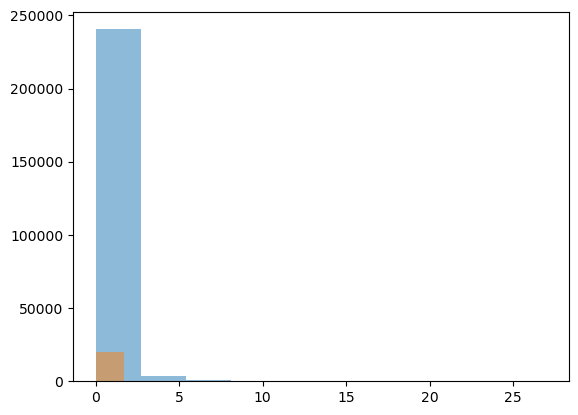

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

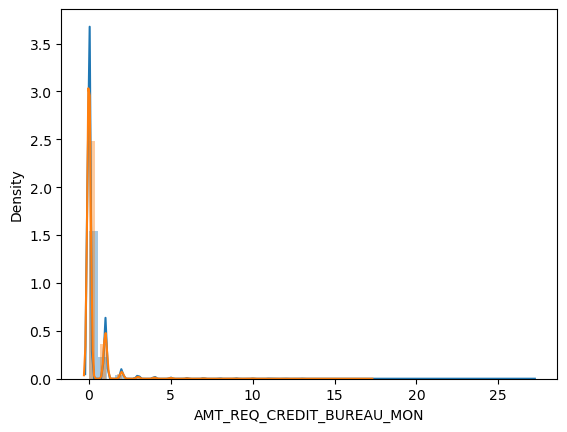

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


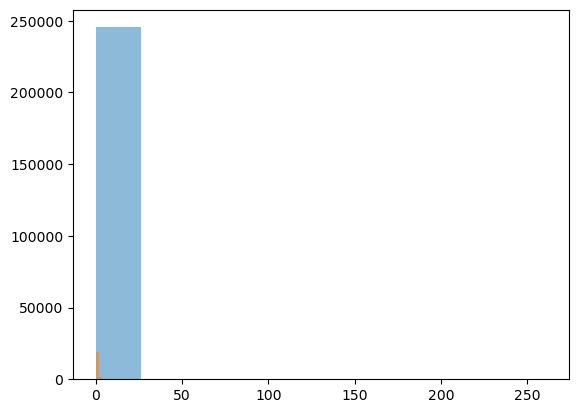

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

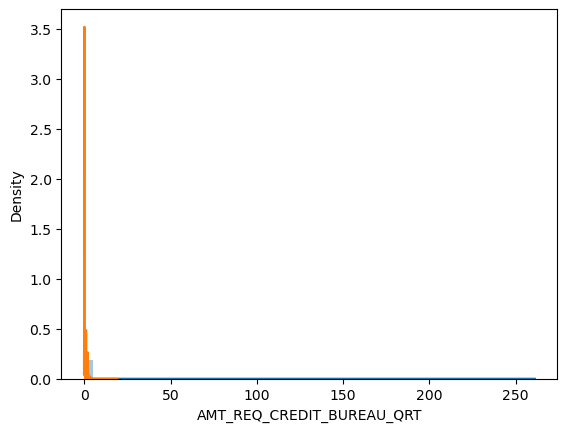

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


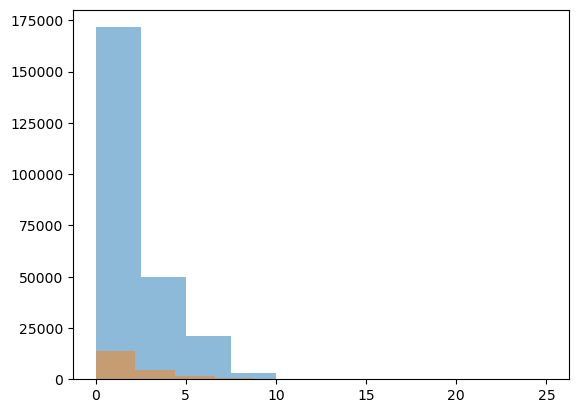

C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0[column].dropna(), label='0')
C:\Users\nithi\AppData\Local\Temp\ipykernel_8164\3606713638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[column].dropna(),  label='1')

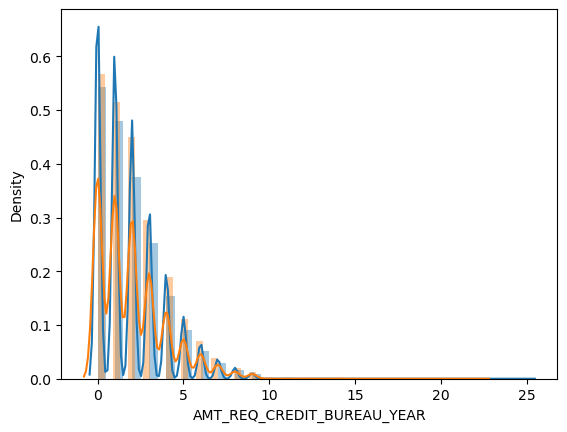

------------------------------------------------------------------------


In [145]:
for column in train_categorical:
    title = "Plot of "+column
    print(title)
    plt.hist(train0[column], alpha=0.5, label='0')
    plt.hist(train1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(train0[column].dropna(), label='0')
    sns.distplot(train1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are:
- AMT_CREDIT: 
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

## Reading previous application

In [147]:
previous_application=pd.read_csv("previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [148]:
previous_application.shape

(1670214, 37)

In [149]:
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [150]:
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

#### As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

### Let's merge dataframe: train and previous application based on SK_ID_PREV
After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once. 

In [151]:
previous_train = train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [152]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### The merged dataframe also has multiple values for SK_ID_CURR

In [153]:
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

In [155]:
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

### Segregating the dataset on Target=0 and Target=1

In [156]:
train_0=train.loc[train['TARGET']==0]
train_1=train.loc[train['TARGET']==1]

In [157]:
ptrain_0=previous_train[previous_train['TARGET']==0]
ptrain_1=previous_train[previous_train['TARGET']==1]

In [158]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

# Bivariate Analysis 

### Plotting NAME_EDUCATION_TYPE

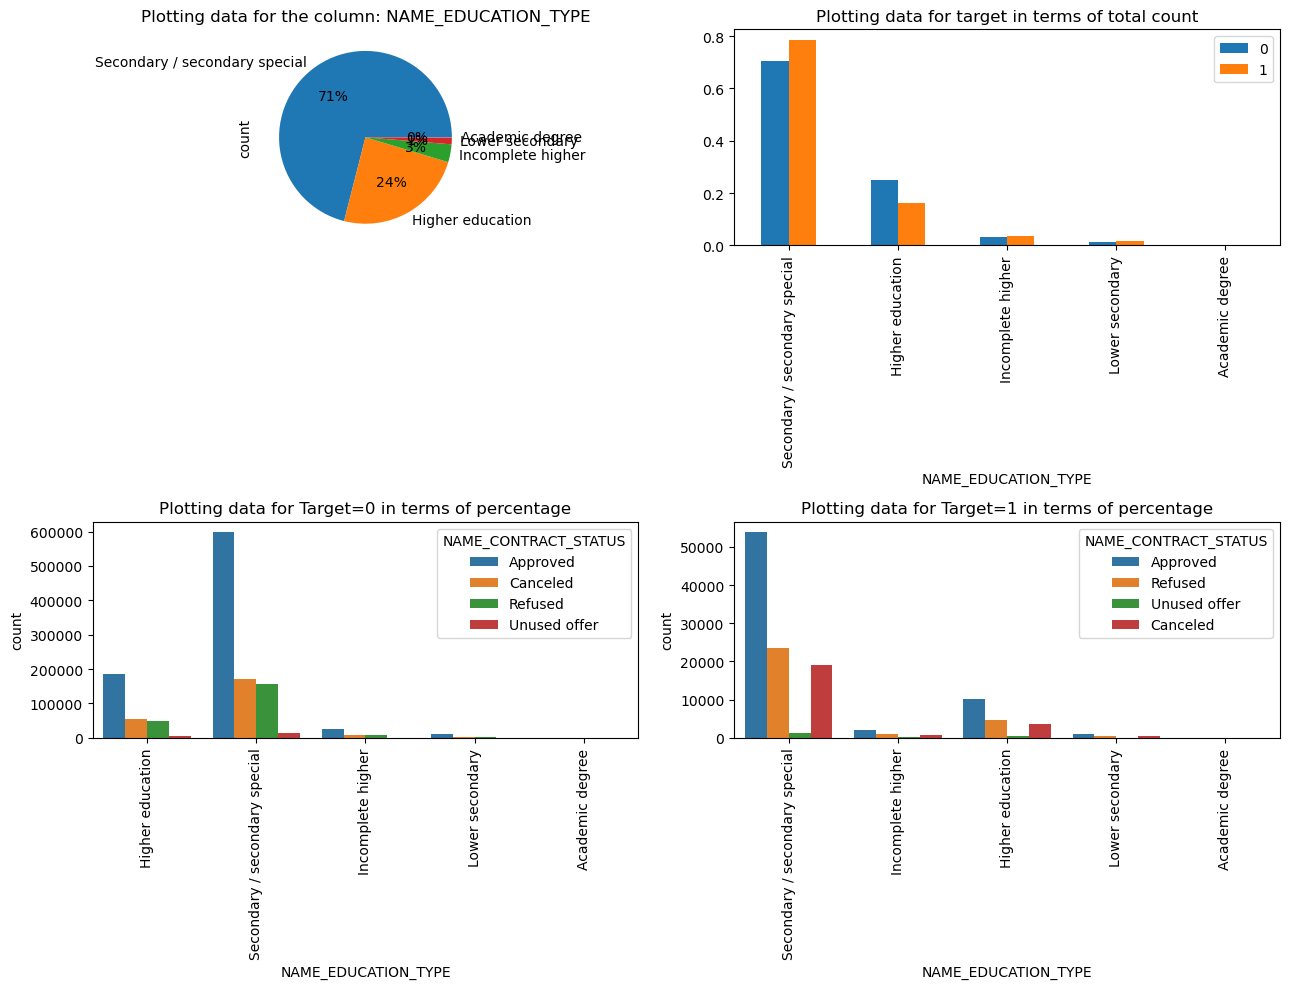

In [160]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')    

Observation: People tend to make more loan for 'Secondary special' and their loan is also approved. 

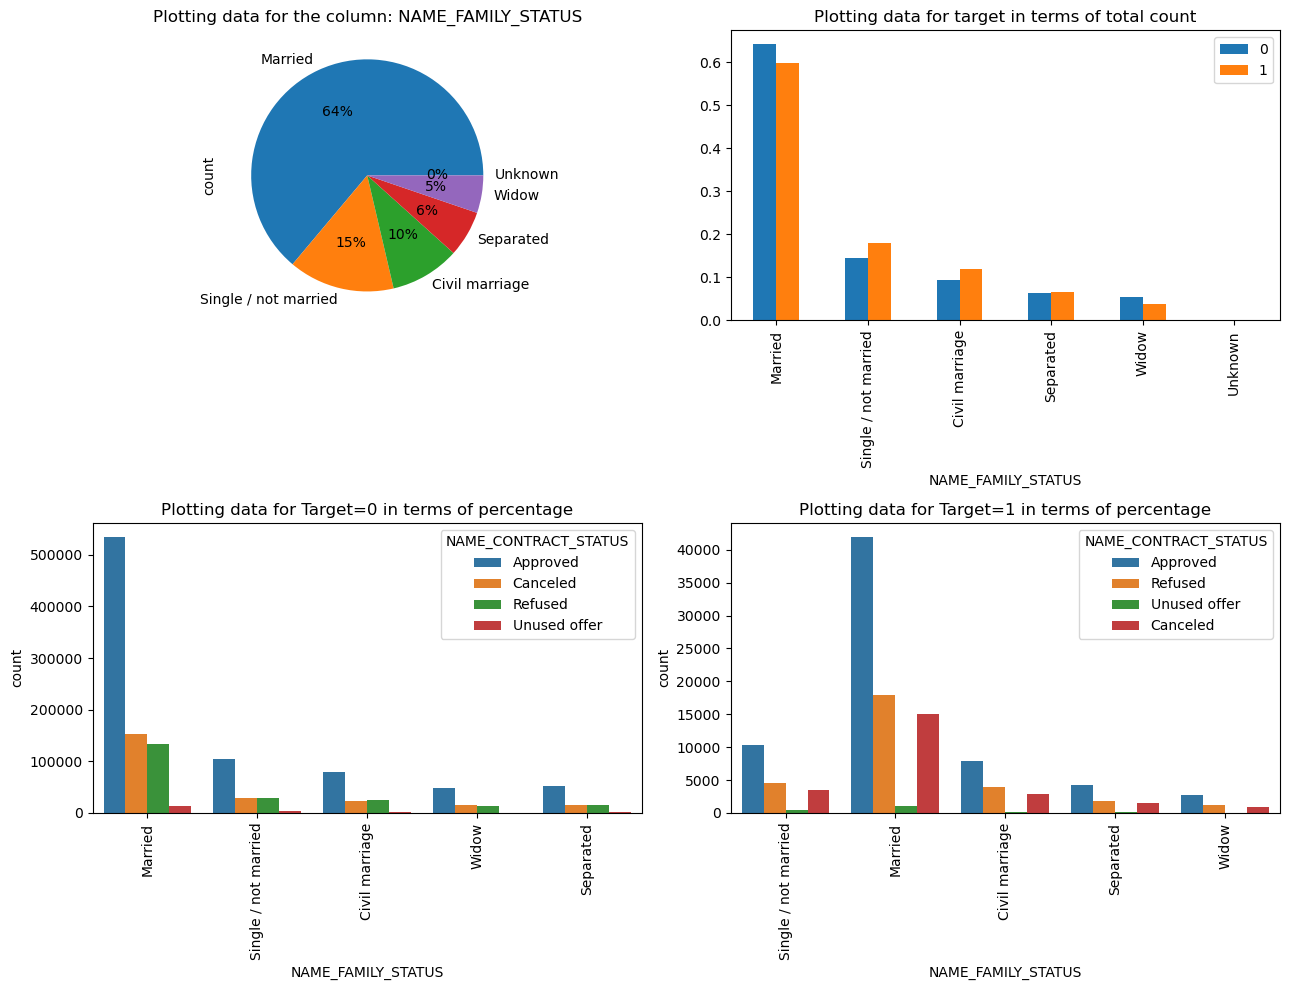

In [161]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles. 

### Plotting: NAME_HOUSING_TYPE

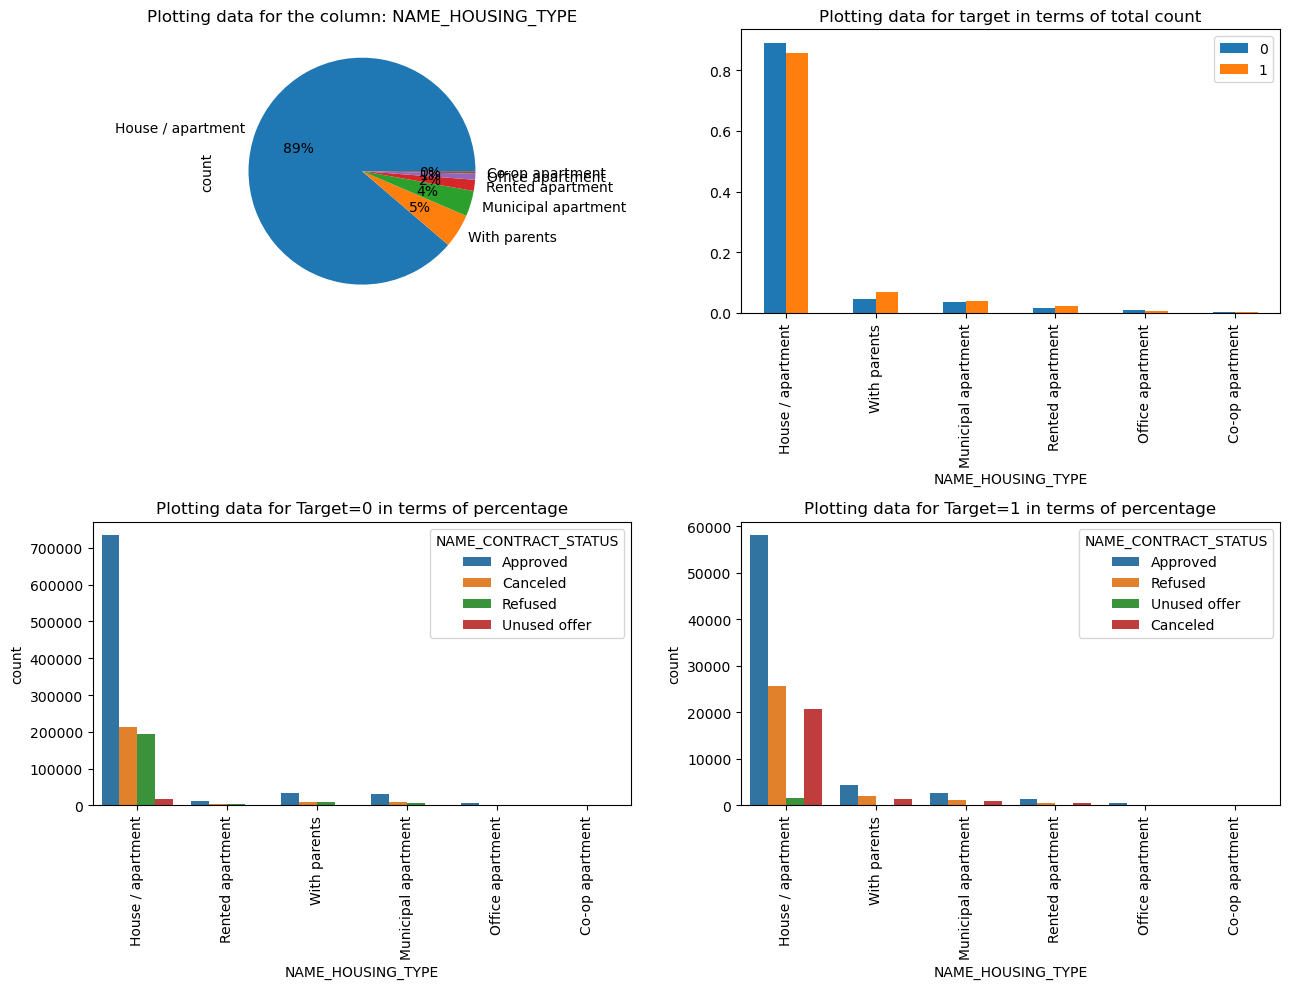

In [163]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')   

Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment.

### Plotting: ORGANIZATION_TYPE 

<Axes: ylabel='count'>

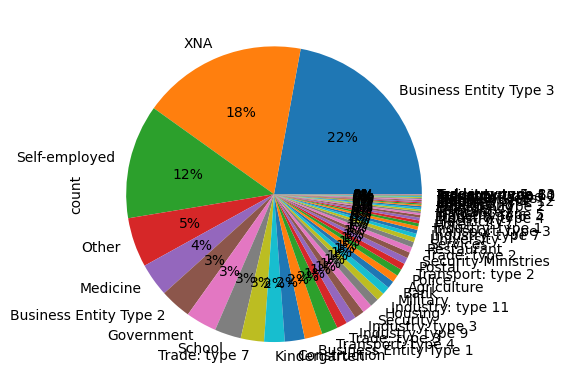

In [164]:
col = 'ORGANIZATION_TYPE'
train[col].value_counts().plot.pie(autopct = "%1.0f%%")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'School'),
  Text(1, 0, 'Government'),
  Text(2, 0, 'Business Entity Type 3'),
  Text(3, 0, 'Religion'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'XNA'),
  Text(6, 0, 'Electricity'),
  Text(7, 0, 'Medicine'),
  Text(8, 0, 'Business Entity Type 2'),
  Text(9, 0, 'Self-employed'),
  Text(10, 0, 'Transport: type 2'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Housing'),
  Text(13, 0, 'Kindergarten'),
  Text(14, 0, 'Trade: type 7'),
  Text(15, 0, 'Industry: type 11'),
  Text(16, 0, 'Military'),
  Text(17, 0, 'Services'),
  Text(18, 0, 'Security Ministries'),
  Text(19, 0, 'Transport: type 4'),
  Text(20, 0, 'Industry: type 1'),
  Text(21, 0, 'Emergency'),
  Text(22, 0, 'Security'),
  Text(23, 0, 'Trade: type 2'),
  Te

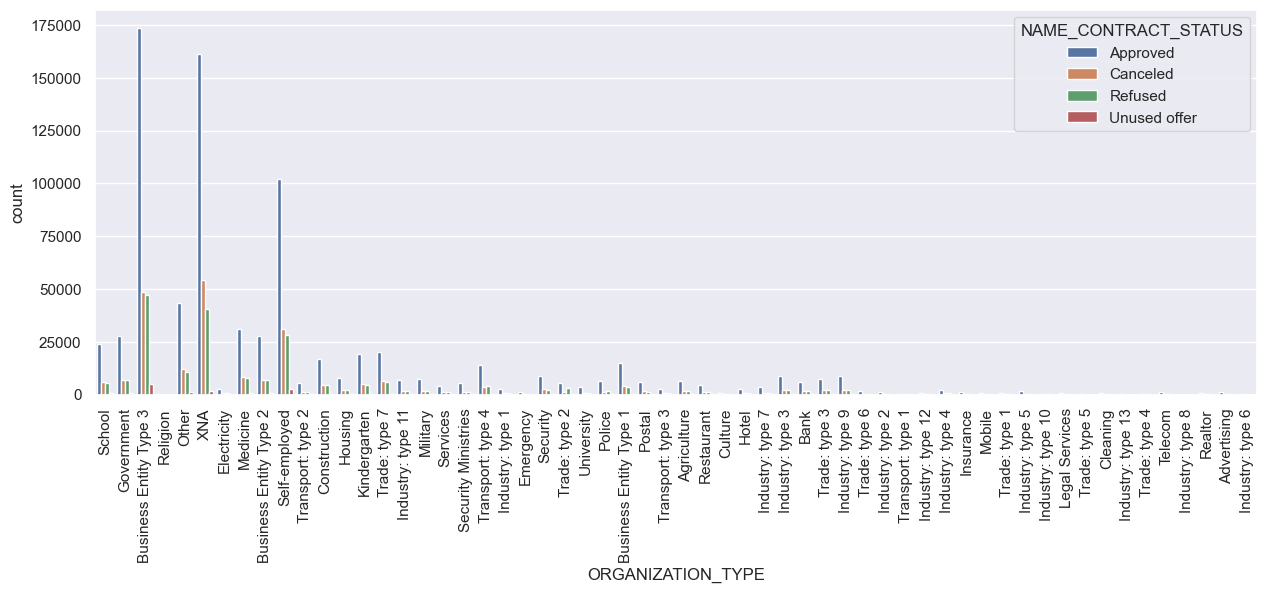

In [166]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=col, hue=hue, data=ptrain_0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Industry: type 4'),
  Text(3, 0, 'Trade: type 2'),
  Text(4, 0, 'Construction'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Trade: type 3'),
  Text(7, 0, 'XNA'),
  Text(8, 0, 'Industry: type 3'),
  Text(9, 0, 'Industry: type 9'),
  Text(10, 0, 'Security'),
  Text(11, 0, 'Medicine'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'School'),
  Text(14, 0, 'Transport: type 2'),
  Text(15, 0, 'Trade: type 7'),
  Text(16, 0, 'Government'),
  Text(17, 0, 'Transport: type 4'),
  Text(18, 0, 'Industry: type 1'),
  Text(19, 0, 'Advertising'),
  Text(20, 0, 'Electricity'),
  Text(21, 0, 'Business Entity Type 1'),
  Text(22, 0, 'Legal Services'),
  Text(23, 0, 

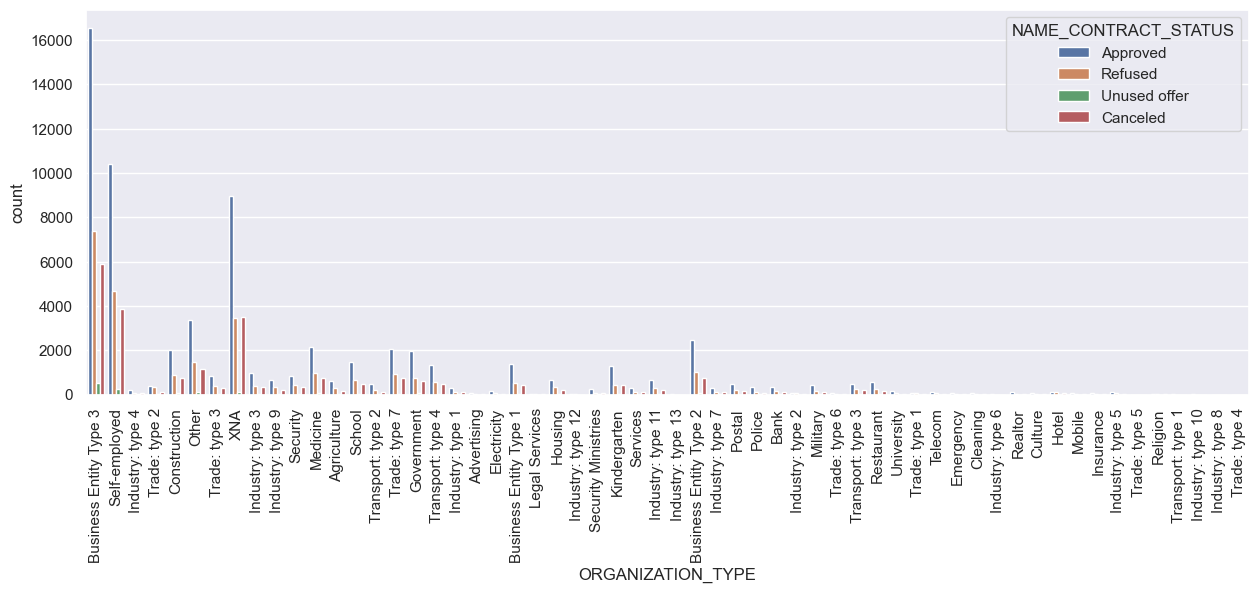

In [168]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptrain_1)
plt.xticks(rotation=90)

### THANK YOU